# Mount Drive

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import torch
import random
import torch.backends.cudnn as cudnn
import re

pd.set_option('display.max_columns', 500) 

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool1D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.layers import MaxPool1D, BatchNormalization, SimpleRNN, MaxPooling1D
from keras.models import Model
from keras.layers import Embedding, Dense, LSTM, GlobalMaxPooling1D, Dropout, Conv1D, Bidirectional
from keras.models import Sequential, load_model, save_model
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
random_seed = 0
torch.manual_seed(random_seed) 
torch.cuda.manual_seed(random_seed) 
torch.cuda.manual_seed_all(random_seed) # if use multi-GPU torch.backends.cudnn.deterministic = True torch.backends.cudnn.benchmark = False np.random.seed(random_seed) random.seed(random_seed)
torch.manual_seed(random_seed)
np.random.seed(random_seed)
cudnn.benchmark = False
cudnn.deterministic = True
random.seed(random_seed)
tf.random.set_seed(random_seed)


In [ ]:
DATA_IN_PATH = '/content/gdrive/MyDrive/캡스톤/version_6/version_6/'

## 여기 주목

In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/캡스톤/version_7_data/data/0822_processed_DB_5.17_전처리수정.csv',encoding = 'cp949')
data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
data['Associated Sx.'][0]

', 구토 (# 2회 흰 물만 나옴 ), 속쓰림, [응급] 어지러움 (#), 갈증 (#), 소변량 감소 (#), '

In [ ]:
data

,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
0,급성 복통,소화성 궤양,배가 아파요,남자,50대,170.0,80.0,1일전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, 통증 심함, 방사통(#), 등으로 퍼짐,",", 구토 (# 2회 흰 물만 나옴 ), 속쓰림, [응급] 어지러움 (#), 갈증 (...","자세에 따른 변화(#), 오른쪽으로 돌아 누우면 완화, 반듯이 누우면 악화,",NaN,NaN,"술(#), 1주일 6~7번, 하루 소주 2~3병, 담배(#), 30갑년, 식사 , ...",NaN,NaN,NaN,NaN,digestive,27.681661,과체중,배 아프다 50 대다 남자 1일 전 명치 부위 지속 심해지다 이전 에도 3 차례 통...
1,급성 복통,소화성 궤양,갑자기 배가 너무 아파요,남자,30대,165.0,70.0,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,지속,심해짐,이전에도 한 번 겪음,"계속 쓰림, 통증 중간","구역질, 구토, 식욕감소",앞으로 숙이는 경우 완화,2년 전 건강 검진 상 이상 없음,"관절염 약(진통소염제),","술, 회, 주 2~3회), 회사원, 회식이 잦고 폭음하는 경우가 있음,",NaN,NaN,NaN,NaN,digestive,25.711662,과체중,갑자기 배 너무 아프다 30 대다 남자 오늘 새벽 명치 에서 시작 현재 복부 전체 ...
2,급성 복통,소화성 궤양,속이 쓰려요,여자,70대,160.0,48.0,1달전,명치 부위,지속,심해짐,NaN,"속이 쓰림, 통증 약함","구역질, 신물이 올라와요",누워있으면 심해져요,NaN,관절염약 복용중,NaN,NaN,NaN,"HTN(#), DM (#),",NaN,digestive,18.750000,저체중,속이다 쓰리다 70 대다 여자 1 달 전 명치 부위 지속 심해지다 속이다 쓰리다 통...
3,급성 복통,소화성 궤양,속이 쓰려요,남자,10대,160.0,58.0,2달전,명치부위,지속,심해짐,NaN,"명치부위 압통, 속쓰림",구토,NaN,NaN,철분제,NaN,NaN,NaN,NaN,NaN,digestive,22.656250,정상,속이다 쓰리다 10 대다 남자 2 달 전 명치 부위 지속 심해지다 명치 부위 누르다...
4,급성 복통,소화성 궤양,배가 아파요,남자,60대,170.0,65.0,1시간전,명치부위,지속,심해짐,NaN,명치 부위가 아프고 쓰림,NaN,NaN,NaN,고혈압약,5년전 알코올 중독,NaN,NaN,"HTN(#),",NaN,digestive,22.491349,정상,배 아프다 60 대다 남자 1시간 전 명치 부위 지속 심해지다 명치 부위 아프다 쓰...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2251,미정,폐결핵,,여자,60대,152.3,45.8,1일 전,기침 시에 발생,하루 종일 지속됨,약간 심해짐,처음,"기침, 가래, 선홍색","발열(#), 오한(#), 체중감소(#),",NaN,", 2년 전 건강 검진 시 정상 소견,","2주 전 감기약 먹음, 평소 비타민 복용,",", 담배(#),","아버지(고혈압),",NaN,"고혈압(#),","규칙적인 월경, 보통인 월경량, 첫날에만 통증 있음",미정,19.745388,저체중,60 대다 여자 1일 전 기침 시 발생 하루 종일 지속 되다 약간 심해지다 처음 기...
2252,미정,역류성 식도염,속이 아파요,여자,30대,155.0,70.0,3일전,상복부 중앙,지속,심해짐,종종,쓰라린 느낌,"구역(#), 등쪽 통증(#), 식은땀(#), 울렁거림(#), 설사(#), 어지러움(...",식후 심해짐,"작년 건강검진상 GERD 진단, 약은 먹지 않음",NaN,"술(#), 하루 맥주 2잔,",NaN,NaN,NaN,NaN,미정,29.136316,비만,속이다 아프다 30 대다 여자 3일 전 윗 배 중앙 지속 심해지다 종종 쓰라리다 느...
2253,미정,대상포진,따끔 거려요,여자,60대,152.0,62.0,어제부터,오른쪽 무릅 및 발등,지속,심해짐,처음,"따끔거리는 통증, 가려움 동반",NaN,NaN,NaN,NaN,NaN,NaN,NaN,섬유신경종,NaN,미정,26.835180,과체중,따끔 걸리다 60 대다 여자 어제 부터 오른쪽 무릎 및 발등 지속 심해지다 처음 따...
2254,미정,방광염,소변볼때 불편해요,여자,50대,160.0,65.0,5일전부터,하복부,지속,심해짐,처음,NaN,"배뇨통(#), 피곤감(#),",NaN,최근 회사일로 피곤,NaN,NaN,NaN,NaN,NaN,NaN,미정,25.390625,과체중,소변 볼 때 불편하다 50 대다 여자 5일 전 부터 아랫 배 지속 심해지다 처음 배...


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_

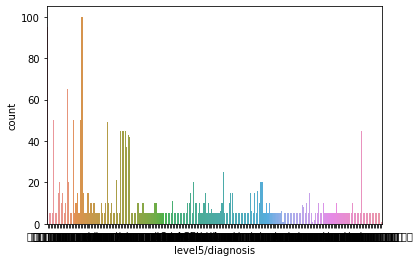

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="level5/diagnosis", data=data)
plt.show()

# 1. Preprocessing

## 0) Select columns and fill diseases

In [ ]:
def organize_data(df):
  df.columns = df.iloc[0]
  df = df[1:]
  df = df.iloc[:, 6:]
  df['level5/diagnosis'] = df['level5/diagnosis'].fillna(method='ffill') 
  df.drop('No.case', axis=1, inplace=True)

  return df

In [ ]:
data_digestive = organize_data(data_digestive)
data_musculoskeletal = organize_data(data_musculoskeletal)
data_kidney = organize_data(data_kidney)
data_respiratory = organize_data(data_respiratory)
data_para = organize_data(data_para)
#data_Folie_Nerve = organize_data(data_Folie_Nerve)
data_circulator1 = organize_data(data_circulator1)
data_circulator1 = data_circulator1.iloc[:, :21]

data_circulator2 = data_circulator2.iloc[:, 1:]
data_circulator2['진단 질병'] = data_circulator2['진단 질병'].fillna(method='ffill')
data_circulator2.drop('No.case', axis=1, inplace=True) 

In [ ]:
data_hemate = organize_data(data_hemate)
data_jaun = organize_data(data_jaun)

data_hemate['Level1'] = 'hematemesis(digestive)'
data_jaun['Level1'] = 'digestive(jaundice)'

In [ ]:
data_digestive['Level1'] = 'digestive'
data_musculoskeletal['Level1'] = 'musculoskeletal'
data_kidney['Level1'] = 'kidney'
data_respiratory['Level1'] = 'respiratory'
data_para['Level1'] = 'para'
data_circulator1['Level1'] = 'circulator1'
data_circulator2['Level1'] = 'circulator2'

In [ ]:
print(data_hemate.shape)
print(data_jaun.shape)
print(data_digestive.shape)
print(data_musculoskeletal.shape)
print(data_kidney.shape)
print(data_respiratory.shape)
print(data_para.shape)
#print(data_Folie_Nerve.shape)
print(data_circulator1.shape)
print(data_circulator2.shape)

(360, 22)
(440, 22)
(421, 22)
(205, 22)
(246, 22)
(205, 22)
(355, 22)
(305, 22)
(218, 22)


In [ ]:
data_circulator2.columns = data_circulator1.columns

data = pd.concat([data_digestive, data_musculoskeletal, data_kidney,
                  data_respiratory, data_circulator1, #data_Folie_Nerve,
                  data_circulator2, data_para, data_jaun, data_hemate], axis=0)
data.sample()

,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1
353,Inflammatory Bowel Disease (IBD),설사를 해요,남자,22,180,72,3달전,-,지속,심해짐,처음,"붉은색의 설사, 하루 2-4번, 앉아있을때 항문으로 분비물과 피가 나옴",항문 열상 및 궤양,-,-,-,-,-,-,-,-,digestive


In [ ]:
data['약물 투약력'].unique()

array(['-', '관절염 약(진통소염제) 복용 중', '관절염약 복용중', '철분제', '고혈압약', '괄절염약',
       '9년전 당뇨약', '와파린', '1일전 지사제', '당뇨약', '5년전부터 항바이러스제 복용',
       '22년전 정맥주사용 환각제 사용', '20년전 수혈', '항바이러스제 ', '항응고제 ',
       'Valsartan, Amlodipine, Metformin', 'Amlodipine, Metformin',
       'Amlodipine ', 'Valsartan ', '1시간전 겔포스 1포 ',
       '1시간전 타이레놀 650mg 1T, Amlodipine, Metformin', '둘코락스 BID', '쎈코딜 BID',
       nan, '타이레놀 BID', 'Amoxicillin BID', '타이레놀 Bid, ciprofloxacin Bid',
       'Metformin 1T QD', '지사제 매일 복용', '타이레놀 650mg !T Bid, 겔포스 Bid',
       '매일 저녁 쏀코딜 1T', '메티마졸 10mg Bid', '항우울제', '항경련제', 'SSRI', '훼로바',
       '칼슘제', '항갑상샘제', '혈압약', '항생제', '3달전부터 보약복용중', '2달전부터 감초, 녹용 다려서 먹음',
       '6개월전부터 홍삼 다려먹음', '1년간 홍삼, 보약, 약초 다량 복용', '6개월간 가시오가피, 홍삼 다려 먹음',
       '우루사 300mg Bid', '우루사 매일 복용', '암피실린', '광범위 항생제 복용', '항생제, 타이레놀 복용',
       '조울증약(성분은 모른다고 함)', '리튬', '고혈압약, 당뇨약', '이뇨제(-), 조영제(-), 리튬(-)',
       '없음', '이뇨제 / 리튬(-/-), 비타민제', '이뇨제', '커피', '녹차', '코코아',
       '소염제 / 고혈압약 / 항생제 / 항암제(-/-/-/-), 제산제(최

In [ ]:
nan_data = pd.read_excel(DATA_IN_PATH + 'at_least_10_nan_data.xlsx', sheet_name = 'Sheet1')
nan_data.drop('Unnamed: 0', inplace=True, axis=1)
nan_data.head(1)

,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1
0,Reflux esophagitis,피 토했어요,여자,40,165,65.0,2달전,NaN,NaN,비슷함,처음,"붉은색, 덩어리(-), 음식물(-)","복통, 기침",NaN,특이사항 없음,NaN,NaN,NaN,NaN,NaN,정상 월경주기,digestive


In [ ]:
print(data.shape)
data = pd.concat([data, nan_data], axis=0)
print(data.shape)

(2755, 22)
(2953, 22)


In [ ]:
data

,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1
1,gastritis/ ulcer,배가 아파요,남성,51,170,80,1일전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, NRS 8점, 방사통(+) : 등으로 퍼짐","[전신] 발열 / 식은땀 / 체중 감소 / 오한/ 피로감(-/-/-/-/-), [소...","자세에 따른 변화(+) : 오른쪽으로 돌아 누우면 완화, 반듯이 누우면 악화",-,-,"술(+) : 1주일 6~7번, 하루 소주 2~3병, 담배(+) : 30갑년, 식사 ...",-,-,DM / TB / HTN / 간염(-/-/-/-),NaN,digestive
2,gastritis/ ulcer,갑자기 배가 너무 아파요,남성,33,165,70,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,지속,심해짐,이전에도 한 번 겪음,"계속 쓰림, NRS 5점","구역질, 구토, 식욕감소",앞으로 숙이는 경우 완화,2년 전 건강 검진 상 이상 없음,관절염 약(진통소염제) 복용 중,"술(+, 소주 1~2병/회, 주 2~3회), 담배/ 커피(-/-), 회사원, 회식이...",가족중 소회기 질환 /암 (-/-),-,-,-,digestive
3,gastritis/ ulcer,속이 쓰려요,여성,70,160,48,1달전,명치 부위,지속,심해짐,-,"속이 쓰림, NRS 2점","구역질, 신물이 올라와요",누워있으면 심해져요,-,관절염약 복용중,-,-,-,HTN/DM (+/+_,-,digestive
4,gastritis/ ulcer,속이 쓰려요,남성,13,160,58,2달전,명치부위,지속,심해짐,-,"명치부위 압통, 속쓰림",구토,-,-,철분제,-,-,-,-,-,digestive
5,gastritis/ ulcer,배가 아파요,남성,65세,170,65,1시간전,명치부위,지속,심해짐,-,명치 부위가 아프고 쓰림,-,-,-,고혈압약,5년전 알코올 중독,-,-,HTN(+),-,digestive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,갑상샘저하증,콜레스테롤이 높대요,M,50,173,70.0,1개월 전,NaN,NaN,NaN,처음,NaN,"피곤, 식욕저하, 체중증가(+4kg/6개월), 추위불내성",NaN,특이사항 없음,NaN,"술(-), 담배(-)",NaN,NaN,NaN,NaN,circulator2
194,쿠싱증후군,콜레스테롤이 높대요,F,34,165,64.0,1주 전,NaN,NaN,NaN,처음,NaN,"체중변화(4kg/1개월), 하지 근력 저하(계단 오르기 힘듦), 복부 보라색 튼살,...",NaN,특이사항 없음,NaN,"술(+, 2병/주), 담배(-)",NaN,NaN,NaN,정상 월경주기,circulator2
195,폐경증후군,콜레스테롤이 높대요,F,60,156,63.0,1개월 전,NaN,NaN,NaN,처음,NaN,NaN,NaN,특이사항 없음,NaN,"술(-), 담배(-), 식습관(야식, 기름진음식), 운동안함",NaN,NaN,NaN,12년 전 폐경,circulator2
196,폐경증후군,콜레스테롤이 높대요,F,63,168,63.0,3개월 전,NaN,NaN,NaN,처음,NaN,NaN,NaN,특이사항 없음,NaN,"술(-), 담배(-)",NaN,NaN,NaN,10년 전 폐경,circulator2


## 1) Drop rows if more than half are nan

In [ ]:
data = data.fillna('-')

In [ ]:
def to_nan(x):
  if(x == '-'):
    x = np.nan
  if(x == '(-)'):
    x = np.nan
  if(x=='없음'):
    x = np.nan
  if(x=='특이사항 없음'):
    x = np.nan
  if(x=='이상 없음'):
    x = np.nan
  if(x=='.'):
    x = np.nan
    
  return x

In [ ]:
for i in range(len(data.columns)):
    data[data.columns[i]] = data.apply(lambda x : to_nan(x[data.columns[i]]) , axis = 1 )

In [ ]:
print('Before', data.shape)
data.dropna(thresh = data.shape[1]/2, axis = 0, inplace = True)
print('After', data.shape)

Before (2256, 26)
After (2256, 26)


In [ ]:
data.reset_index(drop=True, inplace=True)

In [ ]:
print(data.shape)

print(data['level5/diagnosis'].value_counts())

(2256, 26)
식도 정맥류 파열         100
소화성 궤양             95
역류성 식도염            65
만성 췌장염             50
급성 간염              50
                 ... 
이식거부증               5
약물 유발 고콜레스테롤혈증      2
임신성 고혈압             1
일차성 고콜레스테롤혈증        1
백의 고혈압              1
Name: level5/diagnosis, Length: 225, dtype: int64


## 2) Change Nan to blank text

In [ ]:
data = data.fillna('-')

In [ ]:
def to_nan(x):
  if(x == '-'):
    x = ''
  elif(x == '아니오'):
    x = ''
  elif(x == '아뇨'):
    x = ''
  elif(x == '몰라요'):
    x = ''
  elif(x == '모릅니다'):
    x = ''
  elif(x == '모름'):
    x = ''
  elif(x == '아뇨'):
    x = ''
  elif(x == '아뇨'):
    x = ''
  elif(x == '.'):
    x = ''    
  return x

In [ ]:
for i in range(len(data.columns)):
    data[data.columns[i]] = data.apply(lambda x : to_nan(x[data.columns[i]]) , axis = 1 )

In [ ]:
print(data.shape)

(2256, 26)


## 3) Check Target Data, Disease

In [ ]:
data['level5/diagnosis'].value_counts()

식도 정맥류 파열         100
소화성 궤양             95
역류성 식도염            65
만성 췌장염             50
급성 간염              50
                 ... 
이식거부증               5
약물 유발 고콜레스테롤혈증      2
임신성 고혈압             1
일차성 고콜레스테롤혈증        1
백의 고혈압              1
Name: level5/diagnosis, Length: 225, dtype: int64

In [ ]:
len(data['level5/diagnosis'].unique())

225

### Organize differently expressed diseases to the same expression diseases

In [ ]:
disease_kor = pd.read_excel(DATA_IN_PATH + 'ver6_new_words.xlsx', sheet_name = '질병')
disease_kor = disease_kor[['level5/diagnosis', '번역']]
disease_kor.head()

,level5/diagnosis,번역
0,Pseudoparathyroidism,가성 부갑상선 기능 저하증
1,Familial hypercholesterolemia,가족성 고콜레스테롤혈증
2,Familial short stature,가족형 저신장증
3,hepatitis,간염
4,Interstitial lung disease (ILD),간질성 폐질환


In [ ]:
data = pd.merge(data, disease_kor, how='left',on='level5/diagnosis')
data = data.drop_duplicates()
data.reset_index(drop=True, inplace=True)

data['번역'].fillna(data['level5/diagnosis'], inplace=True)
data['level5/diagnosis'] = data['번역']
data.drop('번역', axis=1, inplace=True)
data.sample()

,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
37,급성 복통,급성 충수염,배가 아파요,여자,30대,165.0,55.0,1달전,우하복부,지속,심해짐,처음,"우하복부 압통 , 반발압통","복부팽만, 소화불량, 오한",,,,,,,,,digestive,20.20202,정상,배 아프다 30 대다 여자 1 달 전 오른쪽 아랫 배 지속 심해지다 처음 오른쪽 아...


- Change some disease names in Circulator2

In [ ]:
idx = data[data['level5/diagnosis'] == '공황장애 / 과다환기증후군'].index#['level5/diagnosis'] = '공황장애'
data.loc[idx, 'level5/diagnosis'] = '공황장애'

idx = data[data['level5/diagnosis'] == '소화성궤양'].index
data.loc[idx, 'level5/diagnosis'] = '소화성 궤양'

idx = data[data['level5/diagnosis'] == '기립성 저혈압(혈량저하증 동반되어 있을 수)'].index
data.loc[idx, 'level5/diagnosis'] = '기립성 저혈압(혈량저하증 동반 가능)'

idx = data[data['level5/diagnosis'] == '대동맥박리'].index
data.loc[idx, 'level5/diagnosis'] = '대동맥 박리'

idx = data[data['level5/diagnosis'] == '역류성식도염'].index
data.loc[idx, 'level5/diagnosis'] = '역류성 식도염'

idx = data[data['level5/diagnosis'] == '거미막하출혈(SAH)'].index
data.loc[idx, 'level5/diagnosis'] = '지주막하 출혈'

idx = data[data['level5/diagnosis'] == '과다환기증'].index # 원문: Panic disorder / hyperventilation syndrome
data.loc[idx, 'level5/diagnosis'] = '공황장애'

idx = data[data['level5/diagnosis'] == '판막 질환(AR, MR 등)'].index
data.loc[idx, 'level5/diagnosis'] = '판막 질환'

idx = data[data['level5/diagnosis'] == '폐경후증후군'].index
data.loc[idx, 'level5/diagnosis'] = '폐경증후군'

idx = data[data['level5/diagnosis'] == '폐경증후군(폐경)'].index
data.loc[idx, 'level5/diagnosis'] = '폐경증후군'

idx = data[data['level5/diagnosis'] == '마주신경성 실신'].index
data.loc[idx, 'level5/diagnosis'] = '미주신경성 실신'

In [ ]:
len(data['level5/diagnosis'].unique())

225

### Drop disease which has less than 5 cases

In [ ]:
target_count = data['level5/diagnosis'].value_counts().reset_index()
target_count.columns = ['Disease', 'counts']
target_count = target_count[target_count['counts'] < 5]
target_count

,Disease,counts
221,약물 유발 고콜레스테롤혈증,2
222,임신성 고혈압,1
223,일차성 고콜레스테롤혈증,1
224,백의 고혈압,1


In [ ]:
t = data['level5/diagnosis'].value_counts().reset_index()
t.columns = ['Disease','counts']
t = t[t['Disease']=="목 삠"]
target_count = pd.concat([target_count,t])

In [ ]:
target_count['Disease'].unique()

array(['약물 유발 고콜레스테롤혈증', '임신성 고혈압', '일차성 고콜레스테롤혈증', '백의 고혈압', '목 삠'],
      dtype=object)

In [ ]:
target_counts = data['level5/diagnosis'].value_counts().reset_index()
target_counts.columns = ['Disease', 'counts']
target_counts = target_counts[target_counts['counts'] >= 5]
target_counts

,Disease,counts
0,식도 정맥류 파열,100
1,소화성 궤양,95
2,역류성 식도염,65
3,급성 간염,50
4,식도암,50
...,...,...
216,요붕증,5
217,신장성 요붕증,5
218,저혈량증,5
219,악성 고혈암,5


In [ ]:
target_counts[target_counts['Disease']=="목 삠"]

,Disease,counts
158,목 삠,5


In [ ]:
idx = target_counts[target_counts['Disease']=="목 삠"].index
target_counts.drop(idx,inplace=True)
target_counts

,Disease,counts
0,식도 정맥류 파열,100
1,소화성 궤양,95
2,역류성 식도염,65
3,급성 간염,50
4,식도암,50
...,...,...
216,요붕증,5
217,신장성 요붕증,5
218,저혈량증,5
219,악성 고혈암,5


##### 희귀질환

In [ ]:
L = ['쇼그렌 증후군','쿠싱증후군','윌슨병','베체트병','단장 증후군',
     '호두까기 증후군','면역글로불린 A 신병증','크론병']
for i in L:
  idx = target_counts[target_counts['Disease']==i].index
  target_counts.drop(idx,inplace=True)
target_counts

,Disease,counts
0,식도 정맥류 파열,100
1,소화성 궤양,95
2,역류성 식도염,65
3,급성 간염,50
4,식도암,50
...,...,...
216,요붕증,5
217,신장성 요붕증,5
218,저혈량증,5
219,악성 고혈암,5


In [ ]:
data['level5/diagnosis'].unique()

array(['소화성 궤양', '급성 췌장염', '급성 쓸개염', '복부대동맥류 파열', '급성 간염', '급성 충수염',
       '크론병', '장폐색', '요로결석', '신우신염', '자궁외임신', '난소 염전', '골반염', '역류성 식도염',
       '위암', '당뇨성 마비', '담낭염, 만성 담낭염', '만성 췌장염', '간염', '유당불내증',
       '과민성 대장증후군', '기능성 소화불량', '식도암', '식도 정맥류 파열', '혈액응고장애', '소아성 용종',
       '메켈 게실', '결장암 / 직장암', '게실염', '허혈성 대장염', '감염성 대장염', '염증성 장질환',
       '치질 / 치열', '협착증', '장중첩증', '양성돌발체위현훈', '뇌수막염', '뇌출혈 / 지주막하출혈',
       '폭식증', '식중독', '급성 담낭염', '임신', '기능성 변비', '갑상선기능저하증', '약물에 의한 변비',
       '신경 이상에 의한 변비', '갑상선기능항진증', '약물에 의한 설사', '단장 증후군', '윌슨병',
       '독성 간염(약물, 독극물)', '알코올성 간 질환 / 간 병변 / 간암', '담관염', '담도암 / 췌장 두부암',
       '용혈병', '전염성 단핵구증', '통풍', '감염성 관절염', '반응성 관절염', '외상 관절염',
       '류마티스 관절염', '강직성 척추염', '루푸스 관절염', '쇼그렌 증후군', '베체트병', '골관절염',
       '섬유근육통', '유착성 관절낭염', '상과염', '연골연화증', '윤활막염', '요추염좌', '추간판 탈출증',
       '척추관 협착증', '암의 척추 전이', '요추압박골절', '목 삠', '채찍질손상', '근근막 통증 증후군',
       '척추 종양', '삼차신경통', '경부 종양', '바이러스성 발진(홍역, 수두 등)', '제2기 매독', '대상포진',
       '옴 진드기 전염', '건선', '접촉

In [ ]:
d = data.copy()
d

,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
0,급성 복통,소화성 궤양,배가 아파요,남자,50대,170.0,80.0,1일전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, 통증 심함, 방사통(#), 등으로 퍼짐,",", 구토 (# 2회 흰 물만 나옴 ), 속쓰림, [응급] 어지러움 (#), 갈증 (...","자세에 따른 변화(#), 오른쪽으로 돌아 누우면 완화, 반듯이 누우면 악화,",,,"술(#), 1주일 6~7번, 하루 소주 2~3병, 담배(#), 30갑년, 식사 , ...",,,,,digestive,27.681661,과체중,배 아프다 50 대다 남자 1일 전 명치 부위 지속 심해지다 이전 에도 3 차례 통...
1,급성 복통,소화성 궤양,갑자기 배가 너무 아파요,남자,30대,165.0,70.0,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,지속,심해짐,이전에도 한 번 겪음,"계속 쓰림, 통증 중간","구역질, 구토, 식욕감소",앞으로 숙이는 경우 완화,2년 전 건강 검진 상 이상 없음,"관절염 약(진통소염제),","술, 회, 주 2~3회), 회사원, 회식이 잦고 폭음하는 경우가 있음,",,,,,digestive,25.711662,과체중,갑자기 배 너무 아프다 30 대다 남자 오늘 새벽 명치 에서 시작 현재 복부 전체 ...
2,급성 복통,소화성 궤양,속이 쓰려요,여자,70대,160.0,48.0,1달전,명치 부위,지속,심해짐,,"속이 쓰림, 통증 약함","구역질, 신물이 올라와요",누워있으면 심해져요,,관절염약 복용중,,,,"HTN(#), DM (#),",,digestive,18.750000,저체중,속이다 쓰리다 70 대다 여자 1 달 전 명치 부위 지속 심해지다 속이다 쓰리다 통...
3,급성 복통,소화성 궤양,속이 쓰려요,남자,10대,160.0,58.0,2달전,명치부위,지속,심해짐,,"명치부위 압통, 속쓰림",구토,,,철분제,,,,,,digestive,22.656250,정상,속이다 쓰리다 10 대다 남자 2 달 전 명치 부위 지속 심해지다 명치 부위 누르다...
4,급성 복통,소화성 궤양,배가 아파요,남자,60대,170.0,65.0,1시간전,명치부위,지속,심해짐,,명치 부위가 아프고 쓰림,,,,고혈압약,5년전 알코올 중독,,,"HTN(#),",,digestive,22.491349,정상,배 아프다 60 대다 남자 1시간 전 명치 부위 지속 심해지다 명치 부위 아프다 쓰...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,미정,폐결핵,,여자,60대,152.3,45.8,1일 전,기침 시에 발생,하루 종일 지속됨,약간 심해짐,처음,"기침, 가래, 선홍색","발열(#), 오한(#), 체중감소(#),",,", 2년 전 건강 검진 시 정상 소견,","2주 전 감기약 먹음, 평소 비타민 복용,",", 담배(#),","아버지(고혈압),",,"고혈압(#),","규칙적인 월경, 보통인 월경량, 첫날에만 통증 있음",미정,19.745388,저체중,60 대다 여자 1일 전 기침 시 발생 하루 종일 지속 되다 약간 심해지다 처음 기...
2190,미정,역류성 식도염,속이 아파요,여자,30대,155.0,70.0,3일전,상복부 중앙,지속,심해짐,종종,쓰라린 느낌,"구역(#), 등쪽 통증(#), 식은땀(#), 울렁거림(#), 설사(#), 어지러움(...",식후 심해짐,"작년 건강검진상 GERD 진단, 약은 먹지 않음",,"술(#), 하루 맥주 2잔,",,,,,미정,29.136316,비만,속이다 아프다 30 대다 여자 3일 전 윗 배 중앙 지속 심해지다 종종 쓰라리다 느...
2191,미정,대상포진,따끔 거려요,여자,60대,152.0,62.0,어제부터,오른쪽 무릅 및 발등,지속,심해짐,처음,"따끔거리는 통증, 가려움 동반",,,,,,,,섬유신경종,,미정,26.835180,과체중,따끔 걸리다 60 대다 여자 어제 부터 오른쪽 무릎 및 발등 지속 심해지다 처음 따...
2192,미정,방광염,소변볼때 불편해요,여자,50대,160.0,65.0,5일전부터,하복부,지속,심해짐,처음,,"배뇨통(#), 피곤감(#),",,최근 회사일로 피곤,,,,,,,미정,25.390625,과체중,소변 볼 때 불편하다 50 대다 여자 5일 전 부터 아랫 배 지속 심해지다 처음 배...


In [ ]:
#d = d[d['level5/diagnosis'].isin(target_counts['Disease'])]

In [ ]:
#d[d['level5/diagnosis'].isin(target_count['Disease'])]

In [ ]:
d = d[d['level5/diagnosis'].isin(target_count['Disease'])]
print(len(d))

10


##### 기타

In [ ]:
d['level5/diagnosis'] = "기타"
d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
510,목 통증/허리 통증,기타,목 아파요,남자,30대,180.0,75.0,1주일전,목,하루종일,심해짐,이전에도 경험,목 통증,압통,무거운 물건 들다가,,,,,,,,musculoskeletal,23.148148,정상,목 아프다 30 대다 남자 1 주일 전 목 하루 종일 심해지다 이전 에도 경험 목 ...
511,목 통증/허리 통증,기타,목 아파요,여자,40대,175.0,78.0,3일전,목,하루종일,,처음,뻐근한 목 통증,,이사 하다가,,,,,,,,musculoskeletal,25.469388,과체중,목 아프다 40 대다 여자 3일 전 목 하루 종일 처음 뻐근하다 목 통증 이사 과체중
512,목 통증/허리 통증,기타,목 아파요,남자,20대,172.0,60.0,1일전,목,하루종일,심해짐,이전에도 경험,아린 목 통증,압통,무거운 물건 들다가,,,,,,,,musculoskeletal,20.281233,정상,목 아프다 20 대다 남자 1일 전 목 하루 종일 심해지다 이전 에도 경험 아리다 ...
513,목 통증/허리 통증,기타,목 아파요,여자,50대,178.0,75.0,2주전,목,하루종일,,처음,목 통증,,청소 하다가,,,,,,,,musculoskeletal,23.671254,정상,목 아프다 50 대다 여자 2 주 전 목 하루 종일 처음 목 통증 청소 정상
514,목 통증/허리 통증,기타,목 아파요,남자,50대,158.0,55.0,1주일전,목,하루종일,,이전에도 경험,목 통증,압통,무거운 물건 들다가,,,,,,,,musculoskeletal,22.031726,정상,목 아프다 50 대다 남자 1 주일 전 목 하루 종일 이전 에도 경험 목 통증 누르...
950,고혈압,기타,"""혈압이 높아요""",여자,30대,0.0,0.0,3달 전,,,출산 후 계속 안 떨어짐,임신 전에는 정상,"운동, 커피, 담배, 안하고 안정 취하고 잰 혈압, 다른 이상 없음",", 피로(#), ""아이 키우느라 피곤해요"", 뒷목 뻐근함(#), 코골이(#),","""아기 때문에 잠을 거의 못자요""",,,", 이전에 7갑년, 커피(# 1~2잔 ), 일)( 일), 직업 , 은행원(복귀 예정),","아버지 , 고혈압, 뇌출혈로 돌아가심",,", HTN (#),","3개월 전 40주 질식분만, 출산 시 문제 없었음",circulator1,-1.000000,알 수 없음,혈압 높다 30 대다 여자 3 달 전 출산 후 계속 안 떨어지다 임신 전 에는 정상...
1121,미정,기타,콜레스테롤이 높대요,여자,60대,170.0,68.0,1개월 전,,,,,"총 콜레스테롤, TG 상승, HLD 낮은 소견",,"육류 선호, 복부비만, 운동안함","2년 전 건강검진에서 고혈압, 콜레스테롤이 높다는 말 들었으나 별다른 치료 하지 않음",,"술(# 8병), 주)(주), 담배(# 30갑년),","아버지(고혈압, 고지혈증, 9년 전 심근경색으로 사망), 형(고혈압, 고지혈증)",,"고혈압(2년),",,circulator2,23.529412,정상,콜레스테롤 높다 대요 60 대다 여자 1 개월 전 총 콜레스테롤 TG 상승 HLD ...
1122,미정,기타,중성지방이 높아요,여자,50대,163.0,72.0,1개월 전,,,,,,"얼굴 화끈거림, 발한과다, 우울증",,,여성호르몬제,,,,폐경증후군,1년 전 폐경,circulator2,27.099251,과체중,중성 지방 높다 50 대다 여자 1 개월 전 얼굴 화끈 거림 땀 많이 남 우울증 여...
1123,미정,기타,콜레스테롤이 높대요,남자,40대,172.0,78.0,1개월 전,,,,,,,운동안함,2년 전 건강검진에서 당뇨 전단계,,"술(#거의매일 3병씩), 담배(# 40갑년),",,,,,circulator2,26.365603,과체중,콜레스테롤 높다 대요 40 대다 남자 1 개월 전 운동 함 2년 전 건강검진 에서 ...
2171,미정,기타,혈압이 높대요,여자,40대,167.0,55.0,1개월 전,,,,처음,"집에서는 정상, 병원에서만 고혈압",,,,,,,,,정상 월경주기,circulator2,19.721037,저체중,혈압 높다 대요 40 대다 여자 1 개월 전 처음 집 에서는 정상 병원 에서만 고혈...


In [ ]:
len(d)

10

In [ ]:
ata = data[data['level5/diagnosis'].isin(L)]
ata['level5/diagnosis'] = "희귀질환"
ata

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
40,급성 복통,희귀질환,배가 아파요,남자,20대,175.0,62.0,3달전,배전체,지속,심해짐,처음,"통증 약함, 압통(#),","체중감소, 혈변, 점액변",,,,,,,,,digestive,20.244898,정상,배 아프다 20 대다 남자 3 달 전 배 전체 지속 심해지다 처음 통증 약하다 누르...
41,급성 복통,희귀질환,배가 아파요,남자,10대,175.0,60.0,4달전,우하복부,지속,심해짐,처음,"우하복부 압통,","체중감소, 피로, 식욕부진",,,,,,,,,digestive,19.591837,저체중,배 아프다 10 대다 남자 4 달 전 오른쪽 아랫 배 지속 심해지다 처음 오른쪽 아...
42,급성 복통,희귀질환,배가 아파요,여자,10대,170.0,48.0,3달전,하복부,지속,,이전에도 경험,"하복부 불편감,","혈변, 점액변",,,,,,,,,digestive,16.608997,저체중,배 아프다 10 대다 여자 3 달 전 아랫 배 지속 이전 에도 경험 아랫 배 불편 ...
43,급성 복통,희귀질환,배가 아파요,남자,10대,131.0,17.8,4달전,배전체,지속,심해짐,처음,,"혈변, 점액변",,,,,,,,,digestive,10.372356,저체중,배 아프다 10 대다 남자 4 달 전 배 전체 지속 심해지다 처음 혈변 점액 변 저체중
44,급성 복통,희귀질환,배가 아파요,남자,20대,175.0,63.0,1년전,우하복부,지속,심해짐,처음,"우하복부 압통,","혈변, 점액변",,,,,,,,,digestive,20.571429,정상,배 아프다 20 대다 남자 1년 전 오른쪽 아랫 배 지속 심해지다 처음 오른쪽 아랫...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,미정,희귀질환,혈압이 높아요,여자,30대,155.0,68.0,6개월 전,,,,처음,,"다리 힘이 없음, 계단 오르기 힘듦, 복부 보라색 튼살",,,,,,,,정상 월경주기,circulator2,28.303850,과체중,혈압 높다 30 대다 여자 6 개월 전 처음 다리 힘 없다 계단 오르다 힘들다 복부...
2177,미정,희귀질환,혈압이 높아요,여자,60대,160.0,79.0,3개월 전,,,,처음,,"체중변화(#8kg), 1년)(1년), 둥근얼굴, 복부비만, 복부 보라색 튼살,",,,한약,,,,,폐경,circulator2,30.859375,비만,혈압 높다 60 대다 여자 3 개월 전 처음 체중 변화 8kg 1년 1년 둥글다 얼...
2178,미정,희귀질환,혈압이 높아요,여자,30대,160.0,73.0,6개월 전,,,,처음,,"체중변화(#8kg), 8개월), 멍이 잘 듦, 얇은 피부, 얼굴 여드름,",,,,,,,,무월경,circulator2,28.515625,과체중,혈압 높다 30 대다 여자 6 개월 전 처음 체중 변화 8kg 8 개월 멍 자다 들...
2179,미정,희귀질환,혈압이 높아요,남자,50대,163.0,72.0,3개월 전,,,,처음,,"체중변화(#10kg), 1년)(1년), 둥근얼굴, 복부비만, 가늘은 팔다리, 멍이 ...",,,관절통약,,,,,,circulator2,27.099251,과체중,혈압 높다 50 대다 남자 3 개월 전 처음 체중 변화 10kg 1년 1년 둥글다 ...


In [ ]:
len(ata)

95

In [ ]:
data = data[data['level5/diagnosis'].isin(target_counts['Disease'])]
print(len(data))

2089


In [ ]:
data = pd.concat([data,d,ata])
data.reset_index(drop=True, inplace=True)

In [ ]:
len(data)

2194

In [ ]:
print(data.shape)
print(data['level5/diagnosis'].value_counts())
print(data['level5/diagnosis'].unique())
data[data['level5/diagnosis']=="희귀질환"]

(2194, 26)
식도 정맥류 파열    100
소화성 궤양        95
희귀질환          95
역류성 식도염       65
식도암           50
            ... 
저혈량증           5
악성 고혈암         5
이식거부증          5
방광경부폐색         5
복압성 요실금        5
Name: level5/diagnosis, Length: 214, dtype: int64
['소화성 궤양' '급성 췌장염' '급성 쓸개염' '복부대동맥류 파열' '급성 간염' '급성 충수염' '장폐색' '요로결석'
 '신우신염' '자궁외임신' '난소 염전' '골반염' '역류성 식도염' '위암' '당뇨성 마비' '담낭염, 만성 담낭염'
 '만성 췌장염' '간염' '유당불내증' '과민성 대장증후군' '기능성 소화불량' '식도암' '식도 정맥류 파열' '혈액응고장애'
 '소아성 용종' '메켈 게실' '결장암 / 직장암' '게실염' '허혈성 대장염' '감염성 대장염' '염증성 장질환'
 '치질 / 치열' '협착증' '장중첩증' '양성돌발체위현훈' '뇌수막염' '뇌출혈 / 지주막하출혈' '폭식증' '식중독'
 '급성 담낭염' '임신' '기능성 변비' '갑상선기능저하증' '약물에 의한 변비' '신경 이상에 의한 변비' '갑상선기능항진증'
 '약물에 의한 설사' '독성 간염(약물, 독극물)' '알코올성 간 질환 / 간 병변 / 간암' '담관염' '담도암 / 췌장 두부암'
 '용혈병' '전염성 단핵구증' '통풍' '감염성 관절염' '반응성 관절염' '외상 관절염' '류마티스 관절염' '강직성 척추염'
 '루푸스 관절염' '골관절염' '섬유근육통' '유착성 관절낭염' '상과염' '연골연화증' '윤활막염' '요추염좌' '추간판 탈출증'
 '척추관 협착증' '암의 척추 전이' '요추압박골절' '채찍질손상' '근근막 통증 증후군' '척추 종양' '삼차신경통'
 '경부 종양' '바이러스성 발진(홍역, 수두 등)' '제2기 매독' '대상

,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
2099,급성 복통,희귀질환,배가 아파요,남자,20대,175.0,62.0,3달전,배전체,지속,심해짐,처음,"통증 약함, 압통(#),","체중감소, 혈변, 점액변",,,,,,,,,digestive,20.244898,정상,배 아프다 20 대다 남자 3 달 전 배 전체 지속 심해지다 처음 통증 약하다 누르...
2100,급성 복통,희귀질환,배가 아파요,남자,10대,175.0,60.0,4달전,우하복부,지속,심해짐,처음,"우하복부 압통,","체중감소, 피로, 식욕부진",,,,,,,,,digestive,19.591837,저체중,배 아프다 10 대다 남자 4 달 전 오른쪽 아랫 배 지속 심해지다 처음 오른쪽 아...
2101,급성 복통,희귀질환,배가 아파요,여자,10대,170.0,48.0,3달전,하복부,지속,,이전에도 경험,"하복부 불편감,","혈변, 점액변",,,,,,,,,digestive,16.608997,저체중,배 아프다 10 대다 여자 3 달 전 아랫 배 지속 이전 에도 경험 아랫 배 불편 ...
2102,급성 복통,희귀질환,배가 아파요,남자,10대,131.0,17.8,4달전,배전체,지속,심해짐,처음,,"혈변, 점액변",,,,,,,,,digestive,10.372356,저체중,배 아프다 10 대다 남자 4 달 전 배 전체 지속 심해지다 처음 혈변 점액 변 저체중
2103,급성 복통,희귀질환,배가 아파요,남자,20대,175.0,63.0,1년전,우하복부,지속,심해짐,처음,"우하복부 압통,","혈변, 점액변",,,,,,,,,digestive,20.571429,정상,배 아프다 20 대다 남자 1년 전 오른쪽 아랫 배 지속 심해지다 처음 오른쪽 아랫...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2189,미정,희귀질환,혈압이 높아요,여자,30대,155.0,68.0,6개월 전,,,,처음,,"다리 힘이 없음, 계단 오르기 힘듦, 복부 보라색 튼살",,,,,,,,정상 월경주기,circulator2,28.303850,과체중,혈압 높다 30 대다 여자 6 개월 전 처음 다리 힘 없다 계단 오르다 힘들다 복부...
2190,미정,희귀질환,혈압이 높아요,여자,60대,160.0,79.0,3개월 전,,,,처음,,"체중변화(#8kg), 1년)(1년), 둥근얼굴, 복부비만, 복부 보라색 튼살,",,,한약,,,,,폐경,circulator2,30.859375,비만,혈압 높다 60 대다 여자 3 개월 전 처음 체중 변화 8kg 1년 1년 둥글다 얼...
2191,미정,희귀질환,혈압이 높아요,여자,30대,160.0,73.0,6개월 전,,,,처음,,"체중변화(#8kg), 8개월), 멍이 잘 듦, 얇은 피부, 얼굴 여드름,",,,,,,,,무월경,circulator2,28.515625,과체중,혈압 높다 30 대다 여자 6 개월 전 처음 체중 변화 8kg 8 개월 멍 자다 들...
2192,미정,희귀질환,혈압이 높아요,남자,50대,163.0,72.0,3개월 전,,,,처음,,"체중변화(#10kg), 1년)(1년), 둥근얼굴, 복부비만, 가늘은 팔다리, 멍이 ...",,,관절통약,,,,,,circulator2,27.099251,과체중,혈압 높다 50 대다 남자 3 개월 전 처음 체중 변화 10kg 1년 1년 둥글다 ...


In [ ]:
target_count = data['level5/diagnosis'].value_counts().reset_index()
target_count.columns = ['Disease', 'counts']
target_count

,Disease,counts
0,식도 정맥류 파열,100
1,소화성 궤양,95
2,희귀질환,95
3,역류성 식도염,65
4,식도암,50
...,...,...
209,저혈량증,5
210,악성 고혈암,5
211,이식거부증,5
212,방광경부폐색,5


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_

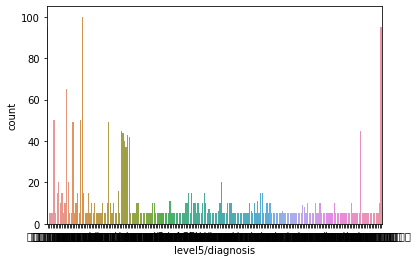

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="level5/diagnosis", data=data)
plt.show()

In [ ]:
np.unique(data['level5/diagnosis'])

array(['ACEI(혈압강하제) 복용으로 인한 증상', '간염', '간질성 폐질환', '갈비연골염', '감염성 관절염',
       '감염성 기침', '감염성 대장염', '갑상샘과다증', '갑상샘저하증', '갑상선기능저하증', '갑상선기능항진증',
       '강직성 척추염', '건선', '게실염', '결장암 / 직장암', '결핵', '경부 종양', '골관절염', '골반염',
       '공황장애', '과민성 대장증후군', '과민성 방광', '근근막 통증 증후군', '급성 간염', '급성 담낭염',
       '급성 부비동염', '급성 신우신염', '급성 쓸개염', '급성 유방염', '급성 충수염', '급성 췌장염',
       '기관지 확장증', '기능성 변비', '기능성 소화불량', '기립성 저혈압(혈량저하증 동반 가능)', '기타',
       '기흉', '길버트증후군', '난소 염전', '뇌수막염', '뇌전증', '뇌척수액 비루', '뇌출혈 / 지주막하출혈',
       '다낭성 난소 증후군', '담관염', '담낭염, 만성 담낭염', '담도암 / 췌장 두부암', '당뇨병',
       '당뇨성 마비', '대동맥 박리', '대상포진', '독성 간염(약물, 독극물)', '루푸스 관절염',
       '류마티스 관절염', '리팜핀 복용으로 인한 증상', '만성 기관지염', '만성 신부전', '만성 췌장염',
       '만성 폐쇄성 폐질환', '메켈 게실', '미주신경성 실신', '바이러스성 발진(홍역, 수두 등)', '반응성 관절염',
       '발작심실상성 빈맥', '방광경부폐색', '방광암', '방광염', '배뇨 실신', '복부대동맥류 파열',
       '복압성 요실금', '본태성 고혈압', '부비동 종양', '부정맥', '불안 / 우울', '비후성 심근병증', '빈혈',
       '삼차신경통', '상과염', '상기도 감염증', '상기도출혈', '생리적 빈맥', '섬유 낭종성 질환', '섬유근육통',
       '섬유선

In [ ]:
dic={}
cntt=1
cnttt=1
cntttt=1
cnttttt=1
cntttttt=1
for i in data['level5/diagnosis']:
  if '요실금' in i:
    dic['요실금']= cntt
    cntt=cntt+1
  if '관절염' in i:
    dic['관절염'] = cnttt
    cnttt=cnttt+1
  if '유방염' in i:
    dic['유방염'] = cnttt
    cntttt=cntttt+1
  if '방광염' in i:
    dic['방광염'] = cntttt
    cnttttt=cnttttt+1
  if '질염' in i:
    dic['질염'] = cnttttt
    cntttttt=cntttttt+1
print(dic)

{'관절염': 35, '방광염': 11, '요실금': 26, '고혈압': 10, '유방염': 36, '질염': 4}


In [ ]:
dic={}
dic['요실금']=0
dic['관절염']=0
dic['유방염']=0
dic['방광염']=0
dic['질염']=0
for i in range(len(target_count['Disease'])):
  if '요실금' in target_count['Disease'][i]:
    print(target_count['Disease'][i])
    dic['요실금'] += target_count['counts'][i]
  if '관절염' in target_count['Disease'][i]:
    print(target_count['Disease'][i])
    dic['관절염'] += target_count['counts'][i]
  if '유방염' in target_count['Disease'][i]:
    print(target_count['Disease'][i])
    dic['유방염'] += target_count['counts'][i]
  if '방광염' in target_count['Disease'][i]:
    print(target_count['Disease'][i])
    dic['방광염'] += target_count['counts'][i]
  if '질염' in target_count['Disease'][i]:
    print(target_count['Disease'][i])
    dic['질염'] += target_count['counts'][i]

세균성 질염
류마티스 관절염
방광염
혼합성 요실금
일류성 요실금
일시적 요실금
칸디다 질염
유방염(유선염)
위축성 질염
급성 유방염
본태성 고혈압
폐경에 의한 고혈압
감염성 관절염
반응성 관절염
외상 관절염
루푸스 관절염
골관절염
복압성 요실금
절박성 요실금


In [ ]:
dic

{'고혈압': 10, '관절염': 35, '방광염': 7, '요실금': 26, '유방염': 10, '질염': 20}

##### 관절염

In [ ]:
yo = ['류마티스 관절염','감염성 관절염','반응성 관절염','외상 관절염','루푸스 관절염']
for i in yo:
  idx = target_counts[target_counts['Disease']==i].index
  target_counts.drop(idx,inplace=True)
target_counts


,Disease,counts
0,식도 정맥류 파열,100
1,소화성 궤양,95
2,역류성 식도염,65
3,급성 간염,50
4,식도암,50
...,...,...
216,요붕증,5
217,신장성 요붕증,5
218,저혈량증,5
219,악성 고혈암,5


In [ ]:
ta = data[data['level5/diagnosis'].isin(yo)]
ta['level5/diagnosis'] = "관절염(류마티스/감영성/반응성/외상/루푸스)"
ta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
393,관절 통증,관절염(류마티스/감영성/반응성/외상/루푸스),무릅이 아파요,남자,40대,170.0,75.0,1주전,무릅,지속,심해짐,처음,무릅이 붓고 누르면 아픔,"관절 주변 부기, 열감, 압통, 홍반",몇주전 주사 맞음,,,,,,,,musculoskeletal,25.951557,과체중,무릎 아프다 40 대다 남자 1 주 전 무릎 지속 심해지다 처음 무릎 붓다 누르다 ...
394,관절 통증,관절염(류마티스/감영성/반응성/외상/루푸스),무릅이 아파요,여자,50대,160.0,60.0,2주전,무릅,지속,심해짐,처음,무릅이 붓고 누르면 아픔,"관절 주변 부기, 열감, 압통, 홍반",몇주전 주사 맞음,,,,,,,,musculoskeletal,23.437500,정상,무릎 아프다 50 대다 여자 2 주 전 무릎 지속 심해지다 처음 무릎 붓다 누르다 ...
395,관절 통증,관절염(류마티스/감영성/반응성/외상/루푸스),무릅이 아파요,남자,40대,175.0,80.0,1주전,무릅,지속,심해짐,처음,무릅이 붓고 누르면 아픔,"관절 주변 부기, 열감, 압통, 홍반",몇주전 주사 맞음,,,,,,,,musculoskeletal,26.122449,과체중,무릎 아프다 40 대다 남자 1 주 전 무릎 지속 심해지다 처음 무릎 붓다 누르다 ...
396,관절 통증,관절염(류마티스/감영성/반응성/외상/루푸스),무릅이 아파요,여자,50대,155.0,55.0,1주전,무릅,지속,심해짐,처음,무릅이 붓고 누르면 아픔,"관절 주변 부기, 열감, 압통, 홍반",몇주전 관절 주변 상처,,,,,,,,musculoskeletal,22.892820,정상,무릎 아프다 50 대다 여자 1 주 전 무릎 지속 심해지다 처음 무릎 붓다 누르다 ...
397,관절 통증,관절염(류마티스/감영성/반응성/외상/루푸스),무릅이 아파요,남자,60대,178.0,78.0,2주전,무릅,지속,심해짐,처음,무릅이 붓고 누르면 아픔,"관절 주변 부기, 열감, 압통, 홍반",몇주전 관절 주변 상처,,,,,,,,musculoskeletal,24.618104,과체중,무릎 아프다 60 대다 남자 2 주 전 무릎 지속 심해지다 처음 무릎 붓다 누르다 ...
398,관절 통증,관절염(류마티스/감영성/반응성/외상/루푸스),발목이 아파요,남자,30대,180.0,85.0,1주전,발목,지속,심해짐,처음,발목이 붓고 누르면 아픔,"빈뇨, 소변시 작열감, 소변통, 안구통, 설사",몇일전 성광계 후,,,,,,,,musculoskeletal,26.234568,과체중,발목 아프다 30 대다 남자 1 주 전 발목 지속 심해지다 처음 발목 붓다 누르다 ...
399,관절 통증,관절염(류마티스/감영성/반응성/외상/루푸스),무릅이 아파요,여자,30대,160.0,50.0,2주전,무릅,지속,심해짐,처음,무릅이 붓고 누르면 아픔,"빈뇨, 소변시 작열감, 소변통, 안구통",몇일전 성광계 후,,,,,,,,musculoskeletal,19.531250,저체중,무릎 아프다 30 대다 여자 2 주 전 무릎 지속 심해지다 처음 무릎 붓다 누르다 ...
400,관절 통증,관절염(류마티스/감영성/반응성/외상/루푸스),발목이 아파요,남자,30대,170.0,70.0,1주전,발목,지속,심해짐,처음,발목이 붓고 누르면 아픔,"빈뇨, 소변시 작열감, 소변통, 안구통",몇일전 성광계 후,,,,,,,,musculoskeletal,24.221453,과체중,발목 아프다 30 대다 남자 1 주 전 발목 지속 심해지다 처음 발목 붓다 누르다 ...
401,관절 통증,관절염(류마티스/감영성/반응성/외상/루푸스),손목이 아파요,여자,40대,155.0,60.0,1주전,손목,지속,심해짐,처음,손목이 붓고 누르면 아픔,"빈뇨, 소변시 작열감, 소변통",몇주전 성광계 후,,,,,,,,musculoskeletal,24.973985,과체중,손목 아프다 40 대다 여자 1 주 전 손목 지속 심해지다 처음 손목 붓다 누르다 ...
402,관절 통증,관절염(류마티스/감영성/반응성/외상/루푸스),발가락 아파요,남자,20대,185.0,75.0,2주전,발가락,지속,심해짐,처음,발가락이 붓고 누르면 아픔,"빈뇨, 소변시 작열감, 소변통",몇주전 성광계 후,,,,,,,,musculoskeletal,21.913806,정상,발가락 아프다 20 대다 남자 2 주 전 발가락 지속 심해지다 처음 발가락 붓다 누...


In [ ]:
len(ta)

30

In [ ]:
data = data[data['level5/diagnosis'].isin(target_counts['Disease'])]
print(len(data))

2059


In [ ]:
data = pd.concat([data,ta])
data.reset_index(drop=True, inplace=True)

In [ ]:
print(len(data))

2089


In [ ]:
data

,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
0,급성 복통,소화성 궤양,배가 아파요,남자,50대,170.0,80.0,1일전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, 통증 심함, 방사통(#), 등으로 퍼짐,",", 구토 (# 2회 흰 물만 나옴 ), 속쓰림, [응급] 어지러움 (#), 갈증 (...","자세에 따른 변화(#), 오른쪽으로 돌아 누우면 완화, 반듯이 누우면 악화,",,,"술(#), 1주일 6~7번, 하루 소주 2~3병, 담배(#), 30갑년, 식사 , ...",,,,,digestive,27.681661,과체중,배 아프다 50 대다 남자 1일 전 명치 부위 지속 심해지다 이전 에도 3 차례 통...
1,급성 복통,소화성 궤양,갑자기 배가 너무 아파요,남자,30대,165.0,70.0,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,지속,심해짐,이전에도 한 번 겪음,"계속 쓰림, 통증 중간","구역질, 구토, 식욕감소",앞으로 숙이는 경우 완화,2년 전 건강 검진 상 이상 없음,"관절염 약(진통소염제),","술, 회, 주 2~3회), 회사원, 회식이 잦고 폭음하는 경우가 있음,",,,,,digestive,25.711662,과체중,갑자기 배 너무 아프다 30 대다 남자 오늘 새벽 명치 에서 시작 현재 복부 전체 ...
2,급성 복통,소화성 궤양,속이 쓰려요,여자,70대,160.0,48.0,1달전,명치 부위,지속,심해짐,,"속이 쓰림, 통증 약함","구역질, 신물이 올라와요",누워있으면 심해져요,,관절염약 복용중,,,,"HTN(#), DM (#),",,digestive,18.750000,저체중,속이다 쓰리다 70 대다 여자 1 달 전 명치 부위 지속 심해지다 속이다 쓰리다 통...
3,급성 복통,소화성 궤양,속이 쓰려요,남자,10대,160.0,58.0,2달전,명치부위,지속,심해짐,,"명치부위 압통, 속쓰림",구토,,,철분제,,,,,,digestive,22.656250,정상,속이다 쓰리다 10 대다 남자 2 달 전 명치 부위 지속 심해지다 명치 부위 누르다...
4,급성 복통,소화성 궤양,배가 아파요,남자,60대,170.0,65.0,1시간전,명치부위,지속,심해짐,,명치 부위가 아프고 쓰림,,,,고혈압약,5년전 알코올 중독,,,"HTN(#),",,digestive,22.491349,정상,배 아프다 60 대다 남자 1시간 전 명치 부위 지속 심해지다 명치 부위 아프다 쓰...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,목 통증/허리 통증,관절염(류마티스/감영성/반응성/외상/루푸스),목 아파요,여자,50대,162.0,54.0,6개월전,목,1시간 이상 지속,심해짐,처음,손가락 뻣뻣하고 통증,"통증 (통증 중간),","아침에 일어나면 뻣뻣, 오전에 심함, 운동하면 완화",,,,,,,,musculoskeletal,20.576132,정상,목 아프다 50 대다 여자 6 개월 전 목 1시간 이상 지속 심해지다 처음 손가락 ...
2085,목 통증/허리 통증,관절염(류마티스/감영성/반응성/외상/루푸스),목 아파요,여자,50대,152.0,51.0,6개월전,목,1시간 이상 지속,,처음,손가락 뻣뻣하고 통증,,"아침에 일어나면 뻣뻣, 오전에 심함, 운동하면 완화",,,,,,,,musculoskeletal,22.074100,정상,목 아프다 50 대다 여자 6 개월 전 목 1시간 이상 지속 처음 손가락 뻣뻣하다 ...
2086,목 통증/허리 통증,관절염(류마티스/감영성/반응성/외상/루푸스),목 아파요,여자,60대,163.0,63.0,6개월전,목,1시간 이상 지속,심해짐,이전에도 경험,손가락 뻣뻣하고 통증,"통증 (통증 중간),","아침에 일어나면 뻣뻣, 오전에 심함, 운동하면 완화",,,,,,,,musculoskeletal,23.711845,정상,목 아프다 60 대다 여자 6 개월 전 목 1시간 이상 지속 심해지다 이전 에도 경...
2087,목 통증/허리 통증,관절염(류마티스/감영성/반응성/외상/루푸스),목 아파요,여자,60대,158.0,58.0,6개월전,목,1시간 이상 지속,,처음,무릅 뻣뻣하고 통증,,"아침에 일어나면 뻣뻣, 오전에 심함, 운동하면 완화",,,,,,,,musculoskeletal,23.233456,정상,목 아프다 60 대다 여자 6 개월 전 목 1시간 이상 지속 처음 무릎 뻣뻣하다 통...


In [ ]:
print(data.shape)
print(data['level5/diagnosis'].value_counts())
print(data['level5/diagnosis'].unique())

(2089, 26)
식도 정맥류 파열            100
소화성 궤양                95
역류성 식도염               65
급성 간염                 50
식도암                   50
                    ... 
후비루                    5
감염성 기침                 5
약물흡입 / 흡연으로 인한 증상      5
복부대동맥류 파열              5
담낭염, 만성 담낭염            5
Name: level5/diagnosis, Length: 208, dtype: int64
['소화성 궤양' '급성 췌장염' '급성 쓸개염' '복부대동맥류 파열' '급성 간염' '급성 충수염' '장폐색' '요로결석'
 '신우신염' '자궁외임신' '난소 염전' '골반염' '역류성 식도염' '위암' '당뇨성 마비' '담낭염, 만성 담낭염'
 '만성 췌장염' '간염' '유당불내증' '과민성 대장증후군' '기능성 소화불량' '식도암' '식도 정맥류 파열' '혈액응고장애'
 '소아성 용종' '메켈 게실' '결장암 / 직장암' '게실염' '허혈성 대장염' '감염성 대장염' '염증성 장질환'
 '치질 / 치열' '협착증' '장중첩증' '양성돌발체위현훈' '뇌수막염' '뇌출혈 / 지주막하출혈' '폭식증' '식중독'
 '급성 담낭염' '임신' '기능성 변비' '갑상선기능저하증' '약물에 의한 변비' '신경 이상에 의한 변비' '갑상선기능항진증'
 '약물에 의한 설사' '독성 간염(약물, 독극물)' '알코올성 간 질환 / 간 병변 / 간암' '담관염' '담도암 / 췌장 두부암'
 '용혈병' '전염성 단핵구증' '통풍' '강직성 척추염' '골관절염' '섬유근육통' '유착성 관절낭염' '상과염' '연골연화증'
 '윤활막염' '요추염좌' '추간판 탈출증' '척추관 협착증' '암의 척추 전이' '요추압박골절' '채찍질손상'
 '근근막 통증 증후군' '척추 종양' '삼차신경통' '경부 

##### 질염

In [ ]:
L = ['세균성 질염','칸디다 질염','위축성 질염']
for i in L:
  idx = target_counts[target_counts['Disease']==i].index
  target_counts.drop(idx,inplace=True)
target_counts

ata = data[data['level5/diagnosis'].isin(L)]
ata['level5/diagnosis'] = "질염(세균성/칸디다/위축성)"
ata

data = data[data['level5/diagnosis'].isin(target_counts['Disease'])]

data = pd.concat([data,ata])
data.reset_index(drop=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
len(data)

2059

In [ ]:
yo = ['혼합성 요실금','일류성 요실금' ,'일시적 요실금', '복압성 요실금','절박성 요실금']
for i in yo:
  idx = target_counts[target_counts['Disease']==i].index
  print(idx)
  target_counts.drop(idx,inplace=True)
target_counts

Int64Index([70], dtype='int64')
Int64Index([98], dtype='int64')
Int64Index([103], dtype='int64')
Int64Index([187], dtype='int64')
Int64Index([188], dtype='int64')


,Disease,counts
0,식도 정맥류 파열,100
1,소화성 궤양,95
2,역류성 식도염,65
3,급성 간염,50
4,식도암,50
...,...,...
216,요붕증,5
217,신장성 요붕증,5
218,저혈량증,5
219,악성 고혈암,5


##### 요실금

In [ ]:
ta = data[data['level5/diagnosis'].isin(yo)]
ta['level5/diagnosis'] = "요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성)"
ta

len(ta)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


26

In [ ]:
len(data)

2059

In [ ]:
data = data[data['level5/diagnosis'].isin(target_counts['Disease'])]

data = pd.concat([data,ta])
data.reset_index(drop=True, inplace=True)

In [ ]:
len(data)

2039

In [ ]:
print(data.shape)
print(data['level5/diagnosis'].value_counts())
print(data['level5/diagnosis'].unique())

(2039, 26)
식도 정맥류 파열         100
소화성 궤양             95
역류성 식도염            65
급성 간염              50
식도암                50
                 ... 
이식거부증               5
방광경부폐색              5
리팜핀 복용으로 인한 증상      5
양성전립선비대증            5
요도염                 5
Name: level5/diagnosis, Length: 200, dtype: int64
['소화성 궤양' '급성 췌장염' '급성 쓸개염' '복부대동맥류 파열' '급성 간염' '급성 충수염' '장폐색' '요로결석'
 '신우신염' '자궁외임신' '난소 염전' '골반염' '역류성 식도염' '위암' '당뇨성 마비' '담낭염, 만성 담낭염'
 '만성 췌장염' '간염' '유당불내증' '과민성 대장증후군' '기능성 소화불량' '식도암' '식도 정맥류 파열' '혈액응고장애'
 '소아성 용종' '메켈 게실' '결장암 / 직장암' '게실염' '허혈성 대장염' '감염성 대장염' '염증성 장질환'
 '치질 / 치열' '협착증' '장중첩증' '양성돌발체위현훈' '뇌수막염' '뇌출혈 / 지주막하출혈' '폭식증' '식중독'
 '급성 담낭염' '임신' '기능성 변비' '갑상선기능저하증' '약물에 의한 변비' '신경 이상에 의한 변비' '갑상선기능항진증'
 '약물에 의한 설사' '독성 간염(약물, 독극물)' '알코올성 간 질환 / 간 병변 / 간암' '담관염' '담도암 / 췌장 두부암'
 '용혈병' '전염성 단핵구증' '통풍' '강직성 척추염' '골관절염' '섬유근육통' '유착성 관절낭염' '상과염' '연골연화증'
 '윤활막염' '요추염좌' '추간판 탈출증' '척추관 협착증' '암의 척추 전이' '요추압박골절' '채찍질손상'
 '근근막 통증 증후군' '척추 종양' '삼차신경통' '경부 종양' '바이러스성 발진(홍역, 수두 등)' '제2기 매독'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44452 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50577 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44553 missing from current font.
  font.set_

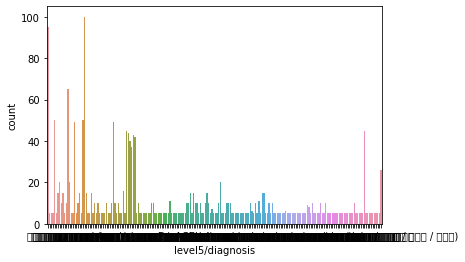

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="level5/diagnosis", data=data)
plt.show()

## 4) Calculate BMI and define Obesity with Weight and Height
- https://www.tongyeong.go.kr/health/01635/01898/01902.web

In [ ]:
# Correct Height error
idx = data[data['Height'] == '58세 여성이 소변을 자주 보고 소변을 참기 어려우며 소변 누러 화장실을 가면 미처 속옷을 내리기도 전에 소변이 흘러나오는 증상이 4년 이상 지속되어 내원하였다. 기침을 하면 소변이 약간 새며,밤에 자다가도 소변이 마려워 3번 정도 깬다고 한다. 소변이 속옷에 묻어 냄새 및 회음부 주위 피부염이 발생하며 상기 증상으로 사회생활도 힘들다고 한다. 특이 과거력은 없다.'].index
data.loc[idx, 'Height'] = ''
#print(data['Height'].iloc[850])
#data['Height'].iloc[850]=''
#print(data['Height'].iloc[850])

In [ ]:
data['Height'] = data['Height'].replace('', '0')
data['Weight'] = data['Weight'].replace('', '0')

data['Height'] = data['Height'].astype('int')
data['Weight'] = data['Weight'].astype('int')

In [ ]:
data['BMI'] = data['Weight'] / (data['Height']/100)**2
data['BMI'].fillna(-1, inplace=True)

In [ ]:
def define_obesity(x):
  if x < 0:
    return '알 수 없음'
  elif x < 20.0:
    return '저체중'
  elif x <= 24.0:
    return '정상'
  elif x <= 29.0:
    return '과체중'
  else:
    return '비만'

data['Obesity'] = data.apply(lambda x : define_obesity(x['BMI']), axis=1)

## 5) Change Age to Groups of Age

Infant/Child's Grouping Reference: https://www.doctorsnews.co.kr/news/articleView.html?idxno=20917&replyAll=&reply_sc_order_by=I

In [ ]:
data['Age'] = data['Age'].astype(str)

In [ ]:
import re

def replace_age(x):

  if ('개월' in x) or ('달' in x) or ('개월' in x):
    #print(x)
    month_age = int(re.findall("\d+", x)[0])*4
    x = '생후 ' + str(month_age) + '주'
  
  if ('주' in x):
     week_age = int(re.findall("\d+", x)[0])
     if week_age <= 4:
       x = '신생아' # 태어나서 1개월까지(newborn)
     elif week_age <= 4*12:
       x = '영아' # 태어나서 1년까지(infant)
     else:
       x = '유아' # 만 1세부터 6세까지(child)
  else:
     x = x.replace('세', '')
     x = x[:2]
     x = int(x)#.astype(int)
     x = str(x//10*10)+'대'

  return x

data['Age'] = data.apply(lambda x : replace_age(x['Age']), axis=1)

ValueError: ignored

In [ ]:
data['Age']

0       50대
1       30대
2       70대
3       10대
4       60대
       ... 
2034    60대
2035    50대
2036    50대
2037    60대
2038    50대
Name: Age, Length: 2039, dtype: object

## 6) Arrange Sex

In [ ]:
data['Sex'].value_counts()

남자    1213
여자    1040
         3
Name: Sex, dtype: int64

In [ ]:
def organize_sex(x):
  x = x.replace('F', '여자')
  x = x.replace('M', '남자')
  x = x.replace('여성', '여자')
  x = x.replace('남성', '남자')
  x = x.replace('여자 ', '여자')
  x = x.replace('여자  ', '여자')
  x = x.replace('남자 ', '남자')
  x = x.replace('남성 ', '남자')

  return x

data['Sex'] = organize_sex(data['Sex'])

In [ ]:
data['Sex'].value_counts()

남자    1184
여자    1028
         3
Name: Sex, dtype: int64

## 7) Remove Negative values(-)

In [ ]:
data.columns[10:21]

Index(['Course', 'Experience', 'Character', 'Associated Sx.', 'Factor',
       'Event', '약물 투약력', '사회력', '가족력', '외상력', '과거력'],
      dtype='object')

In [ ]:
# since regex doesn't support '+', change '+' to '#'
def to_new_positive_value(x):
  if('+' in x):
    x = x.replace('+', '#')#np.nan
    
  return x

for m in data.columns[10:21]: #'Experience', 'Character', 'Associated Sx.', 'Factor', 'Event', '약물 투약력', '사회력', '가족력', '외상력', '과거력', '여성력']
  data[m] = data.apply(lambda x : to_new_positive_value(x[m]) , axis = 1 )

In [ ]:
idx = data[data['Associated Sx.'] == '발열(#, 4주 전) 가래(#), 기침(#), 체중변화 (#, -4kg/2개월)'].index
data.loc[idx, 'Associated Sx.'] = '발열(#, 4주 전), 가래(#), 기침(#), 체중변화 (#, -4kg/2개월)'

idx = data[data['사회력'] == '술(#주) 흡연(#), 과식(#), 지방식(#)'].index
data.loc[idx, '사회력'] = '술(#주), 흡연(#), 과식(#), 지방식(#)'

In [ ]:
data['Associated Sx.'][0]

', 구토 (# 2회 흰 물만 나옴 ), 속쓰림, [응급] 어지러움 (#), 갈증 (#), 소변량 감소 (#), '

In [ ]:
def remove_negative_values(x):
  
  #print('x',x,'1')
  # 1. To extract texts from brackets: (-/#, 2회 흰 물만 나옴 /-/-/-).
  brackets = re.findall('\((.*?)\)', x) # ['-/-/-/-/-', '-/#, 2회 흰 물만 나옴 /-/-/-', '-', '#/#/#/-']
  for i in range(len(brackets)):
    n = brackets[i].split('/') # ['-', '#, 2회 흰 물만 나옴 ', '-', '-', '-']

    for j in range(len(n)):
      if len(n[j])>1:
        tmp_str = n[j][2:] #  Behind '#, ' --> ' 2회 흰 물만 나옴 '
        if len(re.findall('\#', n[j]))==0: # '(#) (지금 복용 중)'
          n[j]=''
        else:
          n[j] = '#'   
        x = x.replace(brackets[i],'/'.join(n)) # Drawback: doesn't contain texts which was in brackets

  #if len(re.findall(r"(\d+)-?(\d+)", x)) > 0: # 하루 4-5회
  #  x = x.replace('-', '~')

  # 2. To remove negative values
  splited_x = x.split(',')
  for i in range(len(splited_x)):
    if ('및' in splited_x[i]):
      splited_x = x.split(',') and x.split('및')
      break

  #print(splited_x)
  for i in range(len(splited_x)):
    ne_or_po = re.findall('-|#',splited_x[i]) #.index('') ['#', '#', '#', '-']
    sym = splited_x[i].split('/') # [' [응급] 어지러움 ', ' 갈증 ', ' 소변량 감소 ', ' 호흡곤란(#', '#', '#', '-)']

    only_positive = ""
    #print(ne_or_po)
    for j in range(len(ne_or_po)):
      if ne_or_po[j] != '-':
        only_positive += sym[j]

      splited_x[i] = only_positive
        #print('@fin_splited_x', splited_x[i])
  x = (',').join(splited_x)
  #print('@@fin_x', x)

  return x


In [ ]:
#for m in data.columns[10:21]: #'Experience', 'Character', 'Associated Sx.', 'Factor', 'Event', '약물 투약력', '사회력', '가족력', '외상력', '과거력', '여성력']
#  data[m] = data.apply(lambda x : remove_negative_values(x[m]) , axis = 1 )

In [ ]:
data['Associated Sx.'][0]

', 구토 (# 2회 흰 물만 나옴 ), 속쓰림, [응급] 어지러움 (#), 갈증 (#), 소변량 감소 (#), '

In [ ]:
def to_ori_new_positive_value(x):
  if('#' in x):
    x = x.replace('#', '+')#np.nan/////
    
  return x

for m in data.columns[10:21]: #'Experience', 'Character', 'Associated Sx.', 'Factor', 'Event', '약물 투약력', '사회력', '가족력', '외상력', '과거력', '여성력']
  data[m] = data.apply(lambda x : to_ori_new_positive_value(x[m]) , axis = 1 )

In [ ]:
#data_test = data.copy()
#data_test

In [ ]:
data

,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
0,급성 복통,소화성 궤양,배가 아파요,남자,50대,170,80,1일전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, 통증 심함, 방사통(+), 등으로 퍼짐,",", 구토 (+ 2회 흰 물만 나옴 ), 속쓰림, [응급] 어지러움 (+), 갈증 (...","자세에 따른 변화(+), 오른쪽으로 돌아 누우면 완화, 반듯이 누우면 악화,",,,"술(+), 1주일 6~7번, 하루 소주 2~3병, 담배(+), 30갑년, 식사 , ...",,,,,digestive,27.681661,과체중,배 아프다 50 대다 남자 1일 전 명치 부위 지속 심해지다 이전 에도 3 차례 통...
1,급성 복통,소화성 궤양,갑자기 배가 너무 아파요,남자,30대,165,70,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,지속,심해짐,이전에도 한 번 겪음,"계속 쓰림, 통증 중간","구역질, 구토, 식욕감소",앞으로 숙이는 경우 완화,2년 전 건강 검진 상 이상 없음,"관절염 약(진통소염제),","술, 회, 주 2~3회), 회사원, 회식이 잦고 폭음하는 경우가 있음,",,,,,digestive,25.711662,과체중,갑자기 배 너무 아프다 30 대다 남자 오늘 새벽 명치 에서 시작 현재 복부 전체 ...
2,급성 복통,소화성 궤양,속이 쓰려요,여자,70대,160,48,1달전,명치 부위,지속,심해짐,,"속이 쓰림, 통증 약함","구역질, 신물이 올라와요",누워있으면 심해져요,,관절염약 복용중,,,,"HTN(+), DM (+),",,digestive,18.750000,저체중,속이다 쓰리다 70 대다 여자 1 달 전 명치 부위 지속 심해지다 속이다 쓰리다 통...
3,급성 복통,소화성 궤양,속이 쓰려요,남자,10대,160,58,2달전,명치부위,지속,심해짐,,"명치부위 압통, 속쓰림",구토,,,철분제,,,,,,digestive,22.656250,정상,속이다 쓰리다 10 대다 남자 2 달 전 명치 부위 지속 심해지다 명치 부위 누르다...
4,급성 복통,소화성 궤양,배가 아파요,남자,60대,170,65,1시간전,명치부위,지속,심해짐,,명치 부위가 아프고 쓰림,,,,고혈압약,5년전 알코올 중독,,,"HTN(+),",,digestive,22.491349,정상,배 아프다 60 대다 남자 1시간 전 명치 부위 지속 심해지다 명치 부위 아프다 쓰...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 새요""",여자,60대,170,60,2년 전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,폐경,kidney,20.761246,정상,소변 새 60 대다 여자 2년 전 심해지다 처음 Delirium Infection ...
2035,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 자주 새어나와 속옷이 젖어요""",남자,50대,150,48,4년전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,,kidney,21.333333,정상,소변 자주 새다 나오다 속옷 젖다 50 대다 남자 4년 전 심해지다 처음 Delir...
2036,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),소변이 자꾸 새어 나와요,여자,50대,175,70,약 6개월 전부터 서서히 발생함,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,폐경,kidney,22.857143,정상,소변 자꾸 새다 나오다 50 대다 여자 약 6 개월 전 부터 서서히 발생 함 심해지...
2037,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 새요""",남자,60대,170,60,4개월 전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,,kidney,20.761246,정상,소변 새 60 대다 남자 4 개월 전 심해지다 처음 Delirium Infectio...


## 8) NRS scores to text

In [ ]:
#NRS 5점
#NRS: 5
#NRS 4~6 / NRS : 4~6

In [ ]:
def NRS_to_text(text):

  a = re.findall('NRS.*?점', text) #NRS 5점
  if len(a) == 0:
    a = re.findall('NRS.*?\d~\d', text) #NRS 4~6 / NRS : 4~6
  if len(a) == 0:
    a = re.findall('NRS.*?\d', text) #NRS: 5
  
  try:
    t = re.findall('[0-9]+', a[0])

    if (len(t) == 2):
      score = (int(t[0])+int(t[1]))/ 2
    else:
      score = int(t[0])

    if score >= 7:
      to_text = '심함'
    elif score >= 4:
      to_text = '중간'
    else:
      to_text = '약함'

    text = text.replace(a[0], to_text)
  
  except:
    pass

  return text

In [ ]:
#text = '뻐근한 통증, NRS : 1~6, 등이랑 목으로 뻗침'
text = '뻐근한 통증dd, NRS : 1~6, 등이랑 목으로 뻗침'

NRS_to_text(text)

'뻐근한 통증dd, 약함, 등이랑 목으로 뻗침'

In [ ]:
#data[data['Character'] == '쥐어짜는 느낌의 통증, NRS 7점, 턱과 목쪽으로 방사되는 통증, 왼팔로도 통증이 뻗치는 듯한 느낌 있음']
#data.iloc[872]['Character']

In [ ]:
data

,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
0,급성 복통,소화성 궤양,배가 아파요,남자,50대,170,80,1일전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, 통증 심함, 방사통(+), 등으로 퍼짐,",", 구토 (+ 2회 흰 물만 나옴 ), 속쓰림, [응급] 어지러움 (+), 갈증 (...","자세에 따른 변화(+), 오른쪽으로 돌아 누우면 완화, 반듯이 누우면 악화,",,,"술(+), 1주일 6~7번, 하루 소주 2~3병, 담배(+), 30갑년, 식사 , ...",,,,,digestive,27.681661,과체중,배 아프다 50 대다 남자 1일 전 명치 부위 지속 심해지다 이전 에도 3 차례 통...
1,급성 복통,소화성 궤양,갑자기 배가 너무 아파요,남자,30대,165,70,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,지속,심해짐,이전에도 한 번 겪음,"계속 쓰림, 통증 중간","구역질, 구토, 식욕감소",앞으로 숙이는 경우 완화,2년 전 건강 검진 상 이상 없음,"관절염 약(진통소염제),","술, 회, 주 2~3회), 회사원, 회식이 잦고 폭음하는 경우가 있음,",,,,,digestive,25.711662,과체중,갑자기 배 너무 아프다 30 대다 남자 오늘 새벽 명치 에서 시작 현재 복부 전체 ...
2,급성 복통,소화성 궤양,속이 쓰려요,여자,70대,160,48,1달전,명치 부위,지속,심해짐,,"속이 쓰림, 통증 약함","구역질, 신물이 올라와요",누워있으면 심해져요,,관절염약 복용중,,,,"HTN(+), DM (+),",,digestive,18.750000,저체중,속이다 쓰리다 70 대다 여자 1 달 전 명치 부위 지속 심해지다 속이다 쓰리다 통...
3,급성 복통,소화성 궤양,속이 쓰려요,남자,10대,160,58,2달전,명치부위,지속,심해짐,,"명치부위 압통, 속쓰림",구토,,,철분제,,,,,,digestive,22.656250,정상,속이다 쓰리다 10 대다 남자 2 달 전 명치 부위 지속 심해지다 명치 부위 누르다...
4,급성 복통,소화성 궤양,배가 아파요,남자,60대,170,65,1시간전,명치부위,지속,심해짐,,명치 부위가 아프고 쓰림,,,,고혈압약,5년전 알코올 중독,,,"HTN(+),",,digestive,22.491349,정상,배 아프다 60 대다 남자 1시간 전 명치 부위 지속 심해지다 명치 부위 아프다 쓰...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 새요""",여자,60대,170,60,2년 전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,폐경,kidney,20.761246,정상,소변 새 60 대다 여자 2년 전 심해지다 처음 Delirium Infection ...
2035,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 자주 새어나와 속옷이 젖어요""",남자,50대,150,48,4년전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,,kidney,21.333333,정상,소변 자주 새다 나오다 속옷 젖다 50 대다 남자 4년 전 심해지다 처음 Delir...
2036,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),소변이 자꾸 새어 나와요,여자,50대,175,70,약 6개월 전부터 서서히 발생함,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,폐경,kidney,22.857143,정상,소변 자꾸 새다 나오다 50 대다 여자 약 6 개월 전 부터 서서히 발생 함 심해지...
2037,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 새요""",남자,60대,170,60,4개월 전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,,kidney,20.761246,정상,소변 새 60 대다 남자 4 개월 전 심해지다 처음 Delirium Infectio...


In [ ]:
data_test = data.copy()
data_test

,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
0,급성 복통,소화성 궤양,배가 아파요,남자,50대,170,80,1일전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, 통증 심함, 방사통(+), 등으로 퍼짐,",", 구토 (+ 2회 흰 물만 나옴 ), 속쓰림, [응급] 어지러움 (+), 갈증 (...","자세에 따른 변화(+), 오른쪽으로 돌아 누우면 완화, 반듯이 누우면 악화,",,,"술(+), 1주일 6~7번, 하루 소주 2~3병, 담배(+), 30갑년, 식사 , ...",,,,,digestive,27.681661,과체중,배 아프다 50 대다 남자 1일 전 명치 부위 지속 심해지다 이전 에도 3 차례 통...
1,급성 복통,소화성 궤양,갑자기 배가 너무 아파요,남자,30대,165,70,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,지속,심해짐,이전에도 한 번 겪음,"계속 쓰림, 통증 중간","구역질, 구토, 식욕감소",앞으로 숙이는 경우 완화,2년 전 건강 검진 상 이상 없음,"관절염 약(진통소염제),","술, 회, 주 2~3회), 회사원, 회식이 잦고 폭음하는 경우가 있음,",,,,,digestive,25.711662,과체중,갑자기 배 너무 아프다 30 대다 남자 오늘 새벽 명치 에서 시작 현재 복부 전체 ...
2,급성 복통,소화성 궤양,속이 쓰려요,여자,70대,160,48,1달전,명치 부위,지속,심해짐,,"속이 쓰림, 통증 약함","구역질, 신물이 올라와요",누워있으면 심해져요,,관절염약 복용중,,,,"HTN(+), DM (+),",,digestive,18.750000,저체중,속이다 쓰리다 70 대다 여자 1 달 전 명치 부위 지속 심해지다 속이다 쓰리다 통...
3,급성 복통,소화성 궤양,속이 쓰려요,남자,10대,160,58,2달전,명치부위,지속,심해짐,,"명치부위 압통, 속쓰림",구토,,,철분제,,,,,,digestive,22.656250,정상,속이다 쓰리다 10 대다 남자 2 달 전 명치 부위 지속 심해지다 명치 부위 누르다...
4,급성 복통,소화성 궤양,배가 아파요,남자,60대,170,65,1시간전,명치부위,지속,심해짐,,명치 부위가 아프고 쓰림,,,,고혈압약,5년전 알코올 중독,,,"HTN(+),",,digestive,22.491349,정상,배 아프다 60 대다 남자 1시간 전 명치 부위 지속 심해지다 명치 부위 아프다 쓰...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 새요""",여자,60대,170,60,2년 전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,폐경,kidney,20.761246,정상,소변 새 60 대다 여자 2년 전 심해지다 처음 Delirium Infection ...
2035,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 자주 새어나와 속옷이 젖어요""",남자,50대,150,48,4년전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,,kidney,21.333333,정상,소변 자주 새다 나오다 속옷 젖다 50 대다 남자 4년 전 심해지다 처음 Delir...
2036,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),소변이 자꾸 새어 나와요,여자,50대,175,70,약 6개월 전부터 서서히 발생함,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,폐경,kidney,22.857143,정상,소변 자꾸 새다 나오다 50 대다 여자 약 6 개월 전 부터 서서히 발생 함 심해지...
2037,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 새요""",남자,60대,170,60,4개월 전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,,kidney,20.761246,정상,소변 새 60 대다 남자 4 개월 전 심해지다 처음 Delirium Infectio...


In [ ]:
for m in data.columns[10:21]: #'Experience', 'Character', 'Associated Sx.', 'Factor', 'Event', '약물 투약력', '사회력', '가족력', '외상력', '과거력', '여성력']
  data_test[m] = data_test.apply(lambda x : NRS_to_text(x[m]) , axis = 1 )

In [ ]:
data_test

,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
0,급성 복통,소화성 궤양,배가 아파요,남자,50대,170,80,1일전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, 통증 심함, 방사통(+), 등으로 퍼짐,",", 구토 (+ 2회 흰 물만 나옴 ), 속쓰림, [응급] 어지러움 (+), 갈증 (...","자세에 따른 변화(+), 오른쪽으로 돌아 누우면 완화, 반듯이 누우면 악화,",,,"술(+), 1주일 6~7번, 하루 소주 2~3병, 담배(+), 30갑년, 식사 , ...",,,,,digestive,27.681661,과체중,배 아프다 50 대다 남자 1일 전 명치 부위 지속 심해지다 이전 에도 3 차례 통...
1,급성 복통,소화성 궤양,갑자기 배가 너무 아파요,남자,30대,165,70,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,지속,심해짐,이전에도 한 번 겪음,"계속 쓰림, 통증 중간","구역질, 구토, 식욕감소",앞으로 숙이는 경우 완화,2년 전 건강 검진 상 이상 없음,"관절염 약(진통소염제),","술, 회, 주 2~3회), 회사원, 회식이 잦고 폭음하는 경우가 있음,",,,,,digestive,25.711662,과체중,갑자기 배 너무 아프다 30 대다 남자 오늘 새벽 명치 에서 시작 현재 복부 전체 ...
2,급성 복통,소화성 궤양,속이 쓰려요,여자,70대,160,48,1달전,명치 부위,지속,심해짐,,"속이 쓰림, 통증 약함","구역질, 신물이 올라와요",누워있으면 심해져요,,관절염약 복용중,,,,"HTN(+), DM (+),",,digestive,18.750000,저체중,속이다 쓰리다 70 대다 여자 1 달 전 명치 부위 지속 심해지다 속이다 쓰리다 통...
3,급성 복통,소화성 궤양,속이 쓰려요,남자,10대,160,58,2달전,명치부위,지속,심해짐,,"명치부위 압통, 속쓰림",구토,,,철분제,,,,,,digestive,22.656250,정상,속이다 쓰리다 10 대다 남자 2 달 전 명치 부위 지속 심해지다 명치 부위 누르다...
4,급성 복통,소화성 궤양,배가 아파요,남자,60대,170,65,1시간전,명치부위,지속,심해짐,,명치 부위가 아프고 쓰림,,,,고혈압약,5년전 알코올 중독,,,"HTN(+),",,digestive,22.491349,정상,배 아프다 60 대다 남자 1시간 전 명치 부위 지속 심해지다 명치 부위 아프다 쓰...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 새요""",여자,60대,170,60,2년 전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,폐경,kidney,20.761246,정상,소변 새 60 대다 여자 2년 전 심해지다 처음 Delirium Infection ...
2035,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 자주 새어나와 속옷이 젖어요""",남자,50대,150,48,4년전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,,kidney,21.333333,정상,소변 자주 새다 나오다 속옷 젖다 50 대다 남자 4년 전 심해지다 처음 Delir...
2036,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),소변이 자꾸 새어 나와요,여자,50대,175,70,약 6개월 전부터 서서히 발생함,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,폐경,kidney,22.857143,정상,소변 자꾸 새다 나오다 50 대다 여자 약 6 개월 전 부터 서서히 발생 함 심해지...
2037,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 새요""",남자,60대,170,60,4개월 전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,,kidney,20.761246,정상,소변 새 60 대다 남자 4 개월 전 심해지다 처음 Delirium Infectio...


In [ ]:
for m in data.columns[10:21]: #'Experience', 'Character', 'Associated Sx.', 'Factor', 'Event', '약물 투약력', '사회력', '가족력', '외상력', '과거력', '여성력']
  data[m] = data.apply(lambda x : NRS_to_text(x[m]) , axis = 1 )

## 9-1) Make a sentence

In [ ]:
data['All']

0       배 아프다 50 대다 남자 1일 전 명치 부위 지속 심해지다 이전 에도 3 차례 통...
1       갑자기 배 너무 아프다 30 대다 남자 오늘 새벽 명치 에서 시작 현재 복부 전체 ...
2       속이다 쓰리다 70 대다 여자 1 달 전 명치 부위 지속 심해지다 속이다 쓰리다 통...
3       속이다 쓰리다 10 대다 남자 2 달 전 명치 부위 지속 심해지다 명치 부위 누르다...
4       배 아프다 60 대다 남자 1시간 전 명치 부위 지속 심해지다 명치 부위 아프다 쓰...
                              ...                        
2034    소변 새 60 대다 여자 2년 전 심해지다 처음 Delirium Infection ...
2035    소변 자주 새다 나오다 속옷 젖다 50 대다 남자 4년 전 심해지다 처음 Delir...
2036    소변 자꾸 새다 나오다 50 대다 여자 약 6 개월 전 부터 서서히 발생 함 심해지...
2037    소변 새 60 대다 남자 4 개월 전 심해지다 처음 Delirium Infectio...
2038    소변 자주 새다 나오다 속옷 젖다 50 대다 여자 4 달 전 심해지다 처음 Deli...
Name: All, Length: 2039, dtype: object

In [ ]:
data['All'] = (data['level2'].map(str) + '. ' +
                data['Chief complaint'].map(str) +'. '+ data['Age'].map(str) + '. '+
                data['Sex'].map(str) + '. '+
                data['Onset'].map(str) + '. '+ data['Location'].map(str) + '. ' +
                data['Duration'].map(str) + '. ' + data['Course'].map(str) + '. ' +
                data['Experience'].map(str) + '. ' + data['Character'].map(str) + '. ' +
                data['Associated Sx.'].map(str)+'. '+ data['Factor'].map(str) + '. ' +
                data['Event'].map(str) + '. ' + data['약물 투약력'].map(str) + '. ' +
                data['사회력'].map(str) + '. ' + data['가족력'].map(str) + '. ' +
                data['외상력'].map(str) + '. ' + data['과거력'].map(str) + '. ' +
                data['여성력'].map(str) + '. ' + data['Obesity']).apply(lambda row: row.strip())

In [ ]:
data['All']

0       급성 복통. 배가 아파요. 50대. 남자. 1일전. 명치 부위. 지속. 심해짐. 이...
1       급성 복통. 갑자기 배가 너무 아파요. 30대. 남자. 오늘 새벽. 명치에서 시작해...
2       급성 복통. 속이 쓰려요. 70대. 여자. 1달전. 명치 부위. 지속. 심해짐. ....
3       급성 복통. 속이 쓰려요. 10대. 남자. 2달전. 명치부위 . 지속. 심해짐. ....
4       급성 복통. 배가 아파요. 60대. 남자. 1시간전. 명치부위. 지속. 심해짐. ....
                              ...                        
2034    소변찔끔증. "소변이 새요". 60대. 여자. 2년 전. . . 심해짐. 처음. D...
2035    소변찔끔증. "소변이 자주 새어나와 속옷이 젖어요". 50대. 남자. 4년전. . ...
2036    소변찔끔증. 소변이 자꾸 새어 나와요. 50대. 여자. 약 6개월 전부터 서서히 발...
2037    소변찔끔증. "소변이 새요". 60대. 남자. 4개월 전. . . 심해짐. 처음. ...
2038    소변찔끔증. "소변이 자주 새어나와 속옷이 젖어요". 50대. 여자. 4달 전. ....
Name: All, Length: 2039, dtype: object

In [ ]:

data

,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
0,급성 복통,소화성 궤양,배가 아파요,남자,50대,170,80,1일전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, 통증 심함, 방사통(+), 등으로 퍼짐,",", 구토 (+ 2회 흰 물만 나옴 ), 속쓰림, [응급] 어지러움 (+), 갈증 (...","자세에 따른 변화(+), 오른쪽으로 돌아 누우면 완화, 반듯이 누우면 악화,",,,"술(+), 1주일 6~7번, 하루 소주 2~3병, 담배(+), 30갑년, 식사 , ...",,,,,digestive,27.681661,과체중,급성 복통. 배가 아파요. 50대. 남자. 1일전. 명치 부위. 지속. 심해짐. 이...
1,급성 복통,소화성 궤양,갑자기 배가 너무 아파요,남자,30대,165,70,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,지속,심해짐,이전에도 한 번 겪음,"계속 쓰림, 통증 중간","구역질, 구토, 식욕감소",앞으로 숙이는 경우 완화,2년 전 건강 검진 상 이상 없음,"관절염 약(진통소염제),","술, 회, 주 2~3회), 회사원, 회식이 잦고 폭음하는 경우가 있음,",,,,,digestive,25.711662,과체중,급성 복통. 갑자기 배가 너무 아파요. 30대. 남자. 오늘 새벽. 명치에서 시작해...
2,급성 복통,소화성 궤양,속이 쓰려요,여자,70대,160,48,1달전,명치 부위,지속,심해짐,,"속이 쓰림, 통증 약함","구역질, 신물이 올라와요",누워있으면 심해져요,,관절염약 복용중,,,,"HTN(+), DM (+),",,digestive,18.750000,저체중,급성 복통. 속이 쓰려요. 70대. 여자. 1달전. 명치 부위. 지속. 심해짐. ....
3,급성 복통,소화성 궤양,속이 쓰려요,남자,10대,160,58,2달전,명치부위,지속,심해짐,,"명치부위 압통, 속쓰림",구토,,,철분제,,,,,,digestive,22.656250,정상,급성 복통. 속이 쓰려요. 10대. 남자. 2달전. 명치부위 . 지속. 심해짐. ....
4,급성 복통,소화성 궤양,배가 아파요,남자,60대,170,65,1시간전,명치부위,지속,심해짐,,명치 부위가 아프고 쓰림,,,,고혈압약,5년전 알코올 중독,,,"HTN(+),",,digestive,22.491349,정상,급성 복통. 배가 아파요. 60대. 남자. 1시간전. 명치부위. 지속. 심해짐. ....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 새요""",여자,60대,170,60,2년 전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,폐경,kidney,20.761246,정상,"소변찔끔증. ""소변이 새요"". 60대. 여자. 2년 전. . . 심해짐. 처음. D..."
2035,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 자주 새어나와 속옷이 젖어요""",남자,50대,150,48,4년전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,,kidney,21.333333,정상,"소변찔끔증. ""소변이 자주 새어나와 속옷이 젖어요"". 50대. 남자. 4년전. . ..."
2036,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),소변이 자꾸 새어 나와요,여자,50대,175,70,약 6개월 전부터 서서히 발생함,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,폐경,kidney,22.857143,정상,소변찔끔증. 소변이 자꾸 새어 나와요. 50대. 여자. 약 6개월 전부터 서서히 발...
2037,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 새요""",남자,60대,170,60,4개월 전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,,kidney,20.761246,정상,"소변찔끔증. ""소변이 새요"". 60대. 남자. 4개월 전. . . 심해짐. 처음. ..."


## 9) Check spelling

In [ ]:
def manual_spelling(x):
  # Need to update more!!
  x = x.replace('Live(', 'Liver(')
  x = x.replace('혈번', '혈변')
  x = x.replace('[회수] 회 / 일', '')
  x = x.replace('ㅊ음', '처음')
  x = x.replace('위엄', '위염')
  x = x.replace('소회기', '소화기')
  x = x.replace('소화쉐양', '소화궤양')
  x = x.replace('무릅', '무릎')
  x = x.replace('성광계', '성관계')
  x = x.replace('게속', '계속')
  x = x.replace('느김', '느낌')
  x = x.replace('불규칙하', '불규칙한')
  x = x.replace('뻗뻗', '뻣뻣')
  x = x.replace('부움', '부음')
  x = x.replace('피료', '피로')
  x = x.replace('들이마쉴', '들이마실')
  x = x.replace('(Olodaterol)', '')
  x = x.replace('체충', '체중')
  x = x.replace('속옥', '속옷')
  x = x.replace('아이업음', '아이없음')
  x = x.replace('재왕절개', '제왕절개')
  x = x.replace('얄', '열')
  x = x.replace('연 (', '열 (')
  x = x.replace('가끔식', '가끔씩')
  x = x.replace('붙성교', '성교')
  x = x.replace('월경량와', '월경량과')
  x = x.replace('호ㅡㅂ음', '호흡음')
  x = x.replace('오료계', '요로계')
  x = x.replace('분철성', '분출성')
  return x

In [ ]:
#for m in data.columns[6:21]: #'Experience', 'Character', 'Associated Sx.', 'Factor', 'Event', '약물 투약력', '사회력', '가족력', '외상력', '과거력', '여성력']
#  data[m] = data.apply(lambda x : manual_spelling(x[m]) , axis = 1 )
data['All'] = manual_spelling(data['All'])

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-bl_ypjmq
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-bl_ypjmq
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=2738618a58aaa181efdfa61db9721c660474c4ed7048e07b11360d868b3261fe
  Stored in directory: /tmp/pip-ephem-wheel-cache-tb7s9l8d/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [ ]:
data['All']

0       급성 복통. 배가 아파요. 50대. 남자. 1일전. 명치 부위. 지속. 심해짐. 이...
1       급성 복통. 갑자기 배가 너무 아파요. 30대. 남자. 오늘 새벽. 명치에서 시작해...
2       급성 복통. 속이 쓰려요. 70대. 여자. 1달전. 명치 부위. 지속. 심해짐. ....
3       급성 복통. 속이 쓰려요. 10대. 남자. 2달전. 명치부위 . 지속. 심해짐. ....
4       급성 복통. 배가 아파요. 60대. 남자. 1시간전. 명치부위. 지속. 심해짐. ....
                              ...                        
2034    소변찔끔증. "소변이 새요". 60대. 여자. 2년 전. . . 심해짐. 처음. D...
2035    소변찔끔증. "소변이 자주 새어나와 속옷이 젖어요". 50대. 남자. 4년전. . ...
2036    소변찔끔증. 소변이 자꾸 새어 나와요. 50대. 여자. 약 6개월 전부터 서서히 발...
2037    소변찔끔증. "소변이 새요". 60대. 남자. 4개월 전. . . 심해짐. 처음. ...
2038    소변찔끔증. "소변이 자주 새어나와 속옷이 젖어요". 50대. 여자. 4달 전. ....
Name: All, Length: 2039, dtype: object

In [ ]:
from tqdm.notebook import tqdm
from hanspell import spell_checker

def spelling_check(text):
  #print(text)
  result = spell_checker.check(text) 
  
  return result.as_dict()['checked'] 

In [ ]:
for i in tqdm(range(len(data))):
  data['All'][i] = spelling_check(data['All'][i])

  0%|          | 0/2039 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data['All']

0       급성 복통. 배가 아파요. 50대. 남자. 1일 전. 명치 부위. 지속. 심해짐. ...
1       급성 복통. 갑자기 배가 너무 아파요. 30대. 남자. 오늘 새벽. 명치에서 시작해...
2       급성 복통. 속이 쓰려요. 70대. 여자. 1달 전. 명치 부위. 지속. 심해짐. ...
3       급성 복통. 속이 쓰려요. 10대. 남자. 2달 전. 명치 부위. 지속. 심해짐. ...
4       급성 복통. 배가 아파요. 60대. 남자. 1시간 전. 명치 부위. 지속. 심해짐....
                              ...                        
2034    소변 찔끔 증. "소변이 새요". 60대. 여자. 2년 전. . . 심해짐. 처음....
2035    소변 찔끔 증. "소변이 자주 새어 나와 속옷이 젖어요". 50대. 남자. 4년 전...
2036    소변 찔끔 증. 소변이 자꾸 새어 나와요. 50대. 여자. 약 6개월 전부터 서서히...
2037    소변 찔끔 증. "소변이 새요". 60대. 남자. 4개월 전. . . 심해짐. 처음...
2038    소변 찔끔 증. "소변이 자주 새어 나와 속옷이 젖어요". 50대. 여자. 4달 전...
Name: All, Length: 2039, dtype: object

In [ ]:
data

,level2,level5/diagnosis,Chief complaint,Sex,Age,Height,Weight,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,Level1,BMI,Obesity,All
0,급성 복통,소화성 궤양,배가 아파요,남자,50대,170,80,1일전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, 통증 심함, 방사통(+), 등으로 퍼짐,",", 구토 (+ 2회 흰 물만 나옴 ), 속쓰림, [응급] 어지러움 (+), 갈증 (...","자세에 따른 변화(+), 오른쪽으로 돌아 누우면 완화, 반듯이 누우면 악화,",,,"술(+), 1주일 6~7번, 하루 소주 2~3병, 담배(+), 30갑년, 식사 , ...",,,,,digestive,27.681661,과체중,급성 복통. 배가 아파요. 50대. 남자. 1일 전. 명치 부위. 지속. 심해짐. ...
1,급성 복통,소화성 궤양,갑자기 배가 너무 아파요,남자,30대,165,70,오늘 새벽,명치에서 시작해 현재 복부 전체에 통증,지속,심해짐,이전에도 한 번 겪음,"계속 쓰림, 통증 중간","구역질, 구토, 식욕감소",앞으로 숙이는 경우 완화,2년 전 건강 검진 상 이상 없음,"관절염 약(진통소염제),","술, 회, 주 2~3회), 회사원, 회식이 잦고 폭음하는 경우가 있음,",,,,,digestive,25.711662,과체중,급성 복통. 갑자기 배가 너무 아파요. 30대. 남자. 오늘 새벽. 명치에서 시작해...
2,급성 복통,소화성 궤양,속이 쓰려요,여자,70대,160,48,1달전,명치 부위,지속,심해짐,,"속이 쓰림, 통증 약함","구역질, 신물이 올라와요",누워있으면 심해져요,,관절염약 복용중,,,,"HTN(+), DM (+),",,digestive,18.750000,저체중,급성 복통. 속이 쓰려요. 70대. 여자. 1달 전. 명치 부위. 지속. 심해짐. ...
3,급성 복통,소화성 궤양,속이 쓰려요,남자,10대,160,58,2달전,명치부위,지속,심해짐,,"명치부위 압통, 속쓰림",구토,,,철분제,,,,,,digestive,22.656250,정상,급성 복통. 속이 쓰려요. 10대. 남자. 2달 전. 명치 부위. 지속. 심해짐. ...
4,급성 복통,소화성 궤양,배가 아파요,남자,60대,170,65,1시간전,명치부위,지속,심해짐,,명치 부위가 아프고 쓰림,,,,고혈압약,5년전 알코올 중독,,,"HTN(+),",,digestive,22.491349,정상,급성 복통. 배가 아파요. 60대. 남자. 1시간 전. 명치 부위. 지속. 심해짐....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2034,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 새요""",여자,60대,170,60,2년 전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,폐경,kidney,20.761246,정상,"소변 찔끔 증. ""소변이 새요"". 60대. 여자. 2년 전. . . 심해짐. 처음...."
2035,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 자주 새어나와 속옷이 젖어요""",남자,50대,150,48,4년전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,,kidney,21.333333,정상,"소변 찔끔 증. ""소변이 자주 새어 나와 속옷이 젖어요"". 50대. 남자. 4년 전..."
2036,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),소변이 자꾸 새어 나와요,여자,50대,175,70,약 6개월 전부터 서서히 발생함,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,폐경,kidney,22.857143,정상,소변 찔끔 증. 소변이 자꾸 새어 나와요. 50대. 여자. 약 6개월 전부터 서서히...
2037,소변찔끔증,요실금(혼합성 / 일류성 / 일시적 / 복압성 / 절박성),"""소변이 새요""",남자,60대,170,60,4개월 전,,,심해짐,처음,"Delirium, Infection, Atropic urthritis and vag...",,,,,,,,,,kidney,20.761246,정상,"소변 찔끔 증. ""소변이 새요"". 60대. 남자. 4개월 전. . . 심해짐. 처음..."


## 10) Change English words to Korean

In [ ]:
def replace_eng_to_kor(x):
  # Need to update more!!
  x = x.replace('Liver', '간염')
  x = x.replace('Hepatitis', '간염')
  x = x.replace('DM', '당뇨')
  x = x.replace('TBc', '결핵')
  x = x.replace('TB', '결핵')
  x = x.replace('HTN', '고혈압')
  x = x.replace('Dyslipidemia', '이상지질혈증')
  x = x.replace('dyslipidemia', '이상지질혈증')
  x = x.replace('소염진통제(NSAIDs)', '소염진통제')
  x = x.replace('NSAIDs', '소염진통제')
  x = x.replace('NSAID', '소염진통제')
  x = x.replace('LMP', '마지막 월경')
  x = x.replace("Murphy's sign", '숨을 들이쉬는 동안 오른쪽 갈비뼈 밑 인근 부위를 만지면 통증이 생기는 증상')
  x = x.replace('Valsartan', '고혈압약')
  x = x.replace('고혈압약(amlodipine)', '고혈압약')
  x = x.replace('항고혈압제(Amlodipine)', '고혈압약')
  x = x.replace('Amlodipine', '고혈압약')
  x = x.replace('amlodipine', '고혈압약')
  x = x.replace('Metformin', '비구아니드 계열의 경구용 혈당강하제, 제2형 당뇨병에 사용')
  x = x.replace('BID', '하루에 2번')
  x = x.replace('Bid', '하루에 2번')
  x = x.replace('ciprofloxacin', '항생제')
  x = x.replace('QD', '하루에 한번')
  x = x.replace('우울증약(SSRI)', '우울증약')
  x = x.replace('SSRI', '우울증약')
  x = x.replace('1T', '1알')
  x = x.replace('FAP', '가족성 용종증')
  x = x.replace('COPD', '만성 폐쇄성 폐질환')
  x = x.replace('Roux-Y op', '위우회술')
  x = x.replace('terminal ileum', '직장과 결장 및 소장의 마지막 일부')
  x = x.replace('Hyperlipidemia', '고지혈증')
  x = x.replace('혈압강하제(CCB, ACEi)', '혈압강하제')
  x = x.replace('C-sec', '제왕절개')
  x = x.replace('Non-smoking, Non-Alcohol', '술 담배 안함')
  x = x.replace('F / U / N / D / H / I / S', '빈뇨/절박뇨/야뇨/배뇨통/배뇨지연/요실금/소변줄기 변화')
  
  return x

In [ ]:
data['All'].values

array(['급성 복통. 배가 아파요. 50대. 남자. 1일 전. 명치 부위. 지속. 심해짐. 이전에도 3차례, 통증은 이번보다 약했음. 칼로 찢기는 듯한 통증, 통증 심함, 방사통(+), 등으로 퍼짐, . , 구토 (+ 2회 흰 물만 나옴 ), 속 쓰림, [응급] 어지러움 (+), 갈증 (+), 소변량 감소 (+), . 자세에 따른 변화(+), 오른쪽으로 돌아누우면 완화, 반듯이 누우면 악화, . . . 술(+), 1주일 6~7번, 하루 소주 2~3병, 담배(+), 30갑년, 식사, 매우 불규칙, 직업, 포클레인 조종수, . . . . . 과체중',
       '급성 복통. 갑자기 배가 너무 아파요. 30대. 남자. 오늘 새벽. 명치에서 시작해 현재 복부 전체에 통증. 지속. 심해짐. 이전에도 한 번 겪음. 계속 쓰림, 통증 중간. 구역질, 구토, 식욕감소. 앞으로 숙이는 경우 완화. 2년 전 건강 검진 상 이상 없음. 관절염 약(진통소염제), . 술, 회, 주 2~3회), 회사원, 회식이 잦고 폭음하는 경우가 있음, . . . . . 과체중',
       '급성 복통. 속이 쓰려요. 70대. 여자. 1달 전. 명치 부위. 지속. 심해짐. . 속이 쓰림, 통증 약함. 구역질, 신물이 올라와요. 누워있으면 심해져요. . 관절염 약 복용 중. . . . HTN(+), DM (+), . . 저체중',
       ...,
       '소변 찔끔 증. 소변이 자꾸 새어 나와요. 50대. 여자. 약 6개월 전부터 서서히 발생함. . . 심해짐. 처음. Delirium, Infection, Atropic urthritis and vaginitis, Pharmacological cause, Psychological cause, Excessive urine production, Restricted mobility, Stool impaction. . . . . . . . . 폐경. 정상',
       '소변 찔끔 증. "소변이 새요". 60대. 남자. 4개월 전. 

In [ ]:
#for m in data.columns[10:21]: #'Experience', 'Character', 'Associated Sx.', 'Factor', 'Event', '약물 투약력', '사회력', '가족력', '외상력', '과거력', '여성력']
#  data[m] = data.apply(lambda x : replace_eng_to_kor(x[m]) , axis = 1 )

for i in tqdm(range(len(data))):
  data['All'][i] = replace_eng_to_kor(data['All'][i])

  0%|          | 0/2039 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## 11) Change difficuly words to easy words

In [ ]:
def replace_diffi_to_easy(x):
  # Need to update more!!
  if x=='지속' or x=='지속 ' or x=='지속됨':
      x = '하루종일'
  x = x.replace('복압 배뇨', '소변을 볼 때 힘을 줘야함')#kidney
  x = x.replace('샅통증', '사타구니 통증')
  x = x.replace('다갈', '몹시 갈증이 남')
  x = x.replace('다음', '몹시 갈증이 나 물을 많이 마심')
  x = x.replace('다뇨', '소변량 증가')
  x = x.replace('뒷무직', '잔변감')
  x = x.replace('요의', '오줌이 마려운 느낌')
  x = x.replace('급성 요폐', '소변이 마려운데 힘줘도 안 나옴')
  x = x.replace('점적뇨', '소변 후 오줌이 몇 방울씩 속옷에 묻어남')
  x = x.replace('두부 외상', '머리를 다침')
  x = x.replace('두부 타격', '머리를 다침')
  x = x.replace('섬망', '환각, 초조함, 떨림')

  x = x.replace('복장뼈아래', '가슴 중앙 아래')#digestive
  x = x.replace('방사통', '퍼지는 통증')
  x = x.replace('반동압통', '눌렀다 떼면 아픔')
  x = x.replace('반발압통', '눌렀다 떼면 아픔')
  x = x.replace('압통점', '누르면 아픔')
  x = x.replace('압통', '누르면 아픔')
  x = x.replace('장음 감소', '장의 운동 소리가 감소')
  x = x.replace('장음감소', '장의 운동 소리가 감소')
  x = x.replace('장음 소실', '장의 운동 소리가 감소')
  x = x.replace('장음 증가', '장의 운동 소리가 증가')
  x = x.replace('장음증가', '장의 운동 소리가 증가')
  x = x.replace('박동성 종괴', '두근거리는 멍울, 혹')
  x = x.replace('종괴', '멍울, 혹')
  x = x.replace('덩이', '멍울, 혹')
  x = x.replace('두덩뼈', '골반뼈 중 일부')
  x = x.replace('공막', '흰자, 눈')
  x = x.replace('혈액응고지연', '피가 안멈춰요')
  x = x.replace('인두통', '목이 아픔')
  x = x.replace('항문 열상', '항문이 찢어져서 생긴 상처')
  x = x.replace('후중감(tenesmus)', '잔변감')
  x = x.replace('경부강직', '목근육이 굳어서 머리를 앞으로 구부릴 수 없음')
  x = x.replace('조음장애', '발음장애')
  x = x.replace('구음장애', '말하기 어려움')
  x = x.replace('추위불내성', '추위를 견디지 못함')
  x = x.replace('추위 불내성', '추위를 견디지 못함')
  x = x.replace('더위불내성', '더위를 견디지 못함')
  x = x.replace('더위 불내성', '더위를 견디지 못함')
  x = x.replace('야간발한', '밤에 땀이 남')
  x = x.replace('야간 발한', '밤에 땀이 남')
  x = x.replace('발한과다', '땀이 많이 남')
  x = x.replace('전신발한', '온몸에 땀이 남')
  x = x.replace('발한', '땀이 남')
  x = x.replace('와파린', '항응고제')
  x = x.replace('경추', '목')
  x = x.replace('요추', '허리')
  x = x.replace('폴립', '종양, 용종')
  x = x.replace('의식 소실', '의식 없어짐')
  x = x.replace('의식소실', '의식 없어짐')
  x = x.replace('황달 소실', '황달 없어짐')
  x = x.replace('유지', '비슷')
  x = x.replace('우상복부', '오른쪽 윗배')
  x = x.replace('우하복부', '오른쪽 아랫배')
  x = x.replace('우측복부', '오른쪽 배')
  x = x.replace('좌측복부', '왼쪽 배')
  x = x.replace('좌하복부', '왼쪽 아랫배')
  x = x.replace('좌상복부', '왼쪽 윗배')
  x = x.replace('하복부통', '아랫배 통증')
  x = x.replace('상복부', '윗배')
  x = x.replace('하복부', '아랫배')
  x = x.replace('심계항진', '심장이 계속 두근거려요')
  x = x.replace('분출성', '뿜어나오는 구토')
  x = x.replace('홍반', '붉은 반점')



  x = x.replace('작열감', '화끈거림')#musculoskeletal
  x = x.replace('광과민성', '빛에 민감')
  x = x.replace('간헐적', '주기적으로')#respiratory
  x = x.replace('간간히', '가끔씩')
  x = x.replace('혈성 콧물', '피가 섞인 콧물')
  x = x.replace('인후통', '목구멍이 아픔')
  x = x.replace('객혈', '피가 섞인 가래')
  x = x.replace('객담', '가래')

  #오목부종 오목 부종 안면부종 다리부종 하지부종 음낭부종 얼굴부종


  x = x.replace('편마비', '한 쪽 마비')#circulator2
  x = x.replace('메티마졸', '갑상선기능항진증 약')
  x = x.replace('희발월경', '월경, 생리 주기가 길다') 
  x = x.replace('측면', '옆')
  x = x.replace('무월경', '월경 안함')
  x = x.replace('지방식', '기름진 음식')
  x = x.replace('위약', '쇠약')
  x = x.replace('쇠약감', '힘이 없음')
  x = x.replace('동공산대', '동공 확대')



  x = x.replace('성교통', '성관계를 할 때 통증')#Para_Female_Child
  x = x.replace('성교', '성관계')
  x = x.replace('회음부', '성기')
  x = x.replace('외음부', '성기')
  x = x.replace('초경(-)', '초경 안함')
  x = x.replace('초경 전', '초경 안함')

  x = x.replace('오심', '구역감')#digestive(jaundice)
  x = x.replace('소양증', '가려움증')
  x = x.replace('쓰리다', '속쓰림')#hematemesis(digestive)
  return x

In [ ]:
# for m in data.columns[10:21]: #'Experience', 'Character', 'Associated Sx.', 'Factor', 'Event', '약물 투약력', '사회력', '가족력', '외상력', '과거력', '여성력']
#  data[m] = data.apply(lambda x : replace_diffi_to_easy(x[m]) , axis = 1 )

for i in tqdm(range(len(data))):
  data['All'][i] = replace_diffi_to_easy(data['All'][i])

  0%|          | 0/2039 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   level2            2039 non-null   object 
 1   level5/diagnosis  2039 non-null   object 
 2   Chief complaint   2039 non-null   object 
 3   Sex               2039 non-null   object 
 4   Age               2039 non-null   object 
 5   Height            2039 non-null   int64  
 6   Weight            2039 non-null   int64  
 7   Onset             2039 non-null   object 
 8   Location          2039 non-null   object 
 9   Duration          2039 non-null   object 
 10  Course            2039 non-null   object 
 11  Experience        2039 non-null   object 
 12  Character         2039 non-null   object 
 13  Associated Sx.    2039 non-null   object 
 14  Factor            2039 non-null   object 
 15  Event             2039 non-null   object 
 16  약물 투약력            2039 non-null   object 


## 12) Erase stopwords using konlpy

In [ ]:
!pip install konlpy
import konlpy.tag
okt = konlpy.tag.Okt() # 객체 생성

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 64.4 MB/s 


In [ ]:
stopwords = ['질문', '문의', '관련', '그대로', '계속', '답변', '선생님', '관련문의',
              '한지', '자주', '좀', '쪽', '자꾸', '요즘', '몇개', '무조건', '하나요',
              '안해', '경우', '최근', '및', '몇', '달', '일반', '전날', '저번',
              '말', '일어나지', '며칠', '먹기', '지난번', '글', '때문', '너', '무',
              '시', '잔', '뒤', '지속', '막', '것', '이건', '뭔가', '다시', '그',
              '무슨', '안', '난', '기', '후', '거리', '뭘', '저', '뭐', '답젼',
              '평생', '회복', '반', '감사', '의사', '보험', '학생', '제발', '살짝',
              '느낌', '제', '대해','문제', '전','정도', '왜', '거', '가요',
              '의심', '추천', '를', '지금', '무엇', '관해', '리', '세',
              '로', '목적', '그냥', '거의', '고민', '다음', '이틀', '항상', '뭐', '때',
              '요',  '이후', '혹시', '안녕하세요',
              '안녕','선생','끼','일','식','첨부','말씀','이번','분','년','진단','밥',
              '속','년','동안','코딩','바','평소','게','주','올해','월','외','소견','오후','병원',
              '어머니','군데','여러분','전문가','건','아버지','주일','센티','동안','건가요',
              '의견','건강','세일','결까요','학원','수업','밤','부모','적','가족','대학생',
              '무언가','이게','무엇','포함','살','사진','제','가능','중','기재','아이',
              '저녁','안심','걱정','씨','며칠','동네','어디','하루','동생','해외','얘',
              '학년','사람','직장인','나이','키','몸무게','엄마','부탁','해석','혹','시가'
             '의', '가', '이', '은', '들', '는', '잘', '걍', '과', '도', '을'
             '를', '으로', '자', '에', '와', '하다', '다', '.', ',']

In [ ]:
def erase_stopwords(text):
  X_train =[]
  temp_x = okt.morphs(text, stem=True)
  #print(temp_x)
  temp_x = [word for word in temp_x if not word in stopwords]
  temp_x = re.findall(r'\w+', str(temp_x))
  X_train.append(temp_x)
  #print(X_train)
  temp_x = ' '.join(map(str, X_train))
  
  return ' '.join(re.findall(r'\w+', str(temp_x)))

In [ ]:
data['All'][0]

'급성 복통. 배가 아파요. 50대. 남자. 1일 전. 명치 부위. 지속. 심해짐. 이전에도 3차례, 통증은 이번보다 약했음. 칼로 찢기는 듯한 통증, 통증 심함, 퍼지는 통증(+), 등으로 퍼짐, . , 구토 (+ 2회 흰 물만 나옴 ), 속 쓰림, [응급] 어지러움 (+), 갈증 (+), 소변량 감소 (+), . 자세에 따른 변화(+), 오른쪽으로 돌아누우면 완화, 반듯이 누우면 악화, . . . 술(+), 1주일 6~7번, 하루 소주 2~3병, 담배(+), 30갑년, 식사, 매우 불규칙, 직업, 포클레인 조종수, . . . . . 과체중'

In [ ]:
#for m in data.columns[10:21]: #'Experience', 'Character', 'Associated Sx.', 'Factor', 'Event', '약물 투약력', '사회력', '가족력', '외상력', '과거력', '여성력']
#  data[m] = data.apply(lambda x : erase_stopwords(x[m]) , axis = 1 )

#data['Chief complaint'] = data.apply(lambda x : erase_stopwords(x['Chief complaint']) , axis = 1 )

for i in tqdm(range(len(data))):
  data['All'][i] = erase_stopwords(data['All'][i])

  0%|          | 0/2039 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
data['All']

In [ ]:
#data.to_csv('processed_DB_5.17.csv', encoding='utf-8-sig')

In [ ]:
#import pandas as pd

#data = pd.read_csv('processed_DB_5.17.csv')
#data.drop('Unnamed: 0', axis=1, inplace=True)
#data.fillna('', inplace=True)
#data

# 2. Select features
https://datascience.stackexchange.com/questions/74688/how-to-use-multiple-text-features-for-nlp-classifier

In [ ]:
data['level5/diagnosis'].unique()

array(['소화성 궤양', '급성 췌장염', '급성 쓸개염', '복부대동맥류 파열', '급성 간염', '급성 충수염',
       '장폐색', '요로결석', '신우신염', '자궁외임신', '난소 염전', '골반염', '역류성 식도염', '위암',
       '당뇨성 마비', '담낭염, 만성 담낭염', '만성 췌장염', '간염', '유당불내증', '과민성 대장증후군',
       '기능성 소화불량', '식도암', '식도 정맥류 파열', '혈액응고장애', '소아성 용종', '메켈 게실',
       '결장암 / 직장암', '게실염', '허혈성 대장염', '감염성 대장염', '염증성 장질환', '치질 / 치열',
       '협착증', '장중첩증', '양성돌발체위현훈', '뇌수막염', '뇌출혈 / 지주막하출혈', '폭식증', '식중독',
       '급성 담낭염', '임신', '기능성 변비', '갑상선기능저하증', '약물에 의한 변비', '신경 이상에 의한 변비',
       '갑상선기능항진증', '약물에 의한 설사', '독성 간염(약물, 독극물)', '알코올성 간 질환 / 간 병변 / 간암',
       '담관염', '담도암 / 췌장 두부암', '용혈병', '전염성 단핵구증', '통풍', '강직성 척추염', '골관절염',
       '섬유근육통', '유착성 관절낭염', '상과염', '연골연화증', '윤활막염', '요추염좌', '추간판 탈출증',
       '척추관 협착증', '암의 척추 전이', '요추압박골절', '채찍질손상', '근근막 통증 증후군', '척추 종양',
       '삼차신경통', '경부 종양', '바이러스성 발진(홍역, 수두 등)', '제2기 매독', '대상포진',
       '옴 진드기 전염', '건선', '접촉성 피부염', '약물 발진', '전신 홍반성 루푸스', '아토피성 피부염',
       '원발다음증', '요붕증', '신장성 요붕증', '만성 신부전', '요로 감염', '당뇨병', '저혈량증', '심부전',
 

In [ ]:
#women_data = data.copy()
men_data = data.copy()
women_data = data

In [ ]:
men_data = data[data['Level1'] != 'para']
men_data = men_data[men_data['level5/diagnosis'] != '폐경증후군']
men_data = men_data[men_data['level5/diagnosis'] != '폐경에 의한 고혈압']
men_data = men_data[men_data['level2'] != '월경이상/월경통']
men_data = men_data[men_data['level2'] != '질 분비물']
men_data = men_data[men_data['level5/diagnosis'] != '생리적 빈맥']
#men_data = men_data[men_data['level5/diagnosis'] != '세균성 질염']
men_data = men_data[men_data['level5/diagnosis'] != '질염(세균성/칸디다/위축성)']
men_data = men_data[men_data['level5/diagnosis'] != '자궁근종']
men_data = men_data[men_data['level5/diagnosis'] != '자궁내막암']
men_data = men_data[men_data['level5/diagnosis'] != '유산']
men_data = men_data[men_data['level5/diagnosis'] != '자궁경부암']
men_data = men_data[men_data['level5/diagnosis'] != '자궁선근증']
men_data = men_data[men_data['level5/diagnosis'] != '자궁경부염']
men_data = men_data[men_data['level5/diagnosis'] != '자궁내막증']
#men_data = men_data[men_data['level5/diagnosis'] != '칸디다 질염']
men_data = men_data[men_data['level5/diagnosis'] != '다낭성 난소 증후군']
men_data = men_data[men_data['level5/diagnosis'] != '원발성 월경곤란']
men_data = men_data[men_data['level5/diagnosis'] != '여성호르몬대체요법']
men_data = men_data[men_data['level5/diagnosis'] != '월경에 의한 유방통']
#men_data = men_data[men_data['level5/diagnosis'] != '위축성 질염']
men_data = men_data[men_data['level5/diagnosis'] != '젖샘관내 유두종']
men_data = men_data[men_data['level5/diagnosis'] != '난소 염전']
men_data = men_data[men_data['level5/diagnosis'] != '임신']
men_data = men_data[men_data['level5/diagnosis'] != '자궁외임신']

In [ ]:
women_data = women_data[women_data['level5/diagnosis'] != '전립선염 / 전립선암']
women_data = women_data[women_data['level5/diagnosis'] != '양성전립선비대증']

In [ ]:
print(len(women_data))
print(len(men_data))

2019
1824


In [ ]:
women_train = women_data.copy()
men_train = men_data.copy()

In [ ]:
from io import StringIO
col = ['level5/diagnosis', 'All']#, 'Height', 'Weight']
women_df = women_train[col]
men_df = men_train[col]

women_df = women_df[pd.notnull(women_df['All'])]
men_df = men_df[pd.notnull(men_df['All'])]

#df['category_id'] = df['level5/diagnosis'].factorize()[0]
#category_id_df = df[['level5/diagnosis', 'category_id']].drop_duplicates().sort_values('category_id')
#category_to_id = dict(category_id_df.values)
#id_to_category = dict(category_id_df[['category_id', 'level5/diagnosis']].values)

men_df.head()

,level5/diagnosis,All
0,소화성 궤양,급성 복통 배 아프다 50 대다 남자 1일 명치 부위 심해지다 이전 에도 3 차례 ...
1,소화성 궤양,급성 복통 갑자기 배 너무 아프다 30 대다 남자 오늘 새벽 명치 에서 시작 현재 ...
2,소화성 궤양,급성 복통 속이다 쓰리다 70 대다 여자 1 명치 부위 심해지다 속이다 쓰리다 통증...
3,소화성 궤양,급성 복통 속이다 쓰리다 10 대다 남자 2 명치 부위 심해지다 명치 부위 누르다 ...
4,소화성 궤양,급성 복통 배 아프다 60 대다 남자 1시간 명치 부위 심해지다 명치 부위 아프다 ...


In [ ]:
#df.to_csv('digestive.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

w_ori_X_train, w_ori_X_test, w_ori_y_train, w_ori_y_test = train_test_split(women_df, women_df['level5/diagnosis'], test_size = 0.2,random_state = 0)
m_ori_X_train, m_ori_X_test, m_ori_y_train, m_ori_y_test = train_test_split(men_df, men_df['level5/diagnosis'], test_size = 0.2,random_state = 0)

In [ ]:
#!pip3 install tensorflow_addons

# Tokenizer: LMKor

In [ ]:
#!pip install kobert_transformers
#!pip install sentencepiece
!pip install transformers

In [ ]:
# funnel: https://github.com/kiyoungkim1/LMkor
from transformers import FunnelTokenizerFast, FunnelModel
tokenizer_funnel = FunnelTokenizerFast.from_pretrained("kykim/funnel-kor-base")
tokenizer_funnel

PreTrainedTokenizerFast(name_or_path='kykim/funnel-kor-base', vocab_size=42000, model_max_len=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '<sep>', 'pad_token': '<pad>', 'cls_token': '<cls>', 'mask_token': '<mask>'})

In [ ]:
#!pip install konlpy
#import konlpy.tag
#okt = konlpy.tag.Okt() # 객체 생성

#stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '을'
#             '를', '으로', '자', '에', '와', '한', '하다', '요']

In [ ]:
def only_letters_num(x):
  #x = okt.morphs(x, stem=True)
  #x = [word for word in x if not word in stopwords]
  return ' '.join(re.findall(r'\w+', str(x)))

In [ ]:

w_ori_X_train2 = w_ori_X_train.copy()
w_ori_X_test2 = w_ori_X_test.copy()

w_ori_X_train2['All'] = w_ori_X_train.apply(lambda x : only_letters_num(x['All']) , axis = 1 )
w_ori_X_test2['All'] = w_ori_X_test.apply(lambda x : only_letters_num(x['All']) , axis = 1 )

w_document_bert_train = ["[CLS] " + str(s) + " [SEP]" for s in w_ori_X_train2['All']]
w_document_bert_test = ["[CLS] " + str(s) + " [SEP]" for s in w_ori_X_test2['All']]

w_ko_tokenized_texts_train = [tokenizer_funnel.tokenize(s) for s in w_document_bert_train]
w_ko_tokenized_texts_test = [tokenizer_funnel.tokenize(s) for s in w_document_bert_test]

##############
m_ori_X_train2 = m_ori_X_train.copy()
m_ori_X_test2 = m_ori_X_test.copy()

m_ori_X_train2['All'] = m_ori_X_train.apply(lambda x : only_letters_num(x['All']) , axis = 1 )
m_ori_X_test2['All'] = m_ori_X_test.apply(lambda x : only_letters_num(x['All']) , axis = 1 )

m_document_bert_train = ["[CLS] " + str(s) + " [SEP]" for s in m_ori_X_train2['All']]
m_document_bert_test = ["[CLS] " + str(s) + " [SEP]" for s in m_ori_X_test2['All']]

m_ko_tokenized_texts_train = [tokenizer_funnel.tokenize(s) for s in m_document_bert_train]
m_ko_tokenized_texts_test = [tokenizer_funnel.tokenize(s) for s in m_document_bert_test]

In [ ]:
print(w_ori_X_train['All'][0])
print(w_ori_X_train2['All'][0])

In [ ]:
print(max(len(l) for l in w_ko_tokenized_texts_train))
print(max(len(l) for l in m_ko_tokenized_texts_train))

163
163


In [ ]:
from keras.preprocessing.text import Tokenizer

w_max_words = 1700 #Choose only 1800 words which has high frequency
w_tokenizer = Tokenizer(num_words = w_max_words)
w_tokenizer.fit_on_texts(w_ko_tokenized_texts_train)

w_X_train_sequence = w_tokenizer.texts_to_sequences(w_ko_tokenized_texts_train)
w_X_test_sequence = w_tokenizer.texts_to_sequences(w_ko_tokenized_texts_test)

w_y_train_dummies = pd.get_dummies(women_df['level5/diagnosis']).loc[w_ori_X_train.index]
w_y_test_dummies = pd.get_dummies(women_df['level5/diagnosis']).loc[w_ori_X_test.index]

from keras.preprocessing.sequence import pad_sequences
w_max_len = max(len(l) for l in w_ko_tokenized_texts_train)
w_X_train_sequence = pad_sequences(w_X_train_sequence, maxlen=w_max_len)
w_X_test_sequence = pad_sequences(w_X_test_sequence, maxlen=w_max_len)

###############
m_max_words = 1500
m_tokenizer = Tokenizer(num_words = m_max_words)
m_tokenizer.fit_on_texts(m_ko_tokenized_texts_train)

m_X_train_sequence = m_tokenizer.texts_to_sequences(m_ko_tokenized_texts_train)
m_X_test_sequence = m_tokenizer.texts_to_sequences(m_ko_tokenized_texts_test)

m_y_train_dummies = pd.get_dummies(men_df['level5/diagnosis']).loc[m_ori_X_train.index]
m_y_test_dummies = pd.get_dummies(men_df['level5/diagnosis']).loc[m_ori_X_test.index]

m_max_len = max(len(l) for l in m_ko_tokenized_texts_train)
m_X_train_sequence = pad_sequences(m_X_train_sequence, maxlen=m_max_len)
m_X_test_sequence = pad_sequences(m_X_test_sequence, maxlen=m_max_len)

In [ ]:
print(len(w_y_train_dummies.columns))
print(len(m_y_test_dummies.columns))

198
167


In [ ]:
print(len(w_tokenizer.index_word) + 1)
print(len(w_tokenizer.word_counts))

print(len(m_tokenizer.index_word) + 1)
print(len(m_tokenizer.word_counts))

1697
1696
1604
1603


In [ ]:
print(w_tokenizer.num_words)
print(m_tokenizer.num_words)

1700
1500


In [ ]:
print(w_max_len)
print(m_max_len)

163
163


In [ ]:
print(len(women_df['level5/diagnosis'].unique()))
print(len(men_df['level5/diagnosis'].unique()))

198
167


In [ ]:
women_df['level5/diagnosis'].unique()

array(['소화성 궤양', '급성 췌장염', '급성 쓸개염', '복부대동맥류 파열', '급성 간염', '급성 충수염',
       '장폐색', '요로결석', '신우신염', '자궁외임신', '난소 염전', '골반염', '역류성 식도염', '위암',
       '당뇨성 마비', '담낭염, 만성 담낭염', '만성 췌장염', '간염', '유당불내증', '과민성 대장증후군',
       '기능성 소화불량', '식도암', '식도 정맥류 파열', '혈액응고장애', '소아성 용종', '메켈 게실',
       '결장암 / 직장암', '게실염', '허혈성 대장염', '감염성 대장염', '염증성 장질환', '치질 / 치열',
       '협착증', '장중첩증', '양성돌발체위현훈', '뇌수막염', '뇌출혈 / 지주막하출혈', '폭식증', '식중독',
       '급성 담낭염', '임신', '기능성 변비', '갑상선기능저하증', '약물에 의한 변비', '신경 이상에 의한 변비',
       '갑상선기능항진증', '약물에 의한 설사', '독성 간염(약물, 독극물)', '알코올성 간 질환 / 간 병변 / 간암',
       '담관염', '담도암 / 췌장 두부암', '용혈병', '전염성 단핵구증', '통풍', '강직성 척추염', '골관절염',
       '섬유근육통', '유착성 관절낭염', '상과염', '연골연화증', '윤활막염', '요추염좌', '추간판 탈출증',
       '척추관 협착증', '암의 척추 전이', '요추압박골절', '채찍질손상', '근근막 통증 증후군', '척추 종양',
       '삼차신경통', '경부 종양', '바이러스성 발진(홍역, 수두 등)', '제2기 매독', '대상포진',
       '옴 진드기 전염', '건선', '접촉성 피부염', '약물 발진', '전신 홍반성 루푸스', '아토피성 피부염',
       '원발다음증', '요붕증', '신장성 요붕증', '만성 신부전', '요로 감염', '당뇨병', '저혈량증', '심부전',
 

In [ ]:
men_df['level5/diagnosis'].unique()

array(['소화성 궤양', '급성 췌장염', '급성 쓸개염', '복부대동맥류 파열', '급성 간염', '급성 충수염',
       '장폐색', '요로결석', '신우신염', '골반염', '역류성 식도염', '위암', '당뇨성 마비',
       '담낭염, 만성 담낭염', '만성 췌장염', '간염', '유당불내증', '과민성 대장증후군', '기능성 소화불량',
       '식도암', '식도 정맥류 파열', '혈액응고장애', '소아성 용종', '메켈 게실', '결장암 / 직장암',
       '게실염', '허혈성 대장염', '감염성 대장염', '염증성 장질환', '치질 / 치열', '협착증', '장중첩증',
       '양성돌발체위현훈', '뇌수막염', '뇌출혈 / 지주막하출혈', '폭식증', '식중독', '급성 담낭염',
       '기능성 변비', '갑상선기능저하증', '약물에 의한 변비', '신경 이상에 의한 변비', '갑상선기능항진증',
       '약물에 의한 설사', '독성 간염(약물, 독극물)', '알코올성 간 질환 / 간 병변 / 간암', '담관염',
       '담도암 / 췌장 두부암', '용혈병', '전염성 단핵구증', '통풍', '강직성 척추염', '골관절염',
       '섬유근육통', '유착성 관절낭염', '상과염', '연골연화증', '윤활막염', '요추염좌', '추간판 탈출증',
       '척추관 협착증', '암의 척추 전이', '요추압박골절', '채찍질손상', '근근막 통증 증후군', '척추 종양',
       '삼차신경통', '경부 종양', '바이러스성 발진(홍역, 수두 등)', '제2기 매독', '대상포진',
       '옴 진드기 전염', '건선', '접촉성 피부염', '약물 발진', '전신 홍반성 루푸스', '아토피성 피부염',
       '원발다음증', '요붕증', '신장성 요붕증', '만성 신부전', '요로 감염', '당뇨병', '저혈량증', '심부전',
       '약물에 의한 급성 신손상', '

In [ ]:
women_df_=women_df.to_csv('/content/gdrive/MyDrive/캡스톤/최종/예비/women_all_processed_newclass.csv')
men_df_=men_df.to_csv('/content/gdrive/MyDrive/캡스톤/최종/예비/men_all_processed_newclass.csv')

# class weight

In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(class_weight ='balanced',
                                                 classes = np.unique(men_df['level5/diagnosis']),
                                                 y = men_df['level5/diagnosis'])

m_class_weights = dict(enumerate(class_weights))

In [ ]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(class_weight ='balanced',
                                                 classes = np.unique(women_df['level5/diagnosis']),
                                                 y = women_df['level5/diagnosis'])

w_class_weights = dict(enumerate(class_weights))

# Start from Here (Reload)

In [ ]:
import pandas as pd
women_df_=pd.read_csv('/content/gdrive/MyDrive/캡스톤/최종/예비/women_all_processed_newclass.csv')
men_df_=pd.read_csv('/content/gdrive/MyDrive/캡스톤/최종/예비/men_all_processed_newclass.csv')
women_df = women_df_.drop('Unnamed: 0', axis=1)
men_df = men_df_.drop('Unnamed: 0', axis=1)

# Model

In [ ]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, max_len, vocab_size, embedding_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.pos_emb = tf.keras.layers.Embedding(max_len, embedding_dim)

    def call(self, x):
        max_len = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=max_len, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads=8):
        super(MultiHeadAttention, self).__init__()
        self.embedding_dim = embedding_dim          # d_model
        self.num_heads = num_heads

        assert embedding_dim % self.num_heads == 0

        self.projection_dim = embedding_dim // num_heads
        self.query_dense = tf.keras.layers.Dense(embedding_dim,activation='relu')
        self.key_dense = tf.keras.layers.Dense(embedding_dim,activation='relu')
        self.value_dense = tf.keras.layers.Dense(embedding_dim,activation='relu')
        self.dense = tf.keras.layers.Dense(embedding_dim,activation='relu')

    def scaled_dot_product_attention(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        depth = tf.cast(tf.shape(key)[-1], tf.float32)
        logits = matmul_qk / tf.math.sqrt(depth)
        attention_weights = tf.nn.softmax(logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # x.shape = [batch_size, seq_len, embedding_dim]
        batch_size = tf.shape(inputs)[0]

        # (batch_size, seq_len, embedding_dim)
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        # (batch_size, num_heads, seq_len, projection_dim)
        query = self.split_heads(query, batch_size)  
        key = self.split_heads(key, batch_size)
        value = self.split_heads(value, batch_size)

        scaled_attention, _ = self.scaled_dot_product_attention(query, key, value)
        # (batch_size, seq_len, num_heads, projection_dim)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  

        # (batch_size, seq_len, embedding_dim)
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.embedding_dim))
        outputs = self.dense(concat_attention)
        return outputs

In [ ]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, dff, rate=0.5):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dropout(0.5),
             tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dropout(0.5),
             tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dropout(0.5),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-1) # 원래는 1e-6이었음(5/7)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-1)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs) # 첫번째 서브층 : 멀티 헤드 어텐션
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Add & Norm
        ffn_output = self.ffn(out1) # 두번째 서브층 : 포지션 와이즈 피드 포워드 신경망
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) # Add & Norm

In [ ]:

tf.random.set_seed(0)

## women _top_k_hitrate

In [ ]:
def w_top_k_hitrate(predicted_proba, n=2):

  eval_metric = []
  top_k_result = tf.math.top_k(predicted_proba, k=n, sorted=True)
  for i in range(len(top_k_result[1])):
    first = top_k_result[1][i][0]
    second = top_k_result[1][i][1]
    third = top_k_result[1][i][2]

    if w_ori_X_test['level5/diagnosis'].values[i] in (w_y_test_dummies.columns[first],
                                                      w_y_test_dummies.columns[second],
                                                      w_y_test_dummies.columns[third]):
      eval_metric.append(1)
    else:
      eval_metric.append(0)

  return np.mean(eval_metric)

## Transformer _W


In [ ]:
w_VOCAB_SIZE = len(w_tokenizer.index_word) + 1
num_filters = 512
filter_sizes = [5, 7, 9]

embedding_dim = 256  # 각 단어의 임베딩 벡터의 차원
num_heads = 16  # 어텐션 헤드의 수
dff = 256  # 포지션 와이즈 피드 포워드 신경망의 은닉층의 크기

inputs = Input(shape=(w_max_len,), dtype='int32')
embedding = TokenAndPositionEmbedding(w_max_len,w_VOCAB_SIZE, embedding_dim)(inputs) 

transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
x = transformer_block(embedding)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
x = tf.keras.layers.Dropout(0.6)(x)


output = Dense(1600, activation='relu')(x)
output= Dropout(0.7)(output)

output = Dense(units=len(women_df['level5/diagnosis'].unique()), activation='softmax')(x)

w_model = Model(inputs=inputs, outputs=output)

w_model.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])



history = w_model.fit(w_X_train_sequence, w_y_train_dummies, epochs=140,
                      batch_size = 512, class_weight = w_class_weights,
                      validation_split=0.2)

Epoch 1/140
3/3 [==============================] - 5s 1s/step - loss: 8.5046 - accuracy: 0.0054 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 5.4096 - val_accuracy: 0.0062 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/140
3/3 [==============================] - 1s 238ms/step - loss: 6.4951 - accuracy: 0.0046 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 5.3405 - val_accuracy: 0.0062 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/140
3/3 [==============================] - 1s 238ms/step - loss: 5.9867 - accuracy: 0.0070 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 5.3447 - val_accuracy: 0.0031 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/140
3/3 [==============================] - 1s 237ms/step - loss: 5.8148 - accuracy: 0.0046 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 5.3660 - val_accuracy: 0.0062 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/140
3/3 [==============================

In [ ]:
len(women_df['level5/diagnosis'].unique())

198

In [ ]:
test_result = w_model.evaluate(w_X_test_sequence, w_y_test_dummies)

print("Accuracy of Test: {:.4f}".format(test_result[1])) #(TP+TN)/(TP+FN+FP+TN)
print("Recall of Test: {:.4f}".format(np.mean(test_result[2])))
print("Precision of Test: {:.4f}".format(test_result[3])) #(TP/(TP+FP))
print("top_k_result: {:.4f}".format(w_top_k_hitrate(w_model.predict(w_X_test_sequence), n=3)))
print("f1_score: {:.4f}".format(2*np.mean(test_result[2]*test_result[3])/(np.mean(test_result[2]+test_result[3]))))

13/13 [==============================] - 0s 22ms/step - loss: 0.7922 - accuracy: 0.8069 - recall: 0.7153 - precision: 0.9146
Accuracy of Test: 0.8069
Recall of Test: 0.7153
Precision of Test: 0.9146
top_k_result: 0.8960


In [ ]:
print("f1_score: {:.4f}".format(2*np.mean(test_result[2]*test_result[3])/(np.mean(test_result[2]+test_result[3]))))

f1_score: 0.8028


In [ ]:
test_result = w_model.evaluate(w_X_test_sequence, w_y_test_dummies)

print("Accuracy of Test: {:.4f}".format(test_result[1])) #(TP+TN)/(TP+FN+FP+TN)
print("Recall of Test: {:.4f}".format(np.mean(test_result[2])))
print("Precision of Test: {:.4f}".format(test_result[3])) #(TP/(TP+FP))
print("top_k_result: {:.4f}".format(w_top_k_hitrate(w_model.predict(w_X_test_sequence), n=3)))


18/18 [==============================] - 0s 10ms/step - loss: 0.9683 - accuracy: 0.7871 - recall: 0.7030 - precision: 0.9335
Accuracy of Test: 0.7871
Recall of Test: 0.7030
Precision of Test: 0.9335
top_k_result: 0.8855


In [ ]:
test_result = w_model.evaluate(w_X_test_sequence, w_y_test_dummies)

print("Accuracy of Test: {:.4f}".format(test_result[1])) #(TP+TN)/(TP+FN+FP+TN)
print("Recall of Test: {:.4f}".format(np.mean(test_result[2])))
print("Precision of Test: {:.4f}".format(test_result[3])) #(TP/(TP+FP))
print("top_k_result: {:.4f}".format(w_top_k_hitrate(w_model.predict(w_X_test_sequence), n=3)))


18/18 [==============================] - 0s 10ms/step - loss: 0.8564 - accuracy: 0.8032 - recall: 0.7603 - precision: 0.8947
Accuracy of Test: 0.8032
Recall of Test: 0.7603
Precision of Test: 0.8947
top_k_result: 0.9052


In [ ]:
w_VOCAB_SIZE = len(w_tokenizer.index_word) + 1
num_filters = 512
filter_sizes = [5, 7, 9]

embedding_dim = 256  # 각 단어의 임베딩 벡터의 차원
num_heads = 8  # 어텐션 헤드의 수
dff = 256  # 포지션 와이즈 피드 포워드 신경망의 은닉층의 크기

inputs = Input(shape=(w_max_len,), dtype='int32')
embedding = TokenAndPositionEmbedding(w_max_len,w_VOCAB_SIZE, embedding_dim)(inputs) 

transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
x = transformer_block(embedding)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
x = tf.keras.layers.Dropout(0.6)(x)

#dense1 = Dense(80, activation='relu')(x)
#dropout = Dropout(0.5)(dense1)

#dense2 = Dense(800, activation='relu')(dropout)
#dropout = Dropout(0.5)(dense2)

output = Dense(3600, activation='relu')(x)
output= Dropout(0.6)(output)

output = Dense(units=len(women_df['level5/diagnosis'].unique()), activation='softmax')(output)

w_model = Model(inputs=inputs, outputs=output)

w_model.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy',
                         tf.keras.metrics.Precision(name='precision')])



history = w_model.fit(w_X_train_sequence, w_y_train_dummies, epochs=150,
                      batch_size = 512, class_weight = w_class_weights,
                      validation_split=0.2)

Epoch 1/150
3/3 [==============================] - 6s 1s/step - loss: 5.8648 - accuracy: 0.0054 - precision: 0.0000e+00 - val_loss: 5.3435 - val_accuracy: 0.0031 - val_precision: 0.0000e+00
Epoch 2/150
3/3 [==============================] - 1s 227ms/step - loss: 5.4696 - accuracy: 0.0101 - precision: 0.0000e+00 - val_loss: 5.4415 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/150
3/3 [==============================] - 1s 231ms/step - loss: 5.4209 - accuracy: 0.0046 - precision: 0.0000e+00 - val_loss: 5.4715 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/150
3/3 [==============================] - 1s 230ms/step - loss: 5.3256 - accuracy: 0.0070 - precision: 0.0000e+00 - val_loss: 5.4477 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/150
3/3 [==============================] - 1s 222ms/step - loss: 5.3268 - accuracy: 0.0023 - precision: 0.0000e+00 - val_loss: 5.4015 - val_accuracy: 0.0031 - val_precision: 0.0000e+00
Epoch 6/150
3/3 [=========

In [ ]:
test_result = w_model.evaluate(w_X_test_sequence, w_y_test_dummies)

print("Accuracy of Test: {:.4f}".format(test_result[1])) #(TP+TN)/(TP+FN+FP+TN)
print("Recall of Test: {:.4f}".format(np.mean(test_result[2])))
print("Precision of Test: {:.4f}".format(test_result[3])) #(TP/(TP+FP))
print("top_k_result: {:.4f}".format(w_top_k_hitrate(w_model.predict(w_X_test_sequence), n=3)))
print("f1_score: {:.4f}".format(2*np.mean(test_result[2]*test_result[3])/(np.mean(test_result[2]+test_result[3]))))

13/13 [==============================] - 0s 13ms/step - loss: 0.8765 - accuracy: 0.8193 - precision: 0.8529
Accuracy of Test: 0.8193
Recall of Test: 0.8529


IndexError: ignored

In [ ]:
test_result = w_model.evaluate(w_X_test_sequence, w_y_test_dummies)

print("Accuracy of Test: {:.4f}".format(test_result[1])) #(TP+TN)/(TP+FN+FP+TN)
print("Precision of Test: {:.4f}".format(test_result[2])) #(TP/(TP+FP))
#print("F1-score of Test: {:.4f}".format(np.mean(test_result[3])))
print("top_k_result: {:.4f}".format(w_top_k_hitrate(w_model.predict(w_X_test_sequence), n=3)))


18/18 [==============================] - 0s 10ms/step - loss: 1.0687 - accuracy: 0.7639 - precision: 0.8402
Accuracy of Test: 0.7639
Precision of Test: 0.8402
top_k_result: 0.9088


In [ ]:
test_result = w_model.evaluate(w_X_test_sequence, w_y_test_dummies)

print("Accuracy of Test: {:.4f}".format(test_result[1])) #(TP+TN)/(TP+FN+FP+TN)
print("Precision of Test: {:.4f}".format(test_result[2])) #(TP/(TP+FP))
#print("F1-score of Test: {:.4f}".format(np.mean(test_result[3])))
print("top_k_result: {:.4f}".format(w_top_k_hitrate(w_model.predict(w_X_test_sequence), n=3)))


18/18 [==============================] - 0s 11ms/step - loss: 0.7339 - accuracy: 0.8064 - precision: 0.8438
Accuracy of Test: 0.8064
Precision of Test: 0.8438
top_k_result: 0.9361


In [ ]:
top_k_result = tf.math.top_k(w_model.predict(w_X_test_sequence), k=1, sorted=True)
first = top_k_result[1]
b = w_y_test_dummies.columns[first]

w_ori_y_test = np.asarray(w_ori_y_test)

compare_result = pd.concat([pd.DataFrame(w_ori_y_test, columns=['True']).reset_index(drop=True),
                            pd.DataFrame(b, columns=['predict']).reset_index(drop=True)],
                           axis=1)

misclassified = np.where(compare_result['True'] != compare_result['predict'])
compare_result.iloc[misclassified]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,True,predict
4,역류성 식도염,방광염
12,희귀질환,악성 고혈암
32,만성 신부전,커피 / 약물에 의한 요붕증
34,공황장애,부정맥
37,심근경색증,협심증
...,...,...
548,역류성 식도염,식도암
550,아토피성 피부염,건선
555,약물에 의한 급성 신손상,이식거부증
556,저혈량증,연쇄상구균 감염 후 사구체신염


In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Activation, Conv2D, Input, Embedding, Reshape, MaxPool1D, Concatenate, Flatten, Dropout, Dense, Conv1D
from keras.layers import MaxPool1D, BatchNormalization, SimpleRNN, MaxPooling1D
from keras.models import Model
from keras.layers import Embedding, Dense, LSTM, GlobalMaxPooling1D, Dropout, Conv1D, Bidirectional
from keras.models import Sequential, load_model, save_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
tf.random.set_seed(0)

w_VOCAB_SIZE = len(w_tokenizer.index_word) + 1
num_filters = 512
filter_sizes = [5, 7, 9]

embedding_dim = 256  # 각 단어의 임베딩 벡터의 차원
num_heads = 8  # 어텐션 헤드의 수
dff = 256  # 포지션 와이즈 피드 포워드 신경망의 은닉층의 크기

inputs = Input(shape=(w_max_len,), dtype='int32')
embedding = TokenAndPositionEmbedding(w_max_len,w_VOCAB_SIZE, embedding_dim)(inputs) 

transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
x = transformer_block(embedding)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
x = tf.keras.layers.Dropout(0.6)(x)

#dense1 = Dense(80, activation='relu')(x)
#dropout = Dropout(0.5)(dense1)

#dense2 = Dense(800, activation='relu')(dropout)
#dropout = Dropout(0.5)(dense2)

output = Dense(1600, activation='relu')(x)
output= Dropout(0.6)(output)

output = Dense(units=len(women_df['level5/diagnosis'].unique()), activation='softmax')(output)

w_model = Model(inputs=inputs, outputs=output)

w_model.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])



history = w_model.fit(w_X_train_sequence, w_y_train_dummies, epochs=150,
                      batch_size = 512, class_weight = w_class_weights,
                      validation_split=0.2)

Epoch 1/150
3/3 [==============================] - 9s 1s/step - loss: 6.1959 - accuracy: 0.0085 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 5.3187 - val_accuracy: 0.0031 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/150
3/3 [==============================] - 1s 210ms/step - loss: 5.6105 - accuracy: 0.0116 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 5.3760 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/150
3/3 [==============================] - 1s 222ms/step - loss: 5.3819 - accuracy: 0.0062 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 5.3859 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/150
3/3 [==============================] - 1s 207ms/step - loss: 5.3862 - accuracy: 0.0046 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 5.3745 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/150
3/3 [==================

##### 150번 새롭게 전처리한 파일 사용

In [ ]:
test_result = w_model.evaluate(w_X_test_sequence, w_y_test_dummies)

print("Accuracy of Test: {:.4f}".format(test_result[1])) #(TP+TN)/(TP+FN+FP+TN)
print("Recall of Test: {:.4f}".format(np.mean(test_result[2])))
print("Precision of Test: {:.4f}".format(test_result[3])) #(TP/(TP+FP))
print("f1_score: {:.4f}".format(2*np.mean(test_result[2]*test_result[3])/(np.mean(test_result[2]+test_result[3]))))
print("top_k_result: {:.4f}".format(w_top_k_hitrate(w_model.predict(w_X_test_sequence), n=3)))

13/13 [==============================] - 0s 17ms/step - loss: 0.7654 - accuracy: 0.8020 - recall: 0.7748 - precision: 0.8670
Accuracy of Test: 0.8020
Recall of Test: 0.7748
Precision of Test: 0.8670
f1_score: 0.8183
top_k_result: 0.9257


In [ ]:
test_result = w_model.evaluate(w_X_test_sequence, w_y_test_dummies)

print("Accuracy of Test: {:.4f}".format(test_result[1])) #(TP+TN)/(TP+FN+FP+TN)
print("Precision of Test: {:.4f}".format(test_result[2])) #(TP/(TP+FP))
#print("F1-score of Test: {:.4f}".format(np.mean(test_result[3])))
print("top_k_result: {:.4f}".format(w_top_k_hitrate(w_model.predict(w_X_test_sequence), n=3)))


18/18 [==============================] - 0s 14ms/step - loss: 0.9012 - accuracy: 0.7943 - precision: 0.8580
Accuracy of Test: 0.7943
Precision of Test: 0.8580
top_k_result: 0.9052


In [ ]:
top_k_result = tf.math.top_k(w_model.predict(w_X_test_sequence), k=1, sorted=True)
first = top_k_result[1]
b = w_y_test_dummies.columns[first]

w_ori_y_test = np.asarray(w_ori_y_test)

compare_result = pd.concat([pd.DataFrame(w_ori_y_test, columns=['True']).reset_index(drop=True),
                            pd.DataFrame(b, columns=['predict']).reset_index(drop=True)],
                           axis=1)

misclassified = np.where(compare_result['True'] != compare_result['predict'])
compare_result.iloc[misclassified]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,True,predict
1,신장암,급성 신우신염
8,만성 췌장염,알코올성 간 질환 / 간 병변 / 간암
9,희귀질환,염증성 장질환
11,전염성 단핵구증,급성 담낭염
13,심근경색증,비후성 심근병증
...,...,...
540,급성 간염,간염
541,희귀질환,요로 감염
555,커피 / 약물에 의한 요붕증,요로 감염
556,담도암 / 췌장 두부암,담관염


## men_top_k_hitrate

In [ ]:
def m_top_k_hitrate(predicted_proba, n=2):

  eval_metric = []
  top_k_result = tf.math.top_k(predicted_proba, k=n, sorted=True)
  for i in range(len(top_k_result[1])):
    first = top_k_result[1][i][0]
    second = top_k_result[1][i][1]
    third = top_k_result[1][i][2]

    if m_ori_X_test['level5/diagnosis'].values[i] in (m_y_test_dummies.columns[first],
                                                      m_y_test_dummies.columns[second],
                                                      m_y_test_dummies.columns[third]):
      eval_metric.append(1)
    else:
      eval_metric.append(0)

  return np.mean(eval_metric)

## Transformer _M



In [ ]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embedding_dim, num_heads, dff, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadAttention(embedding_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dropout(0.5),
             tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dropout(0.5),
             tf.keras.layers.Dense(dff, activation="relu"),
             tf.keras.layers.Dropout(0.5),
             tf.keras.layers.Dense(embedding_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-1) # 원래는 1e-6이었음(5/7)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-1)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs) # 첫번째 서브층 : 멀티 헤드 어텐션
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output) # Add & Norm
        ffn_output = self.ffn(out1) # 두번째 서브층 : 포지션 와이즈 피드 포워드 신경망
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output) # Add & Norm

In [ ]:
m_VOCAB_SIZE = len(m_tokenizer.index_word) + 1
num_filters = 512
filter_sizes = [5, 7, 9]

embedding_dim = 256  # 각 단어의 임베딩 벡터의 차원
num_heads = 8  # 어텐션 헤드의 수
dff = 256  # 포지션 와이즈 피드 포워드 신경망의 은닉층의 크기

inputs = Input(shape=(m_max_len,), dtype='int32')
embedding = TokenAndPositionEmbedding(m_max_len,m_VOCAB_SIZE, embedding_dim)(inputs) #800하면 top_k가 0.01높지만 나머지는 0.01낮다.

transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
x = transformer_block(embedding)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
x = tf.keras.layers.Dropout(0.6)(x)

#dense1 = Dense(80, activation='relu')(x)
#dropout = Dropout(0.5)(dense1)

#dense2 = Dense(800, activation='relu')(dropout)
#dropout = Dropout(0.5)(dense2)

output = Dense(2400, activation='relu')(x)
output= Dropout(0.6)(output)

output = Dense(units=len(men_df['level5/diagnosis'].unique()), activation='softmax')(output)

m_model = Model(inputs=inputs, outputs=output)

m_model.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy',
                         tf.keras.metrics.Recall(name='recall'),
                         tf.keras.metrics.Precision(name='precision')])

history = m_model.fit(m_X_train_sequence, m_y_train_dummies, epochs=120,
                      batch_size = 216, class_weight = m_class_weights,
                      validation_split=0.2)

Epoch 1/120
6/6 [==============================] - 6s 552ms/step - loss: 5.8200 - accuracy: 0.0120 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 5.2074 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/120
6/6 [==============================] - 1s 101ms/step - loss: 5.3279 - accuracy: 0.0060 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 5.2574 - val_accuracy: 0.0000e+00 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/120
6/6 [==============================] - 1s 98ms/step - loss: 5.2495 - accuracy: 0.0086 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 5.1824 - val_accuracy: 0.0034 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/120
6/6 [==============================] - 1s 97ms/step - loss: 5.2071 - accuracy: 0.0060 - recall: 0.0000e+00 - precision: 0.0000e+00 - val_loss: 5.1459 - val_accuracy: 0.0034 - val_recall: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/120
6/6 [=====================

In [ ]:
len(men_df['level5/diagnosis'].unique())

167

In [ ]:
test_result = m_model.evaluate(m_X_test_sequence, m_y_test_dummies)

print("Accuracy of Test: {:.4f}".format(test_result[1])) #(TP+TN)/(TP+FN+FP+TN)
print("Recall of Test: {:.4f}".format(np.mean(test_result[2])))
print("Precision of Test: {:.4f}".format(test_result[3])) #(TP/(TP+FP))
print("f1_score: {:.4f}".format(2*np.mean(test_result[2]*test_result[3])/(np.mean(test_result[2]+test_result[3]))))
print("top_k_result: {:.4f}".format(m_top_k_hitrate(m_model.predict(m_X_test_sequence), n=3)))


12/12 [==============================] - 0s 18ms/step - loss: 0.7441 - accuracy: 0.8110 - recall: 0.7863 - precision: 0.8645
Accuracy of Test: 0.8110
Recall of Test: 0.7863
Precision of Test: 0.8645
f1_score: 0.8235
top_k_result: 0.9233


In [ ]:
#p1
test_result = m_model.evaluate(m_X_test_sequence, m_y_test_dummies)

print("Accuracy of Test: {:.4f}".format(test_result[1])) #(TP+TN)/(TP+FN+FP+TN)
print("Precision of Test: {:.4f}".format(test_result[2])) #(TP/(TP+FP))
#print("F1-score of Test: {:.4f}".format(np.mean(test_result[3])))
print("top_k_result: {:.4f}".format(m_top_k_hitrate(m_model.predict(m_X_test_sequence), n=3)))

16/16 [==============================] - 0s 10ms/step - loss: 0.9346 - accuracy: 0.8016 - precision: 0.8622
Accuracy of Test: 0.8016
Precision of Test: 0.8622
top_k_result: 0.9008


In [ ]:
#p1
test_result = m_model.evaluate(m_X_test_sequence, m_y_test_dummies)

print("Accuracy of Test: {:.4f}".format(test_result[1])) #(TP+TN)/(TP+FN+FP+TN)
print("Precision of Test: {:.4f}".format(test_result[2])) #(TP/(TP+FP))
#print("F1-score of Test: {:.4f}".format(np.mean(test_result[3])))
print("top_k_result: {:.4f}".format(m_top_k_hitrate(m_model.predict(m_X_test_sequence), n=3)))

16/16 [==============================] - 0s 10ms/step - loss: 1.1817 - accuracy: 0.8024 - precision: 0.8550
Accuracy of Test: 0.8024
Precision of Test: 0.8550
top_k_result: 0.8913


In [ ]:
#p1
test_result = m_model.evaluate(m_X_test_sequence, m_y_test_dummies)

print("Accuracy of Test: {:.4f}".format(test_result[1])) #(TP+TN)/(TP+FN+FP+TN)
print("Precision of Test: {:.4f}".format(test_result[2])) #(TP/(TP+FP))
#print("F1-score of Test: {:.4f}".format(np.mean(test_result[3])))
print("top_k_result: {:.4f}".format(m_top_k_hitrate(m_model.predict(m_X_test_sequence), n=3)))

16/16 [==============================] - 0s 10ms/step - loss: 1.0274 - accuracy: 0.8004 - precision: 0.8501
Accuracy of Test: 0.8004
Precision of Test: 0.8501
top_k_result: 0.9012


In [ ]:
#p1
test_result = m_model.evaluate(m_X_test_sequence, m_y_test_dummies)

print("Accuracy of Test: {:.4f}".format(test_result[1])) #(TP+TN)/(TP+FN+FP+TN)
print("Precision of Test: {:.4f}".format(test_result[2])) #(TP/(TP+FP))
#print("F1-score of Test: {:.4f}".format(np.mean(test_result[3])))
print("top_k_result: {:.4f}".format(m_top_k_hitrate(m_model.predict(m_X_test_sequence), n=3)))

16/16 [==============================] - 0s 12ms/step - loss: 0.6946 - accuracy: 0.8102 - precision: 0.8517
Accuracy of Test: 0.8102
Precision of Test: 0.8517
top_k_result: 0.9413


In [ ]:
m_VOCAB_SIZE = len(m_tokenizer.index_word) + 1
num_filters = 512
filter_sizes = [5, 7, 9]

embedding_dim = 256  # 각 단어의 임베딩 벡터의 차원
num_heads = 16  # 어텐션 헤드의 수
dff = 256  # 포지션 와이즈 피드 포워드 신경망의 은닉층의 크기

inputs = Input(shape=(m_max_len,), dtype='int32')
embedding = TokenAndPositionEmbedding(m_max_len,m_VOCAB_SIZE, embedding_dim)(inputs) #800하면 top_k가 0.01높지만 나머지는 0.01낮다.

transformer_block = TransformerBlock(embedding_dim, num_heads, dff)
x = transformer_block(embedding)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
x = tf.keras.layers.Dropout(0.6)(x)

#dense1 = Dense(80, activation='relu')(x)
#dropout = Dropout(0.5)(dense1)

#dense2 = Dense(800, activation='relu')(dropout)
#dropout = Dropout(0.5)(dense2)

output = Dense(1600, activation='relu')(x)
output= Dropout(0.6)(output)

output = Dense(units=len(men_df['level5/diagnosis'].unique()), activation='softmax')(output)

m_model = Model(inputs=inputs, outputs=output)

m_model.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy',
                         tf.keras.metrics.Precision(name='precision')])


'''###############
conv_0 = Conv1D(num_filters, kernel_size=(filter_sizes[0]),
                padding='valid', activation='relu')(embedding)
conv_1 = Conv1D(num_filters, kernel_size=(filter_sizes[1]),
                padding='valid', activation='relu')(embedding)
conv_2 = Conv1D(num_filters, kernel_size=(filter_sizes[2]),
                padding='valid', activation='relu')(embedding)

#MaxPool1D
maxpool_0 = GlobalMaxPooling1D()(conv_0)
maxpool_1 = GlobalMaxPooling1D()(conv_1)
maxpool_2 = GlobalMaxPooling1D()(conv_2)
################

concatenated = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2])

flatten_layer = Flatten()(concatenated)
dropout_layer1 = Dropout(0.5)(flatten_layer)

dense_layer3 = Dense(units=2400, activation='relu')(dropout_layer1)
dropout_layer4 = Dropout(0.5)(dense_layer3)

dense_layer4 = Dense(units=800, activation='relu')(dropout_layer4)
dropout_layer5 = Dropout(0.5)(dense_layer4)

output = Dense(units=len(women_df['level5/diagnosis'].unique()),
               activation='softmax')(dropout_layer5)

w_model = Model(inputs=inputs, outputs=output)

w_model.compile(optimizer='adam', loss='categorical_crossentropy',
                metrics=['accuracy',
                         tf.keras.metrics.Precision(name='precision')])'''

history = m_model.fit(m_X_train_sequence, m_y_train_dummies, epochs=150,
                      batch_size = 200, class_weight = m_class_weights,
                      validation_split=0.2)

Epoch 1/150
7/7 [==============================] - 7s 531ms/step - loss: 6.2113 - accuracy: 0.0033 - precision: 0.0000e+00 - val_loss: 5.2654 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 2/150
7/7 [==============================] - 1s 119ms/step - loss: 5.4475 - accuracy: 0.0083 - precision: 0.0000e+00 - val_loss: 5.3006 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 3/150
7/7 [==============================] - 1s 120ms/step - loss: 5.3752 - accuracy: 0.0050 - precision: 0.0000e+00 - val_loss: 5.3118 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 4/150
7/7 [==============================] - 1s 122ms/step - loss: 5.2918 - accuracy: 0.0050 - precision: 0.0000e+00 - val_loss: 5.3135 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 5/150
7/7 [==============================] - 1s 116ms/step - loss: 5.2291 - accuracy: 0.0033 - precision: 0.0000e+00 - val_loss: 5.3109 - val_accuracy: 0.0000e+00 - val_precision: 0.0000e+00
Epoch 6/150
7/7

In [ ]:
test_result = m_model.evaluate(m_X_test_sequence, m_y_test_dummies)

print("Accuracy of Test: {:.4f}".format(test_result[1])) #(TP+TN)/(TP+FN+FP+TN)
print("Precision of Test: {:.4f}".format(test_result[2])) #(TP/(TP+FP))
#print("F1-score of Test: {:.4f}".format(np.mean(test_result[3])))
print("top_k_result: {:.4f}".format(m_top_k_hitrate(m_model.predict(m_X_test_sequence), n=3)))

16/16 [==============================] - 0s 14ms/step - loss: 1.2300 - accuracy: 0.8004 - precision: 0.8543
Accuracy of Test: 0.8004
Precision of Test: 0.8543
top_k_result: 0.8834


In [ ]:
top_k_result = tf.math.top_k(m_model.predict(m_X_test_sequence), k=1, sorted=True)
first = top_k_result[1]
b = m_y_test_dummies.columns[first]

m_ori_y_test = np.asarray(m_ori_y_test)

compare_result = pd.concat([pd.DataFrame(m_ori_y_test, columns=['True']).reset_index(drop=True),
                            pd.DataFrame(b, columns=['predict']).reset_index(drop=True)],
                           axis=1)

misclassified = np.where(compare_result['True'] != compare_result['predict'])
compare_result.iloc[misclassified]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,True,predict
0,발작심실상성 빈맥,공황장애
2,전립선염 / 전립선암,중추 신경계 이상
5,감염성 대장염,게실염
12,대동맥 박리,안정협심증
13,불안 / 우울,갑상샘저하증
...,...,...
482,신장암,전립선염 / 전립선암
483,목 삠,추간판 탈출증
498,협심증,심근경색증
500,심방세동 / 심방조동,조기심실수축


In [ ]:
m_model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 163)]             0         
                                                                 
 token_and_position_embeddin  (None, 163, 256)         450048    
 g_9 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_9 (Transf  (None, 163, 256)         527360    
 ormerBlock)                                                     
                                                                 
 global_max_pooling1d_9 (Glo  (None, 256)              0         
 balMaxPooling1D)                                                
                                                                 
 dropout_68 (Dropout)        (None, 256)               0   

# Save Models

In [ ]:
import pickle

# Save processed women disease names
with open("/content/gdrive/MyDrive/캡스톤/최종/예비/women_diseases_lv2_Se.txt", "wb") as fp:
  pickle.dump(w_y_test_dummies.columns, fp)

# Save tokenizer_women
with open('/content/gdrive/MyDrive/캡스톤/최종/예비/women_tokenizer_lv2_Se.pickle', 'wb') as handle:
    pickle.dump(w_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [ ]:
import pickle

# Save processed men disease names
with open("/content/gdrive/MyDrive/캡스톤/최종/예비/men_diseases_lv2_S.txt", "wb") as fp:
  pickle.dump(m_y_test_dummies.columns, fp)

# Save tokenizer_women
with open('/content/gdrive/MyDrive/캡스톤/최종/예비/men_tokenizer_lv2_S.pickle', 'wb') as handle:
    pickle.dump(m_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
# Save DL model_women

with open("/content/gdrive/MyDrive/캡스톤/최종/예비/women_model_lv2_Se.h5", "wb") as fp:
  pickle.dump(w_model, fp)


INFO:tensorflow:Assets written to: ram://2293a73c-2a8b-4e26-a2fc-0cc4524030c5/assets


INFO:tensorflow:Assets written to: ram://2293a73c-2a8b-4e26-a2fc-0cc4524030c5/assets


In [ ]:
import pickle
s = pickle.dumps(w_model)
from joblib import dump, load
dump(s, '/content/gdrive/MyDrive/캡스톤/최종/예비/w_model.joblib') 
#어떤 분류기를 사용했는지 알기위해 파일을 저장했습니다.

INFO:tensorflow:Assets written to: ram://2c814963-cd7c-4935-bef8-c4b6030363b0/assets


INFO:tensorflow:Assets written to: ram://2c814963-cd7c-4935-bef8-c4b6030363b0/assets


['/content/gdrive/MyDrive/캡스톤/최종/예비/w_model.joblib']

In [ ]:
# Save DL model_men

with open("/content/gdrive/MyDrive/캡스톤/최종/예비/men_model_lv2_S.h5", "wb") as fp:
  pickle.dump(m_model, fp)


INFO:tensorflow:Assets written to: ram://cbcd360a-59df-467b-9ce7-fadba7f1ee94/assets


INFO:tensorflow:Assets written to: ram://cbcd360a-59df-467b-9ce7-fadba7f1ee94/assets


In [ ]:
import pickle
s = pickle.dumps(m_model)
from joblib import dump, load
dump(s, '/content/gdrive/MyDrive/캡스톤/최종/예비/m_model.joblib') 
#어떤 분류기를 사용했는지 알기위해 파일을 저장했습니다.

INFO:tensorflow:Assets written to: ram://396e99e2-ed77-4872-8b52-d700572a40c5/assets


INFO:tensorflow:Assets written to: ram://396e99e2-ed77-4872-8b52-d700572a40c5/assets


['/content/gdrive/MyDrive/캡스톤/최종/예비/m_model.joblib']

# For test

In [ ]:
!pip install transformers
!pip install konlpy
from transformers import FunnelTokenizerFast
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
import pickle
import konlpy.tag
import re

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def to_nan(x):
  if(x == '-'):
    x = ''
  elif(x == '아니오'):
    x = ''
  elif(x == '아뇨'):
    x = ''
  elif(x == '몰라요'):
    x = ''
  elif(x == '모릅니다'):
    x = ''
  elif(x == '모름'):
    x = ''
  elif(x == '아뇨'):
    x = ''
  elif(x == '없습니다'):
    x = ''
  elif(x == '없어요'):
    x = ''
  elif(x == '없음'):
    x = ''
  elif(x == '.'):
    x = ''    
  return x

def NRS_to_text(text):

  a = re.findall('NRS.*?점', text) #NRS 5점
  if len(a) == 0:
    a = re.findall('NRS.*?\d~\d', text) #NRS 4~6 / NRS : 4~6
  if len(a) == 0:
    a = re.findall('NRS.*?\d', text) #NRS: 5
  
  try:
    t = re.findall('[0-9]+', a[0])

    if (len(t) == 2):
      score = (int(t[0])+int(t[1]))/ 2
    else:
      score = int(t[0])

    if score >= 7:
      to_text = '심함'
    elif score >= 4:
      to_text = '중간'
    else:
      to_text = '약함'

    text = text.replace(a[0], to_text)
  
  except:
    pass

  return text

from hanspell import spell_checker

def spelling_check(text):
  #print(text)
  result = spell_checker.check(text) 
  
  return result.as_dict()['checked'] 

def define_obesity(x):
  if x < 0:
    return '알 수 없음'
  elif x < 20.0:
    return '저체중'
  elif x <= 24.0:
    return '정상'
  elif x <= 29.0:
    return '과체중'
  else:
    return '비만'


def only_letters_num(x):
  return ' '.join(re.findall(r'\w+', str(x)))


okt = konlpy.tag.Okt() # 객체 생성
stopwords = ['질문', '문의', '관련', '그대로', '계속', '답변', '선생님', '관련문의',
              '한지', '자주', '좀', '쪽', '자꾸', '요즘', '몇개', '무조건', '하나요',
              '안해', '경우', '최근', '및', '몇', '달', '일반', '전날', '저번',
              '말', '일어나지', '며칠', '먹기', '지난번', '글', '때문', '너', '무',
              '시', '잔', '뒤', '지속', '막', '것', '이건', '뭔가', '다시', '그',
              '무슨', '안', '난', '기', '후', '거리', '뭘', '저', '뭐', '답젼',
              '평생', '회복', '반', '감사', '의사', '보험', '학생', '제발', '살짝',
              '느낌', '제', '대해','문제', '전','정도', '왜', '거', '가요',
              '의심', '추천', '를', '지금', '무엇', '관해', '리', '세',
              '로', '목적', '그냥', '거의', '고민', '다음', '이틀', '항상', '뭐', '때',
              '요',  '이후', '혹시', '안녕하세요',
              '안녕','선생','끼','일','식','첨부','말씀','이번','분','년','진단','밥',
              '속','년','동안','코딩','바','평소','게','주','올해','월','외','소견','오후','병원',
              '어머니','군데','여러분','전문가','건','아버지','주일','센티','동안','건가요',
              '의견','건강','세일','결까요','학원','수업','밤','부모','적','가족','대학생',
              '무언가','이게','무엇','포함','살','사진','제','가능','중','기재','아이',
              '저녁','안심','걱정','씨','며칠','동네','어디','하루','동생','해외','얘',
              '학년','사람','직장인','나이','키','몸무게','엄마','부탁','해석','혹','시가'
             '의', '가', '이', '은', '들', '는', '잘', '걍', '과', '도', '을'
             '를', '으로', '자', '에', '와', '하다', '다', '.', ',']
             
def erase_stopwords(text):
  temp_x = okt.morphs(text, stem=True)
  temp_x = [word for word in temp_x if not word in stopwords]
  temp_x = re.findall(r'\w+', str(temp_x))
  temp_x = ' '.join(map(str, temp_x))
  
  return ' '.join(re.findall(r'\w+', str(temp_x)))

In [ ]:
import pickle

In [ ]:
with open('/content/gdrive/MyDrive/캡스톤/최종/예비/women_tokenizer_lv2_Se.pickle', 'rb') as handle:
    w_tokenizer = pickle.load(handle)

with open('/content/gdrive/MyDrive/캡스톤/최종/예비/women_model_lv2_Se.h5', 'rb') as handle:
    w_loaded_model = pickle.load(handle)

with open("/content/gdrive/MyDrive/캡스톤/최종/예비/women_diseases_lv2_Se.txt", "rb") as fp:
    w_disease_codes = pickle.load(fp)

In [ ]:
with open('/content/gdrive/MyDrive/캡스톤/최종/예비//men_tokenizer_lv2_S.pickle', 'rb') as handle:
    m_tokenizer = pickle.load(handle)

with open('/content/gdrive/MyDrive/캡스톤/최종/예비/men_model_lv2_S.h5', 'rb') as handle:
    m_loaded_model = pickle.load(handle)

with open("/content/gdrive/MyDrive/캡스톤/최종/예비/men_diseases_lv2_S.txt", "rb") as fp:
    m_disease_codes = pickle.load(fp)

In [ ]:
device = "cpu"
path = '/content/gdrive/MyDrive/캡스톤/최종/예비/men_model_lv2_c.pt'
torch.save(m_loaded_model,path)
torch.load(path,map_location = device)

INFO:tensorflow:Assets written to: ram://4d38eed4-f5e9-4870-bfb7-ecc4dcd1af43/assets


INFO:tensorflow:Assets written to: ram://4d38eed4-f5e9-4870-bfb7-ecc4dcd1af43/assets


In [ ]:
device = "cpu"
path = '/content/gdrive/MyDrive/캡스톤/최종/예비/men_tokenizer_lv2_c.pt'
torch.save(m_tokenizer,path)
torch.load(path,map_location = device)

In [ ]:
device = "cpu"
path = '/content/gdrive/MyDrive/캡스톤/최종/예비/men_disease_lv2_c.pt'
torch.save(m_disease_codes,path)
torch.load(path,map_location = device)

Index(['ACEI(혈압강하제) 복용으로 인한 증상', '간염', '간질성 폐질환', '갈비연골염', '감염성 기침', '감염성 대장염',
       '갑상샘과다증', '갑상샘저하증', '갑상선기능저하증', '갑상선기능항진증',
       ...
       '폐암', '폭식증', '하지신경 손상', '허혈성 대장염', '혈관 운동성 비염', '혈액응고장애', '협심증', '협착증',
       '횡문근융해증', '후비루'],
      dtype='object', length=167)

In [ ]:
device = "cpu"
path = '/content/gdrive/MyDrive/캡스톤/최종/예비/women_model_lv2_c.h5'
torch.save(w_loaded_model,path)
torch.load(path,map_location = device)

INFO:tensorflow:Assets written to: ram://a0f33305-5f54-4a51-a028-3a396f2e9f1a/assets


INFO:tensorflow:Assets written to: ram://a0f33305-5f54-4a51-a028-3a396f2e9f1a/assets


In [ ]:
device = "cpu"
path = '/content/gdrive/MyDrive/캡스톤/최종/예비/women_tokenizer_lv2_c.pickle'
torch.save(w_tokenizer,path)
torch.load(path,map_location = device)

In [ ]:
device = "cpu"
path = '/content/gdrive/MyDrive/캡스톤/최종/예비/men_disease_lv2_c.txt'
torch.save(w_disease_codes,path)
torch.load(path,map_location = device)

Index(['ACEI(혈압강하제) 복용으로 인한 증상', '간염', '간질성 폐질환', '갈비연골염', '감염성 기침', '감염성 대장염',
       '갑상샘과다증', '갑상샘저하증', '갑상선기능저하증', '갑상선기능항진증',
       ...
       '프로락틴종', '하지신경 손상', '허혈성 대장염', '혈관 운동성 비염', '혈액응고장애', '협심증', '협착증',
       '호르몬약물 사용으로 인한 증상', '횡문근융해증', '후비루'],
      dtype='object', length=198)

In [ ]:
test_df = {
  'Height': '180',
  'Weight': '75',
  'Age': '30대',
  'Chief complaint': '배가 아파요',
  'Sex': '남자',
  'Onset': '1일 전',
  'Location': '명치 부위',
  'Duration' : '지속',
  'Course': '심해짐',
  'Experience' : '이전에도 3차례, 통증은 이번보다 약했음',
  'Character': '칼로 찢기는 듯한 통증, NRS 8점, 방사통: 등으로 퍼짐',
  'Associated Sx.': '구토, 속쓰림, 어지러움, 갈증, 소변량 감소',
  'Factor': '오른쪽으로 돌아 누우면 완화',
  'Event': '',
  '약물 투약력': '',
  '사회력': '술: 1주일 6~7번, 식사는 매우 불규칙',
  '가족력': '',
  '외상력': '',
  '과거력': '',
  '여성력': ''
}

data = pd.DataFrame([test_df])

In [ ]:
test_df = {
  'Height': '160',
  'Weight': '45',
  'Age': '20대',
  'Chief complaint': '배가 아파요',
  'Sex': '여자',
  'Onset': '1일 전',
  'Location': '명치 부위',
  'Duration' : '지속',
  'Course': '심해짐',
  'Experience' : '이전에도 3차례, 통증은 이번보다 약했음',
  'Character': '칼로 찢기는 듯한 통증, NRS 8점, 방사통: 등으로 퍼짐',
  'Associated Sx.': '구토, 속쓰림, 어지러움, 갈증, 소변량 감소',
  'Factor': '오른쪽으로 돌아 누우면 완화',
  'Event': '',
  '약물 투약력': '',
  '사회력': '술: 1주일 6~7번, 식사는 매우 불규칙',
  '가족력': '',
  '외상력': '',
  '과거력': '',
  '여성력': ''
}

data = pd.DataFrame([test_df])

In [ ]:
# 자궁내막증

test_df_w =  {
  'Height': '160',
  'Weight': '65',
  'Age': '50대',
  'Chief complaint': '생리통이 심해요',
  'Sex': '여자',
  'Onset': '7개월 전',
  'Location': '골반쪽 통증',
  'Duration' : '생리통증이 심함',
  'Course': '작년보다 훨씬 심해짐',
  'Experience' : '',
  'Character': 'NRS 7점 쿡쿡 쑤시는 통증, 규칙적 월경, 월경량 적당',
  'Associated Sx.': '생리 끝나도 아플 때 있음',
  'Factor': '',
  'Event': '건강검진상 이상 없음, 산부인과 검진 받은 적 없음',
  '약물 투약력': '진통제 먹어보지만 금방 또 아파짐',
  '사회력': '',
  '가족력': '',
  '외상력': '',
  '과거력': '',
  '여성력': '임신한 적 있음'
}

data = pd.DataFrame([test_df_w])

In [ ]:
data

,Height,Weight,Age,Chief complaint,Sex,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력
0,180,75,30대,배가 아파요,남자,1일 전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, NRS 8점, 방사통: 등으로 퍼짐","구토, 속쓰림, 어지러움, 갈증, 소변량 감소",오른쪽으로 돌아 누우면 완화,,,"술: 1주일 6~7번, 식사는 매우 불규칙",,,,


In [ ]:
# Handle Nan values 
data = data.fillna('-')

for i in range(len(data.columns)):
  data[data.columns[i]] = data.apply(lambda x : to_nan(x[data.columns[i]]) , axis = 1 )

# Define obesity by calculating BMI with Height and Weight
data['Height'] = data['Height'].replace('', '0')
data['Weight'] = data['Weight'].replace('', '0')

data['Height'] = data['Height'].astype('int')
data['Weight'] = data['Weight'].astype('int')

data['BMI'] = data['Weight'] / (data['Height']/100)**2
data['BMI'].fillna(-1, inplace=True)
data['Obesity'] = define_obesity(data['BMI'].values)
  
# Change Age to Groups of AgeX(-> Since we are going to receive their age as a group_format)
data['Age'] = data['Age'].astype(str)

In [ ]:
data

,Height,Weight,Age,Chief complaint,Sex,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,BMI,Obesity
0,180,75,30대,배가 아파요,남자,1일 전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, NRS 8점, 방사통: 등으로 퍼짐","구토, 속쓰림, 어지러움, 갈증, 소변량 감소",오른쪽으로 돌아 누우면 완화,,,"술: 1주일 6~7번, 식사는 매우 불규칙",,,,,23.148148,정상


In [ ]:
aa = pd.read_csv(DATA_IN_PATH + 'Disease_info.csv')
#aa.drop('Unnamed: 0', axis=1, inplace=True)
aa

,Unnamed: 0,원 질병이름,사이트 질병 이름,진료과,동의어,정의
0,0,ACEI(혈압강하제) 복용으로 인한 증상,(ACEI side effect),순환기내과,ACEI 부작용,혈압 강하제 중 ACEI 복용 후 나타나는 부작용을 의미합니다.
1,1,간염,간염(Hepatitis),소화기내과,"간세포 염증,간염증",간염은 간세포 조직에 염증이 생긴 것을 의미합니다.
2,2,간질성 폐질환,미만성 간질성 폐질환(Diffuse Interstitial lung disease),호흡기내과,"간질성 폐질환,미만성 침윤성 폐질환,특발성 간질성 폐렴,폐섬유증,폐섬유화증","미만성 간질성 폐질환(DILD)은 폐간질에 침범되는 비종양성, 비감염성 질환을 총칭..."
3,3,갈비연골염,갈비연골염,흉부외과,늑연골염,갈비연골염은 늑골과 흉골을 연결하는 갈비 연골에 염증이 생긴 것입니다.
4,4,감염성 관절염,감염성 관절염,류미티스과,관절염,감염성 관절염은 보통 박테리아나 경우에 따라 바이러스 또는 진균으로 인해 관절액과 ...
...,...,...,...,...,...,...
221,221,지주막하 출혈,뇌동맥류(Cerebral aneurysm),"영상의학과, 신경외과, 신경중재클리닉","뇌동맥꽈리,뇌지주막하 출혈,두개강 내 동맥류",뇌동맥류는 뇌동맥 일부가 약해져서 그 부분이 풍선이나 꽈리처럼 부풀어 오르는 질환을...
222,222,커피 / 약물에 의한 요붕증,요붕증(Diabetes insipidus),"내분비내과, 소아내분비대사과",항이뇨호르몬 결핍증,항이뇨호르몬 분비가 부족하거나 신장에서 제 기능을 하지 못하는 상태를 요붕증이라고 ...
223,223,터너증후군,터너 증후군 (Turner syndrome),"의학유전학센터, 소아내분비대사과, 의학유전학과",터너증후군,"터너 증후군은 여성의 키가 작고, 목이 짧고 두꺼우며, 성적 발달이 지연되는 유전 ..."
224,224,하지신경 손상,업데이트 예정 (전처리 중 drop 질병),업데이트 예정 (전처리 중 drop 질병),업데이트 예정 (전처리 중 drop 질병),업데이트 예정 (전처리 중 drop 질병)


In [ ]:
#콜레스테롤 높다 대요 60 대다 여자 1 개월 처음 습관 운동 함 12년 폐경 과체중
# 두근거리다 50 대다 여자 1일 3시간 6 개월 부터 기적 규칙 빠르다 홍조 더위 견디다 못 불면 생리 량 감소 정상

## 레벨2 모델 로드


In [ ]:
with open('/content/gdrive/MyDrive/캡스톤/최종/level2/m_level2_estimator.pkl', 'rb') as b:
    m_lv2_model = pickle.load(b)


with open('/content/gdrive/MyDrive/캡스톤/최종/level2/m_level2_tfidf_vectorizer.pkl', 'rb') as c:
    m_tfidf = pickle.load(c)


with open('/content/gdrive/MyDrive/캡스톤/최종/level2/m_level2_dummies.txt', 'rb') as d:
    m_lv2_dummies = pickle.load(d)

In [ ]:
with open('/content/gdrive/MyDrive/캡스톤/최종/level2/w_level2_estimator.pkl', 'rb') as b:
    w_lv2_model = pickle.load(b)


with open('/content/gdrive/MyDrive/캡스톤/최종/level2/w_level2_tfidf_vectorizer.pkl', 'rb') as c:
    w_tfidf = pickle.load(c)


with open('/content/gdrive/MyDrive/캡스톤/최종/level2/w_level2_dummies.txt', 'rb') as d:
    w_lv2_dummies = pickle.load(d)

In [ ]:
print(m_lv2_dummies)

Index(['가슴통증', '객혈', '고혈압', '관절 통증', '구토', '급성 복통', '기침', '다뇨증', '두근거림',
       '목 통증/허리 통증', '배뇨 이상', '변비', '붉은색 소변', '설사', '소변찔끔증', '소화불량/만성 복통',
       '실신', '월경이상/월경통', '유방통/유방덩이', '질 분비물', '콧물/코막힘', '토혈', '피부발진', '핍뇨',
       '혈변', '호흡곤란', '황달'],
      dtype='object')


In [ ]:
data

,Height,Weight,Age,Chief complaint,Sex,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,BMI,Obesity
0,180,75,30대,배가 아파요,남자,1일 전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, NRS 8점, 방사통: 등으로 퍼짐","구토, 속쓰림, 어지러움, 갈증, 소변량 감소",오른쪽으로 돌아 누우면 완화,,,"술: 1주일 6~7번, 식사는 매우 불규칙",,,,,23.148148,정상


In [ ]:
if data['Sex'][0]=='여자':
  lv2_model = w_lv2_model
  tfidf = w_tfidf
  lv2_dummies = w_lv2_dummies
if data['Sex'][0]=='남자':
  lv2_model = m_lv2_model
  tfidf = m_tfidf
  lv2_dummies = m_lv2_dummies

In [ ]:
test ={
    'Chief complaint': data['Chief complaint'].values[0],
    'Onset' : data['Onset'].values[0],
    'Location' : data['Location'].values[0]
}
test = pd.DataFrame([test])


In [ ]:
for i in range(len(test.columns)):
    test[test.columns[i]] = test.apply(lambda x : to_nan(x[test.columns[i]]) , axis = 1 )

In [ ]:
test['All'] =  test['Chief complaint'] + '. ' + test['Onset'] + '. ' + test['Location']
test

,Chief complaint,Onset,Location,All
0,배가 아파요,1일 전,명치 부위,배가 아파요. 1일 전. 명치 부위


In [ ]:
test['All'] = test.apply(lambda x : erase_stopwords(x['All']) , axis = 1 )
test['All']

0    배 아프다 1일 명치 부위
Name: All, dtype: object

In [ ]:
test_ = tfidf.transform(test['All'])
test_

<1x313 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
test_[0]

<1x313 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [ ]:
top_k_result_lv2 = tf.math.top_k(lv2_model.predict_proba(test_), k=3, sorted=True)
top_k_result_lv2

TopKV2(values=<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.34102758, 0.13925826, 0.12830023]])>, indices=<tf.Tensor: shape=(1, 3), dtype=int32, numpy=array([[15,  3,  0]], dtype=int32)>)

In [ ]:
first = top_k_result_lv2[1][0][0]
first = first.numpy()
first

15

In [ ]:
lv2 = lv2_dummies[first]
lv2

'소화불량/만성 복통'

In [ ]:
second = top_k_result_lv2[1][0][1]
second = second.numpy()
second

3

In [ ]:
lv2 = lv2_dummies[second]
lv2

'관절 통증'

In [ ]:
third = top_k_result_lv2[1][0][2]
thrid = third.numpy()
thrid

0

In [ ]:
lv2 = lv2_dummies[third]
lv2

'가슴통증'

['급성 복통' '소화불량/만성 복통' '토혈' '혈변' '구토' '변비' '설사' '황달' '관절 통증' '목 통증/허리 통증'
 '피부발진' '다뇨증' '핍뇨' '붉은색 소변' '배뇨 이상' '소변찔끔증' '기침' '콧물/코막힘' '객혈' '호흡곤란'
 '가슴통증' '실신' '두근거림' '고혈압' '월경이상/월경통' '유방통/유방덩이' '질 분비물']

## lv2 추가 

In [ ]:
level2=['급성 복통','소화불량/만성 복통','토혈' ,'혈변' ,'구토', '변비' ,'설사' ,'황달', '관절 통증' ,'목 통증/허리 통증',
 '피부발진' ,'다뇨증' ,'핍뇨' ,'붉은색 소변' ,'배뇨 이상' ,'소변찔끔증', '기침' ,'콧물/코막힘' ,'객혈', '호흡곤란',
 '가슴통증' ,'실신' ,'두근거림' ,'고혈압', '월경이상/월경통', '유방통/유방덩이', '질 분비물']

In [ ]:
import pandas as pd

data.insert(0,"level2",[lv2],True)

In [ ]:
data

,level2,Height,Weight,Age,Chief complaint,Sex,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,BMI,Obesity
0,소화불량/만성 복통,180,75,30대,배가 아파요,남자,1일 전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, NRS 8점, 방사통: 등으로 퍼짐","구토, 속쓰림, 어지러움, 갈증, 소변량 감소",오른쪽으로 돌아 누우면 완화,,,"술: 1주일 6~7번, 식사는 매우 불규칙",,,,,23.148148,정상


In [ ]:
data['level2']

0    소화불량/만성 복통
Name: level2, dtype: object

In [ ]:
# Make a sentence
data['All'] = (data['level2'].values + '. '+
                  data['Chief complaint'].values +'. '+ data['Age'].values + '. '+
                  data['Onset'].values + '. '+ data['Location'].values + '. ' +
                  data['Sex'].values + '. '+
                  data['Duration'].values + '. ' + data['Course'].values + '. ' +
                  data['Experience'].values + '. ' + data['Character'].values + '. ' +
                  data['Associated Sx.'].values+'. '+ data['Factor'].values + '. ' +
                  data['Event'].values + '. ' + data['약물 투약력'].values + '. ' +
                  data['사회력'].values + '. ' + data['가족력'].values + '. ' +
                  data['외상력'].values + '. ' + data['과거력'].values + '. ' +
                  data['여성력'].values + '. ' + data['Obesity'].values)

In [ ]:
# Change NRS to text
data['All'] = NRS_to_text(data['All'].values[0])

# Spelling Check
data['All'] = spelling_check(data['All'].values[0])

# Erase stopwords using konlpy
data['All'] = erase_stopwords(data['All'].values[0])

In [ ]:
data['All'] = only_letters_num(data['All'].values)
document_bert_data = ["[CLS] " + str(s) + " [SEP]" for s in data['All'].values]

In [ ]:
document_bert_data

['[CLS] 소화 불량 만성 복통 배 아프다 30 대다 1일 명치 부위 남자 심해지다 이전 에도 3 차례 통증 보다 약하다 칼 찢기다 듯 한 통증 심하다 방사 통 등 퍼지다 구토 쓰리다 어지러움 갈증 소 변량 감소 오른쪽 돌 아누 우 면 완화 술 1 6 7 번 식사 매우 불규칙 정상 [SEP]']

In [ ]:
tokenizer_funnel = FunnelTokenizerFast.from_pretrained("kykim/funnel-kor-base")

In [ ]:
if data['Sex'].values =='여자':
  ko_tokenized_texts_data = [tokenizer_funnel.tokenize(s) for s in document_bert_data]
  data_sequence = w_tokenizer.texts_to_sequences(ko_tokenized_texts_data)
  data_sequence = pad_sequences(data_sequence, maxlen = w_max_len).reshape(1,-1)
  y_prob = w_loaded_model.predict(data_sequence)

  top_k_result = tf.math.top_k(y_prob, k=3, sorted=True)

  first = top_k_result[1][0][0], top_k_result.values.numpy()[0][0]
  second = top_k_result[1][0][1], top_k_result.values.numpy()[0][1]
  third = top_k_result[1][0][2], top_k_result.values.numpy()[0][2]

  first_pred_disease_name = w_disease_codes[first[0]]
  second_pred_disease_name = w_disease_codes[second[0]]
  third_pred_disease_name = w_disease_codes[third[0]]

In [ ]:
if data['Sex'].values =='남자':
  ko_tokenized_texts_data = [tokenizer_funnel.tokenize(s) for s in document_bert_data]
  data_sequence = m_tokenizer.texts_to_sequences(ko_tokenized_texts_data)
  data_sequence = pad_sequences(data_sequence, maxlen = m_max_len).reshape(1,-1)
  y_prob = m_loaded_model.predict(data_sequence)
  top_k_result = tf.math.top_k(y_prob, k=3, sorted=True)
  first = top_k_result[1][0][0], top_k_result.values.numpy()[0][0]
  second = top_k_result[1][0][1], top_k_result.values.numpy()[0][1]
  third = top_k_result[1][0][2], top_k_result.values.numpy()[0][2]
  first_pred_disease_name = m_disease_codes[first[0]]
  second_pred_disease_name = m_disease_codes[second[0]]
  third_pred_disease_name = m_disease_codes[third[0]]

In [ ]:
data

,level2,Height,Weight,Age,Chief complaint,Sex,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력,BMI,Obesity,All
0,소화불량/만성 복통,180,75,30대,배가 아파요,남자,1일 전,명치 부위,지속,심해짐,"이전에도 3차례, 통증은 이번보다 약했음","칼로 찢기는 듯한 통증, NRS 8점, 방사통: 등으로 퍼짐","구토, 속쓰림, 어지러움, 갈증, 소변량 감소",오른쪽으로 돌아 누우면 완화,,,"술: 1주일 6~7번, 식사는 매우 불규칙",,,,,23.148148,정상,소화 불량 만성 복통 배 아프다 30 대다 1일 명치 부위 남자 심해지다 이전 에도...


In [ ]:
#콜레스테롤 높다 대요 60 대다 여자 1 개월 처음 습관 운동 함 12년 폐경 과체중
# 두근거리다 50 대다 여자 1일 3시간 6 개월 부터 기적 규칙 빠르다 홍조 더위 견디다 못 불면 생리 량 감소 정상

# **Transformer_v1**



In [ ]:
'''
women
Accuracy of Test: 0.7541   v1    소화성 71.36
Precision of Test: 0.8792
top_k_result: 0.8361

Accuracy of Test: 0.7814    v2    256,8,64   정확도 높고 top_k도 높음 소화성 79.23
Precision of Test: 0.8767
top_k_result: 0.8543

Accuracy of Test: 0.7559    v2_1  256,8,256  256,8,256  소화성 94.87 150
Precision of Test: 0.8487
top_k_result: 0.8543

Accuracy of Test: 0.7668   v2_2   256,8,256  소화성 궤양 99.81 % 자궁내막증 99.81 %
Precision of Test: 0.8450
top_k_result: 0.8670

Accuracy of Test: 0.7907    lv2   소화성 궤양 93.04 % 
Precision of Test: 0.8534
top_k_result: 0.8909

Accuracy of Test: 0.7925
Precision of Test: 0.8382
top_k_result: 0.9016





men
Accuracy of Test: 0.7798        정상적으로 나왔으나 Transformer보다는 낮음 -> 모델 x
Precision of Test: 0.8682
top_k_result: 0.8626

Accuracy of Test: 0.8000        성능 높으나 진단명 이상 v1
Precision of Test: 0.8658
top_k_result: 0.8788

Accuracy of Test: 0.7939       top_k_result가 더 낮음 v1_
Precision of Test: 0.8568
top_k_result: 0.8606

Accuracy of Test: 0.7838     top_k 완전 높음!!!    v1_1  성능은 밑에
Precision of Test: 0.8604
top_k_result: 0.8828

Accuracy of Test: 0.8000     역시 성능 좋으나 진단 정확도 낮다고 뜸 v1_2
Precision of Test: 0.8641
top_k_result: 0.8727

Accuracy of Test: 0.8020         v2  정확도 높고 top_k도 높은 편 소화성 93.49
Precision of Test: 0.8559
top_k_result: 0.8747

Accuracy of Test: 0.8061        v2_2 정확도 제일 높고 top_k 0.9 나옴 진단 확률도 높음
Precision of Test: 0.8568
top_k_result: 0.9071

Accuracy of Test: 0.7984      lv2
Precision of Test: 0.8603
top_k_result: 0.8814
'''

## Men

In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 98.5 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

역류성 식도염 0.44 % 
 동의어: 역류성 식도염,위 식도 역류질환
 진료과:  가정의학과, 소화기내과, 위장관외과, 소아소화기영양과
 질병 설명: 위식도 역류성 질환은 위 내용물이 소량씩 식도로 역류하고, 이러한 역류의 과정이 반복되어 식도 점막이 손상되어 염증이 나타나는 질환을 의미합니다. 이는 위와 식도 사이에서 위의 내용물이 식도로 올라오는 것을 막아 주는 조임쇠 역할을 하는 괄약근에 이상이 생겨 발생합니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

염증성 장질환 0.32 % 
 동의어: 국한성 창자염,염증성 장질환,육아종성 대장염,크론씨병
 진료과:  소화기내과, 대장항문외과, 소아소화기영양과
 질병 설명: 크론병은 입에서 항문까지 소화기관 전체에 발생할 수 있는 만성 염증성 장질환입니다. 궤양성 대장염과 달리 장의 모든 층에 염증이 침범할 수 있습니다. 주로 대장과 소장이 연결되는 부위인 회맹부에 발병하는 경우가 흔하고, 그 다음으로 대장, 회장 말단부, 소장 등에서 많이 발생합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 98.27 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'소화기내과, 노년내과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

당뇨병 0.44 % 
 동의어: 당뇨
 진료과:  가정의학과, 내분비내과, 노년내과, 신ㆍ췌장이식외과
 질병 설명: 당뇨병은 소변으로 포도당이 배출된다고 하여 이름 붙여진 병입니다. 정상인의 경우 소변으로 당이 넘쳐나지 않을 정도로 혈당이 조절됩니다. 여기에는 췌장에서 분비되는 '인슐린'이라는 호르몬이 중요한 작용을 합니다. 이러한 인슐린이 모자라거나 제대로 일을 못 하는 상태가 되면 혈당이 상승하며, 이로 인해 혈당이 지속적으로 높은 상태가 됩니다. 이러한 상태를 당뇨병이라고 합니다. 우리나라의 당뇨병 유병률은 경제가 발전하고 생활 양식이 서구화됨에 따라 증가하는 추세입니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

대동맥 박리 0.26 % 
 동의어: 대동맥 박리증,박리성 대동맥류
 진료과:  심장내과, 심장병원
 질병 설명: 대동맥은 꽤 튼튼하고 두꺼운 관으로, 가장 안쪽의 내막(intima), 주로 근육으로 이루어진 중막(media), 가장 바깥쪽의 외막(adventitia)의 세 겹의 벽으로 구성되어 있습니다. 대동맥 박리는 어떤 원인에 의해 대동맥의 내막이 찢어지면서(intimal tear) 대동맥 내강(lumen) 안에 있는 혈액이 대동맥 중막으로 파급되고, 대동맥 벽이 파급된 혈액에 의해 내층과 외층으로 분리되는 질환을 의미합니다. 대동맥 박리가 시작된 지 2주 이내의 상태를 급성 대동맥 박리라고 하며, 그 이후의 상태를 만성 대동맥 박리라고 합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 98.27 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'소화기내과, 노년내과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

당뇨병 0.44 % 
 동의어: 당뇨
 진료과:  가정의학과, 내분비내과, 노년내과, 신ㆍ췌장이식외과
 질병 설명: 당뇨병은 소변으로 포도당이 배출된다고 하여 이름 붙여진 병입니다. 정상인의 경우 소변으로 당이 넘쳐나지 않을 정도로 혈당이 조절됩니다. 여기에는 췌장에서 분비되는 '인슐린'이라는 호르몬이 중요한 작용을 합니다. 이러한 인슐린이 모자라거나 제대로 일을 못 하는 상태가 되면 혈당이 상승하며, 이로 인해 혈당이 지속적으로 높은 상태가 됩니다. 이러한 상태를 당뇨병이라고 합니다. 우리나라의 당뇨병 유병률은 경제가 발전하고 생활 양식이 서구화됨에 따라 증가하는 추세입니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

대동맥 박리 0.26 % 
 동의어: 대동맥 박리증,박리성 대동맥류
 진료과:  심장내과, 심장병원
 질병 설명: 대동맥은 꽤 튼튼하고 두꺼운 관으로, 가장 안쪽의 내막(intima), 주로 근육으로 이루어진 중막(media), 가장 바깥쪽의 외막(adventitia)의 세 겹의 벽으로 구성되어 있습니다. 대동맥 박리는 어떤 원인에 의해 대동맥의 내막이 찢어지면서(intimal tear) 대동맥 내강(lumen) 안에 있는 혈액이 대동맥 중막으로 파급되고, 대동맥 벽이 파급된 혈액에 의해 내층과 외층으로 분리되는 질환을 의미합니다. 대동맥 박리가 시작된 지 2주 이내의 상태를 급성 대동맥 박리라고 하며, 그 이후의 상태를 만성 대동맥 박리라고 합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 99.85 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'소화기내과, 노년내과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

역류성 식도염 0.02 % 
 동의어: 역류성 식도염,위 식도 역류질환
 진료과:  가정의학과, 소화기내과, 위장관외과, 소아소화기영양과
 질병 설명: 위식도 역류성 질환은 위 내용물이 소량씩 식도로 역류하고, 이러한 역류의 과정이 반복되어 식도 점막이 손상되어 염증이 나타나는 질환을 의미합니다. 이는 위와 식도 사이에서 위의 내용물이 식도로 올라오는 것을 막아 주는 조임쇠 역할을 하는 괄약근에 이상이 생겨 발생합니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

식도정맥류 0.02 % 
 동의어: Esophageal Varix
 진료과:  소화기내과
 질병 설명: 식도 정맥류는 식도에 있는 정맥이 혹처럼 부풀어 오르는 질환입니다. 이 질환은 간경변증의 주요 합병증입니다. 식도 정맥류는 출혈이 발생할 경우 사망률이 12~22%에 달하는 응급 질환입니다. 간경변증 환자의 주요 사망 원인 중 하나입니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 99.85 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'소화기내과, 노년내과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

역류성 식도염 0.02 % 
 동의어: 역류성 식도염,위 식도 역류질환
 진료과:  가정의학과, 소화기내과, 위장관외과, 소아소화기영양과
 질병 설명: 위식도 역류성 질환은 위 내용물이 소량씩 식도로 역류하고, 이러한 역류의 과정이 반복되어 식도 점막이 손상되어 염증이 나타나는 질환을 의미합니다. 이는 위와 식도 사이에서 위의 내용물이 식도로 올라오는 것을 막아 주는 조임쇠 역할을 하는 괄약근에 이상이 생겨 발생합니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

식도정맥류 0.02 % 
 동의어: Esophageal Varix
 진료과:  소화기내과
 질병 설명: 식도 정맥류는 식도에 있는 정맥이 혹처럼 부풀어 오르는 질환입니다. 이 질환은 간경변증의 주요 합병증입니다. 식도 정맥류는 출혈이 발생할 경우 사망률이 12~22%에 달하는 응급 질환입니다. 간경변증 환자의 주요 사망 원인 중 하나입니다.


In [ ]:
#v2_2 men

In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 99.85 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'소화기내과, 노년내과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

역류성 식도염 0.06 % 
 동의어: 역류성 식도염,위 식도 역류질환
 진료과:  가정의학과, 소화기내과, 위장관외과, 소아소화기영양과
 질병 설명: 위식도 역류성 질환은 위 내용물이 소량씩 식도로 역류하고, 이러한 역류의 과정이 반복되어 식도 점막이 손상되어 염증이 나타나는 질환을 의미합니다. 이는 위와 식도 사이에서 위의 내용물이 식도로 올라오는 것을 막아 주는 조임쇠 역할을 하는 괄약근에 이상이 생겨 발생합니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

연쇄상구균 감염 후 사구체신염 0.03 % 
 동의어: 급성사구체신염,만성사구체신염,신염,신장염
 진료과:  신장내과
 질병 설명: 사구체신염은 면역 기능 이상에 의해 사구체에 염증 반응이 일어났을 때 그에 따른 증상과 징후가 발생하는 질환을 통칭합니다.


In [ ]:
# v2 men

In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 93.49 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'소화기내과, 노년내과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

식중독 1.49 % 
 동의어: Food poisoning       
 진료과:  가정의학과, 소화기내과, 위장관외과, 소아소화기영양과
 질병 설명: 식중독은 음식물을 섭취함으로써 소화기가 감염되어 설사, 복통 등의 증상이 급성 또는 만성으로 나타나는 질환을 통칭합니다. 정확하게는 식품 매개 질환이라고 하는 것이 맞습니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

통풍 0.85 % 
 동의어: 통풍
 진료과:  류마티스내과
 질병 설명: 통풍은 요산이라는 물질이 몸밖으로 빠져나가지 못하고 과도하게 축적되어 발생하는 질환입니다


In [ ]:
# v1_

In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 83.66 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'소화기내과, 노년내과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

약물에 의한 급성 신손상 2.62 % 
 동의어: 업데이트 예정
 진료과:  업데이트 예정
 질병 설명: 업데이트 예정


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

급성 간염 2.15 % 
 동의어: A형 간염/B형감염/C형감염
 진료과:  소화기내과, 간이식/간담도외과
 질병 설명: 급성 간염은 바이러스에 감염되어 간에 염증이 발생하는 바이러스성 급성 간염입니다.


In [ ]:
# v1_1

In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 98.45 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'소화기내과, 노년내과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

방광염 0.24 % 
 동의어: 방광 감염,방광 염증,방광염,오줌소태,하부요로감염
 진료과:  비뇨의학과
 질병 설명: 급성 방광염은 신장에서 만들어진 소변이 보관되는 장기인 방광에 감염이 발생한 질환입니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

위암 0.2 % 
 동의어: Gastric cancer,Malignant neoplasm of stomach,cancer of the stomach,위 악성종양,위선암,위선암종,위암종
 진료과:  소화기내과, 종양내과, 방사선종양학과, 위장관외과, 암병원
 질병 설명: 위에 발생하는 악성 종양에는 위 선암, 림프종, 위 점막하 종양, 평활 근육종 등이 있습니다. 이 중에서 위 선암이 98%를 차지합니다. 따라서 위암은 일반적으로 위 선암을 말합니다. 위암은 위의 점막에서 발생합니다. 시간이 지남에 따라 점막하층, 근육층, 장막하층, 장막층으로 침윤합니다. 위암은 점막 또는 점막하층을 따라 위 내에 넓게 퍼지기도 하고, 점막층에서 장막층을 향해 깊이 퍼지기도 합니다. 위 주변의 임파선을 따라서, 혹은 혈류의 파급에 의해 간, 폐, 뼈 등의 여러 부위로 퍼질 수 있습니다.


In [ ]:
# v1_2

In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 75.51 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'소화기내과, 노년내과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

미주신경성 실신 12.05 % 
 동의어: 미주신경성 실신,혈관미주신경성 실신
 진료과:  심장내과
 질병 설명: 실신은 갑자기 일시적으로 의식을 잃고 쓰러지는 것을 의미합니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

역류성 식도염 1.89 % 
 동의어: 역류성 식도염,위 식도 역류질환
 진료과:  가정의학과, 소화기내과, 위장관외과, 소아소화기영양과
 질병 설명: 위식도 역류성 질환은 위 내용물이 소량씩 식도로 역류하고, 이러한 역류의 과정이 반복되어 식도 점막이 손상되어 염증이 나타나는 질환을 의미합니다. 이는 위와 식도 사이에서 위의 내용물이 식도로 올라오는 것을 막아 주는 조임쇠 역할을 하는 괄약근에 이상이 생겨 발생합니다.


## Women


In [ ]:
#women_lv2

In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 95.69 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'소화기내과, 노년내과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

위암 1.92 % 
 동의어: Gastric cancer,Malignant neoplasm of stomach,cancer of the stomach,위 악성종양,위선암,위선암종,위암종
 진료과:  소화기내과, 종양내과, 방사선종양학과, 위장관외과, 암병원
 질병 설명: 위에 발생하는 악성 종양에는 위 선암, 림프종, 위 점막하 종양, 평활 근육종 등이 있습니다. 이 중에서 위 선암이 98%를 차지합니다. 따라서 위암은 일반적으로 위 선암을 말합니다. 위암은 위의 점막에서 발생합니다. 시간이 지남에 따라 점막하층, 근육층, 장막하층, 장막층으로 침윤합니다. 위암은 점막 또는 점막하층을 따라 위 내에 넓게 퍼지기도 하고, 점막층에서 장막층을 향해 깊이 퍼지기도 합니다. 위 주변의 임파선을 따라서, 혹은 혈류의 파급에 의해 간, 폐, 뼈 등의 여러 부위로 퍼질 수 있습니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

역류성 식도염 1.45 % 
 동의어: 역류성 식도염,위 식도 역류질환
 진료과:  가정의학과, 소화기내과, 위장관외과, 소아소화기영양과
 질병 설명: 위식도 역류성 질환은 위 내용물이 소량씩 식도로 역류하고, 이러한 역류의 과정이 반복되어 식도 점막이 손상되어 염증이 나타나는 질환을 의미합니다. 이는 위와 식도 사이에서 위의 내용물이 식도로 올라오는 것을 막아 주는 조임쇠 역할을 하는 괄약근에 이상이 생겨 발생합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 99.2 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'소화기내과, 노년내과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

위암 0.69 % 
 동의어: Gastric cancer,Malignant neoplasm of stomach,cancer of the stomach,위 악성종양,위선암,위선암종,위암종
 진료과:  소화기내과, 종양내과, 방사선종양학과, 위장관외과, 암병원
 질병 설명: 위에 발생하는 악성 종양에는 위 선암, 림프종, 위 점막하 종양, 평활 근육종 등이 있습니다. 이 중에서 위 선암이 98%를 차지합니다. 따라서 위암은 일반적으로 위 선암을 말합니다. 위암은 위의 점막에서 발생합니다. 시간이 지남에 따라 점막하층, 근육층, 장막하층, 장막층으로 침윤합니다. 위암은 점막 또는 점막하층을 따라 위 내에 넓게 퍼지기도 하고, 점막층에서 장막층을 향해 깊이 퍼지기도 합니다. 위 주변의 임파선을 따라서, 혹은 혈류의 파급에 의해 간, 폐, 뼈 등의 여러 부위로 퍼질 수 있습니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

식도정맥류 0.04 % 
 동의어: Esophageal Varix
 진료과:  소화기내과
 질병 설명: 식도 정맥류는 식도에 있는 정맥이 혹처럼 부풀어 오르는 질환입니다. 이 질환은 간경변증의 주요 합병증입니다. 식도 정맥류는 출혈이 발생할 경우 사망률이 12~22%에 달하는 응급 질환입니다. 간경변증 환자의 주요 사망 원인 중 하나입니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 99.85 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'소화기내과, 노년내과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

역류성 식도염 0.02 % 
 동의어: 역류성 식도염,위 식도 역류질환
 진료과:  가정의학과, 소화기내과, 위장관외과, 소아소화기영양과
 질병 설명: 위식도 역류성 질환은 위 내용물이 소량씩 식도로 역류하고, 이러한 역류의 과정이 반복되어 식도 점막이 손상되어 염증이 나타나는 질환을 의미합니다. 이는 위와 식도 사이에서 위의 내용물이 식도로 올라오는 것을 막아 주는 조임쇠 역할을 하는 괄약근에 이상이 생겨 발생합니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

식도정맥류 0.02 % 
 동의어: Esophageal Varix
 진료과:  소화기내과
 질병 설명: 식도 정맥류는 식도에 있는 정맥이 혹처럼 부풀어 오르는 질환입니다. 이 질환은 간경변증의 주요 합병증입니다. 식도 정맥류는 출혈이 발생할 경우 사망률이 12~22%에 달하는 응급 질환입니다. 간경변증 환자의 주요 사망 원인 중 하나입니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

자궁내막증 99.97 % 
 동의어: 자궁내막 이상증식증,자궁내막증식,자궁내막증식증
 진료과:  산부인과
 질병 설명: 자궁내막증은 자궁내막 조직(자궁선과 기질)이 자궁 밖에 존재하여 질환을 유발하는 상태를 의미합니다. 자궁 밖에 위치한 이소성 자궁내막 세포는 각종 성호르몬에 대한 수용체를 가지고 있습니다. 월경 주기에 따라 병변에 국소적인 출혈, 염증 반응이 생겨 결국 섬유화, 유착 등이 발생하고, 이로 인한 통증과 불임증 등이 생깁니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'산부인과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

섬유선종 0.0 % 
 동의어: 가슴섬유선종,가슴섬유종,섬유선종,유방 섬유선종,유방섬유종
 진료과:  유방외과
 질병 설명: 유방의 섬유선종은 젖을 분비하는 유선 말단 부위의 과다한 증식과 이에 따른 유방 조직의 변형 때문에 발생하는 섬유선종입니다. 섬유선종에는 거대 섬유선종, 연소성 섬유선종 등이 있습니다. 거대 섬유선종은 5cm 이상의 커다란 종괴로 나타나며, 대개 임신, 수유부에게서 나타납니다. 연소성 섬유선종은 사춘기 여성에게 발생하며, 갑자기 크기가 커져서 피부가 변형되고 정맥들이 돌출됩니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

골반염 0.0 % 
 동의어: PID,골반내염증,골반내염증질환,골반염
 진료과:  산부인과
 질병 설명: 골반 염증성 질환은 질과 자궁 경관을 통해 세균이 침입하여 자궁 및 난관, 난소, 복강 내에 염증을 일으켜 발생하는 질환을 의미합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

자궁내막증 99.99 % 
 동의어: 자궁내막 이상증식증,자궁내막증식,자궁내막증식증
 진료과:  산부인과
 질병 설명: 자궁내막증은 자궁내막 조직(자궁선과 기질)이 자궁 밖에 존재하여 질환을 유발하는 상태를 의미합니다. 자궁 밖에 위치한 이소성 자궁내막 세포는 각종 성호르몬에 대한 수용체를 가지고 있습니다. 월경 주기에 따라 병변에 국소적인 출혈, 염증 반응이 생겨 결국 섬유화, 유착 등이 발생하고, 이로 인한 통증과 불임증 등이 생깁니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'산부인과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

자궁근종 0.0 % 
 동의어: 자궁근종
 진료과:  산부인과
 질병 설명: 자궁의 평활근종은 자궁의 근육세포에서 생기는 종양입니다. 자궁에서 가장 흔히 발생하는 양성 종양입니다. 흔히 자궁근종이라고 부릅니다. 에스트로겐의 영향을 받는 일종의 호르몬 의존성 종양입니다. 여성에게 비교적 흔한 질병으로, 가임기 여성의 약 25~35%에서 발견됩니다. 특히 35세 이상의 여성 40~50%에게 발견됩니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

원발성 월경곤란 0.0 % 
 동의어: 생리곤란증,생리통,원발성 월경곤란증,월경곤란,월경곤란증,월경통,일차성 생리통
 진료과:  산부인과
 질병 설명: 월경곤란증은 흔히 말하는 생리통으로, 생리를 하는 여성의 약 50%에서 나타납니다. 골반에 아무런 이상이 없는데 생리통이 있는 경우를 원발성 월경곤란(일차성 생리통)이라고 하고, 기질적인 원인이 있는 경우를 속발성 월경곤란(이차성 생리통)이라고 합니다. 일차성 생리통은 대개 초경 후 1~2년 이내에 나타납니다. 주로 젊은 여성에게 나타나지만 40대까지 계속될 수 있습니다. 이차성 생리통은 골반의 병변이 원인이 되어 발생하기 때문에 초경 후 수년이 지난 후에 생깁니다. 무배란성 월경에서도 생깁니다.


In [ ]:
# women

In [ ]:
data

,Height,Weight,Age,Chief complaint,Sex,Onset,Location,Duration,Course,Experience,Character,Associated Sx.,Factor,Event,약물 투약력,사회력,가족력,외상력,과거력,여성력
0,160,55,50대,생리통이 심해요,여자,7개월 전,골반쪽 통증,생리시 통증이 심함,작년보다 훨씬 심해진 것 같음,생리주기마다,"NRS 7점 쿡쿡 쑤시는 통증, 규칙적 월경, 월경량 적당, 임신이 잘 안됨",생리 끝나고도 아플 때 있음,,"건강검진상 이상 없음, 산부인과 검진 받은 적 없음",심할 땐 진통제 먹어보지만 금방 또 아파짐,,,,,


In [ ]:
document_bert_data

['[CLS] 생리통 심해 50 대다 7 개월 골반 통증 여자 생리 통증 심하다 작년 보다 훨씬 심해지다 같다 생리 주기 마다 심하다 쿡쿡 쑤시다 통증 규칙 월경 경량 적당 생리 끝나다 아프다 있다 건강검진 상 이상 없다 산부인과 검진 받다 없다 심하다 땐 진통제 먹다 보지 만 금방 또 아프다 짐 과체중 [SEP]']

In [ ]:
ko_tokenized_texts_data = [tokenizer_funnel.tokenize(s) for s in document_bert_data]
data_sequence = w_tokenizer.texts_to_sequences(ko_tokenized_texts_data)
data_sequence = pad_sequences(data_sequence, maxlen = w_max_len).reshape(1,-1)
y_prob = w_loaded_model.predict(data_sequence)

In [ ]:

top_k_result = tf.math.top_k(y_prob, k=3, sorted=True)

first = top_k_result[1][0][0], top_k_result.values.numpy()[0][0]
second = top_k_result[1][0][1], top_k_result.values.numpy()[0][1]
third = top_k_result[1][0][2], top_k_result.values.numpy()[0][2]

first_pred_disease_name = w_disease_codes[first[0]]
second_pred_disease_name = w_disease_codes[second[0]]
third_pred_disease_name = w_disease_codes[third[0]]

In [ ]:
#v2_2

In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

자궁내막증 99.81 % 
 동의어: 자궁내막 이상증식증,자궁내막증식,자궁내막증식증
 진료과:  산부인과
 질병 설명: 자궁내막증은 자궁내막 조직(자궁선과 기질)이 자궁 밖에 존재하여 질환을 유발하는 상태를 의미합니다. 자궁 밖에 위치한 이소성 자궁내막 세포는 각종 성호르몬에 대한 수용체를 가지고 있습니다. 월경 주기에 따라 병변에 국소적인 출혈, 염증 반응이 생겨 결국 섬유화, 유착 등이 발생하고, 이로 인한 통증과 불임증 등이 생깁니다.


In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

자궁근종 0.04 % 
 동의어: 자궁근종
 진료과:  산부인과
 질병 설명: 자궁의 평활근종은 자궁의 근육세포에서 생기는 종양입니다. 자궁에서 가장 흔히 발생하는 양성 종양입니다. 흔히 자궁근종이라고 부릅니다. 에스트로겐의 영향을 받는 일종의 호르몬 의존성 종양입니다. 여성에게 비교적 흔한 질병으로, 가임기 여성의 약 25~35%에서 발견됩니다. 특히 35세 이상의 여성 40~50%에게 발견됩니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

호르몬약물 사용으로 인한 증상 0.03 % 
 동의어: 업데이트 예정 (DB_5.17 추가 질병)
 진료과:  업데이트 예정 (DB_5.17 추가 질병)
 질병 설명: 업데이트 예정 (DB_5.17 추가 질병)


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 71.36 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

섬유 낭종성 질환 7.76 % 
 동의어: 만성 유선염, 유방 이성형증
 진료과:  유방외과
 질병 설명: 유방의 섬유낭종성 질환은 “만성 유선염” 쉽게 말하면 젖 멍우리가 뭉친 것으로, 대부분 이 멍우리들은 월경 전에 딱딱하게 잡혔다가 월경이 끝나면 풀어져 부드럽게 되지만 스트레스 등에 의해서 여성호르몬의 분비가 균형을 잃게 되고 이러한 불균형이 계속되면 유선과 섬유질이 비대해지면서 유방통을 일으키는 섬유낭종성 질환이 됩니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

역류성 식도염 3.93 % 
 동의어: 역류성 식도염,위 식도 역류질환
 진료과:  가정의학과, 소화기내과, 위장관외과, 소아소화기영양과
 질병 설명: 위식도 역류성 질환은 위 내용물이 소량씩 식도로 역류하고, 이러한 역류의 과정이 반복되어 식도 점막이 손상되어 염증이 나타나는 질환을 의미합니다. 이는 위와 식도 사이에서 위의 내용물이 식도로 올라오는 것을 막아 주는 조임쇠 역할을 하는 괄약근에 이상이 생겨 발생합니다.


In [ ]:
#v2

In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 69.83 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

다낭성 난소 증후군 7.35 % 
 동의어: 다낭성난소증
 진료과:  산부인과
 질병 설명: 다낭성 난소 증후군은 시상하부-뇌하수체-난소의 호르몬 이상으로 난소의 남성 호르몬 분비가 증가하여 배란이 잘 이루어지지 않아 월경 불순, 다모증, 비만, 불임이 발생하고, 장기적으로 대사 증후군과 연관되는 질환을 의미합니다. 이 질환에는 인슐린 저항성 또는 고인슐린혈증이 동반될 수 있습니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

식도 정맥류 파열 3.55 % 
 동의어: Esophageal Varix
 진료과:  소화기내과
 질병 설명: 식도 정맥류는 식도에 있는 정맥이 혹처럼 부풀어 오르는 질환입니다. 이 질환은 간경변증의 주요 합병증입니다.


In [ ]:
# v2_1

In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 94.87 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

식도 정맥류 파열 3.65 % 
 동의어: Esophageal Varix
 진료과:  소화기내과
 질병 설명: 식도 정맥류는 식도에 있는 정맥이 혹처럼 부풀어 오르는 질환입니다. 이 질환은 간경변증의 주요 합병증입니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

역류성 식도염 0.32 % 
 동의어: 역류성 식도염,위 식도 역류질환
 진료과:  가정의학과, 소화기내과, 위장관외과, 소아소화기영양과
 질병 설명: 위식도 역류성 질환은 위 내용물이 소량씩 식도로 역류하고, 이러한 역류의 과정이 반복되어 식도 점막이 손상되어 염증이 나타나는 질환을 의미합니다. 이는 위와 식도 사이에서 위의 내용물이 식도로 올라오는 것을 막아 주는 조임쇠 역할을 하는 괄약근에 이상이 생겨 발생합니다.


# **Transformer**



In [ ]:
'''
women
Accuracy of Test: 0.7505
Precision of Test: 0.8537
top_k_result: 0.8452


men 
Accuracy of Test: 0.7798
Precision of Test: 0.8555
top_k_result: 0.8687



'''

In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

소화성 궤양 99.62 % 
 동의어: 소화성 궤양,십이지장 궤양
 진료과:  소화기내과, 노년내과
 질병 설명: 위궤양은 위점막이 헐어서 궤양이 점막뿐만 아니라 근육층까지 침범한 것을 말합니다.


In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
first_info['진료과'].values[0]


'소화기내과, 노년내과'

In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

방광염 0.12 % 
 동의어: 방광 감염,방광 염증,방광염,오줌소태,하부요로감염
 진료과:  비뇨의학과
 질병 설명: 급성 방광염은 신장에서 만들어진 소변이 보관되는 장기인 방광에 감염이 발생한 질환입니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

기립성 저혈압(혈량저하증 동반 가능) 0.05 % 
 동의어: 저혈압
 진료과:  심장내과/심장병원
 질병 설명: 갑자기 앉았다가 일어서거나 누워 있다가 벌떡 일어날 때 순간적으로 혈압이 낮아지고 뇌 혈류가 떨어지면서 어지러워지는 것입니다.


In [ ]:
# women

In [ ]:
first_info = aa[aa['원 질병이름'] == first_pred_disease_name]
print(first_pred_disease_name, round(first[1]*100, 2),'%','\n',
      '동의어:', first_info['동의어'].values[0]+'\n',
      '진료과: ', first_info['진료과'].values[0]+'\n',
      '질병 설명:', first_info['정의'].values[0]
      )

갑상샘과다증 36.06 % 
 동의어: 갑상샘 기능 항진증,갑상샘항진증,갑상선 항진증
 진료과:  가정의학과, 내분비내과, 내분비외과
 질병 설명: 우리 목 안에는 나비 모양의 갑상선이라는 기관이 있습니다. 갑상선에서는 갑상선호르몬을 배출하여 우리 몸의 여러 기능을 조절합니다. 갑상선기능항진증은 갑상선호르몬이 정상보다 많이 분비되어 몸의 에너지가 빨리 소모되고 많은 기능이 항진되는 질병을 말합니다.


In [ ]:
second_info = aa[aa['원 질병이름'] == second_pred_disease_name]
print(second_pred_disease_name, round(second[1]*100, 2),'%','\n',
      '동의어:', second_info['동의어'].values[0]+'\n',
      '진료과: ', second_info['진료과'].values[0]+'\n',
      '질병 설명:', second_info['정의'].values[0]
      )

폐경에 의한 고혈압 35.59 % 
 동의어: 폐경기
 진료과:  내분비내과, 산부인과
 질병 설명: 폐경기에 접어들면서 혈중 콜레스테롤의 증가로 인하여 고혈압 및 관상동맥 질환이 발생한 것을 의미합니다.


In [ ]:
third_info = aa[aa['원 질병이름'] == third_pred_disease_name]
print(third_pred_disease_name, round(third[1]*100, 2),'%','\n',
      '동의어:', third_info['동의어'].values[0]+'\n',
      '진료과: ', third_info['진료과'].values[0]+'\n',
      '질병 설명:', third_info['정의'].values[0]
      )

갑상선기능항진증 8.1 % 
 동의어: 갑상샘 기능 항진증,갑상샘항진증,갑상선 항진증
 진료과:  가정의학과, 내분비내과, 내분비외과
 질병 설명: 우리 목 안에는 나비 모양의 갑상선이라는 기관이 있습니다. 갑상선에서는 갑상선호르몬을 배출하여 우리 몸의 여러 기능을 조절합니다. 갑상선기능항진증은 갑상선호르몬이 정상보다 많이 분비되어 몸의 에너지가 빨리 소모되고 많은 기능이 항진되는 질병을 말합니다.


# lv2_ 클래스 객체화

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from hanspell import spell_checker
import numpy as numpy
import re
import pandas as pd
!pip install transformers
!pip install konlpy
from transformers import FunnelTokenizerFast, FunnelModel
from konlpy.tag import Okt
import pickle


class lv2_disease_diagnose:
    def __init__(self):
        '''
        __init__() : 초기화 함수
                    필요한 모델 불러오기
        '''
        with open('level2/m_level2_estimator.pkl', 'rb') as b:
            self.m_lv2_model = pickle.load(b)

        with open('level2/m_level2_tfidf_vectorizer.pkl', 'rb') as c:
            self.m_tfidf = pickle.load(c)

        with open('level2/m_level2_dummies.txt', 'rb') as d:
            self.m_lv2_dummies = pickle.load(d)

        with open('level2/w_level2_estimator.pkl', 'rb') as b:
            self.w_lv2_model = pickle.load(b)

        with open('level2/w_level2_tfidf_vectorizer.pkl', 'rb') as c:
            self.w_tfidf = pickle.load(c)

        with open('level2/w_level2_dummies.txt', 'rb') as d:
            self.w_lv2_dummies = pickle.load(d)
      
    def input(self,sex,cheifcomplaint,onset,location):
        '''
        기초문진 및 진단 내용
        남녀 모델 분리
        '''

        self.data_dic={}

        self.data_dic['sex'] = sex
        self.data_dic['cheifcomplaint'] = cheifcomplaint
        self.data_dic['onset'] = onset
        self.data_dic['location'] = location

        #데이터프레임 변환
        self.input_data = pd.DataFrame([self.data_dic])        

        #남,녀 모델 분리
        if self.data_dic['Sex'][0]=='여자':
            self.lv2_model = self.w_lv2_model
            self.tfidf = self.w_tfidf
            self.lv2_dummies = self.w_lv2_dummies
        else:
            self.lv2_model = self.m_lv2_model
            self.tfidf = self.m_tfidf
            self.lv2_dummies = self.m_lv2_dummies
        
    def preprocess(self):
        test=self.input_data

        #1. 불용어 제거
        def erase_stopwords(text):
            stopwords = ['질문', '문의', '관련', '그대로', '계속', '답변', '선생님', '관련문의',
                      '한지', '자주', '좀', '쪽', '자꾸', '요즘', '몇개', '무조건', '하나요',
                      '안해', '경우', '최근', '및', '몇', '달', '일반', '전날', '저번',
                      '말', '일어나지', '며칠', '먹기', '지난번', '글', '때문', '너', '무',
                      '시', '잔', '뒤', '지속', '막', '것', '이건', '뭔가', '다시', '그',
                      '무슨', '안', '난', '기', '후', '거리', '뭘', '저', '뭐', '답젼',
                      '평생', '회복', '반', '감사', '의사', '보험', '학생', '제발', '살짝',
                      '느낌', '제', '대해','문제', '전','정도', '왜', '거', '가요',
                      '의심', '추천', '를', '지금', '무엇', '관해', '리', '세',
                      '로', '목적', '그냥', '거의', '고민', '다음', '이틀', '항상', '뭐', '때',
                      '요',  '이후', '혹시', '안녕하세요',
                      '안녕','선생','끼','일','식','첨부','말씀','이번','분','년','진단','밥',
                      '속','년','동안','코딩','바','평소','게','주','올해','월','외','소견','오후','병원',
                      '어머니','군데','여러분','전문가','건','아버지','주일','센티','동안','건가요',
                      '의견','건강','세일','결까요','학원','수업','밤','부모','적','가족','대학생',
                      '무언가','이게','무엇','포함','살','사진','제','가능','중','기재','아이',
                      '저녁','안심','걱정','씨','며칠','동네','어디','하루','동생','해외','얘',
                      '학년','사람','직장인','나이','키','몸무게','엄마','부탁','해석','혹','시가'
                      '의', '가', '이', '은', '들', '는', '잘', '걍', '과', '도', '을'
                      '를', '으로', '자', '에', '와', '하다', '다', '.', ',']
            temp_x = Okt.morphs(text, stem=True)
            temp_x = [word for word in temp_x if not word in stopwords]
            temp_x = re.findall(r'\w+', str(temp_x))
            temp_x = ' '.join(map(str, temp_x))
            
            return ' '.join(re.findall(r'\w+', str(temp_x)))

        #2. Nan값 처리
        def to_nan(x):
            if(x == '-'):
                x = ''
            elif(x == '아니오'):
                x = ''
            elif(x == '아뇨'):
                x = ''
            elif(x == '몰라요'):
                x = ''
            elif(x == '모릅니다'):
                x = ''
            elif(x == '모름'):
                x = ''
            elif(x == '아뇨'):
                x = ''
            elif(x == '없습니다'):
                x = ''
            elif(x == '없어요'):
                x = ''
            elif(x == '없음'):
                x = ''
            elif(x == '.'):
                x = ''    
            return x

        for i in range(len(test.columns)):
            test[test.columns[i]] = test.apply(lambda x : to_nan(x[test.columns[i]]) , axis = 1 )
        
        test['All'] =  test['Chief complaint'] + '. ' + test['Onset'] + '. ' + test['Location']

        test['All'] = test.apply(lambda x : erase_stopwords(x['All']) , axis = 1 )

        test_ = self.tfidf.transform(test['All'])

        return test_
        

    def model(self):
        '''
        모델 로드
        결과 출력 (Top 3)
        '''
        test_ = self.preprocess()

        top_k_result_lv2 = tf.math.top_k(self.lv2_model.predict_proba(test_), k=3, sorted=True)

        first = top_k_result_lv2[1][0][0]
        first = first.numpy()
        second = top_k_result_lv2[1][0][1]
        second = second.numpy()
        third = top_k_result_lv2[1][0][2]
        third = third.numpy()
        lv2_1 = self.lv2_dummies[first]
        lv2_2 = self.lv2_dummies[second]
        lv2_3 = self.lv2_dummies[third]

        self.result_1 = lv2_1
        self.result_2 = lv2_2
        self.result_3 = lv2_3


        

   

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.models import load_model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from hanspell import spell_checker
import numpy as numpy
import re
import pandas as pd
!pip install transformers
!pip install konlpy
from transformers import FunnelTokenizerFast, FunnelModel
from konlpy.tag import Okt
import pickle


class disease_diagnose:
    def __init__(self):
        '''
        __init__() : 초기화 함수
                    필요한 모델 불러오기
        '''
        with open('men_model_l2_.h5', 'rb') as handle:
          self.m_loaded_model = pickle.load(handle)

        with open('women_model_l2_.pickle', 'rb') as handle:
          self.w_loaded_model = pickle.load(handle)
        
        with open('men_tokenizer_l2_.pickle', 'rb') as handle:
          self.m_tokenizer = pickle.load(handle)

        with open('women_tokenizer_l2_.pickle', 'rb') as handle:
          self.w_tokenizer = pickle.load(handle)

        with open("men_diseases_l2_.txt", "rb") as fp:
          self.m_disease_codes = pickle.load(fp)

        with open("women_diseases_l2_.txt", "rb") as fp:
          self.w_disease_codes = pickle.load(fp)

                    

    def input(self,level2,height,weight,age,sex,cheifcomplaint,onset,location,duration,course,experience,character,factor,associated,event,drug,social,family,traumatic,past,feminity,obesity):
        '''
        기초문진 및 진단 내용
        남녀 모델 분리
        '''

        self.data_dic={}

        self.data_dic['level2']= level2
        self.data_dic['height']= height
        self.data_dic['weight'] = weight
        self.data_dic['age'] = age
        self.data_dic['sex'] = sex
        self.data_dic['cheifcomplaint'] = cheifcomplaint
        self.data_dic['onset'] = onset
        self.data_dic['location'] = location
        self.data_dic['duration'] = duration
        self.data_dic['course'] = course
        self.data_dic['experience'] = experience
        self.data_dic['character'] = character
        self.data_dic['factor'] = factor
        self.data_dic['associated'] = associated
        self.data_dic['event'] = event
        self.data_dic['drug'] = drug
        self.data_dic['social'] = social
        self.data_dic['family'] = family
        self.data_dic['traumatic'] = traumatic
        self.data_dic['past'] = past
        self.data_dic['feminity'] = feminity
        self.data_dic['obesity'] = obesity

        #데이터프레임 변환
        self.input_data = pd.DataFrame([self.data_dic])        

        #남,녀 모델 분리
        if self.data_dic['sex'].values =='여자':
          self.model = self.w_loaded_model
          self.tokenizer = self.w_tokenizer
          self.disease_codes = self.w_disease_codes
          self.max_len=163
        else:
          self.model = self.m_loaded_model 
          self.tokenizer = self.m_tokenizer 
          self.disease_codes = self.m_disease_codes   
          self.max_len=163
        


    def preprocess(self):
        '''
        데이터 전처리 
            1. 불용어 제거
            2. Nan값 처리
            3. NRS -> text
            4. 스펠링 체크
            5. 비만도 정의
            6. 문자 변환
            7. 문장 생성
            8. 토크나이저 생성
        '''
        
        self.data = self.input_data

        #1. 불용어 제거
        def erase_stopwords(text):
            stopwords = ['질문', '문의', '관련', '그대로', '계속', '답변', '선생님', '관련문의',
                      '한지', '자주', '좀', '쪽', '자꾸', '요즘', '몇개', '무조건', '하나요',
                      '안해', '경우', '최근', '및', '몇', '달', '일반', '전날', '저번',
                      '말', '일어나지', '며칠', '먹기', '지난번', '글', '때문', '너', '무',
                      '시', '잔', '뒤', '지속', '막', '것', '이건', '뭔가', '다시', '그',
                      '무슨', '안', '난', '기', '후', '거리', '뭘', '저', '뭐', '답젼',
                      '평생', '회복', '반', '감사', '의사', '보험', '학생', '제발', '살짝',
                      '느낌', '제', '대해','문제', '전','정도', '왜', '거', '가요',
                      '의심', '추천', '를', '지금', '무엇', '관해', '리', '세',
                      '로', '목적', '그냥', '거의', '고민', '다음', '이틀', '항상', '뭐', '때',
                      '요',  '이후', '혹시', '안녕하세요',
                      '안녕','선생','끼','일','식','첨부','말씀','이번','분','년','진단','밥',
                      '속','년','동안','코딩','바','평소','게','주','올해','월','외','소견','오후','병원',
                      '어머니','군데','여러분','전문가','건','아버지','주일','센티','동안','건가요',
                      '의견','건강','세일','결까요','학원','수업','밤','부모','적','가족','대학생',
                      '무언가','이게','무엇','포함','살','사진','제','가능','중','기재','아이',
                      '저녁','안심','걱정','씨','며칠','동네','어디','하루','동생','해외','얘',
                      '학년','사람','직장인','나이','키','몸무게','엄마','부탁','해석','혹','시가'
                      '의', '가', '이', '은', '들', '는', '잘', '걍', '과', '도', '을'
                      '를', '으로', '자', '에', '와', '하다', '다', '.', ',']
            temp_x = Okt.morphs(text, stem=True)
            temp_x = [word for word in temp_x if not word in stopwords]
            temp_x = re.findall(r'\w+', str(temp_x))
            temp_x = ' '.join(map(str, temp_x))
            
            return ' '.join(re.findall(r'\w+', str(temp_x)))

        #2. Nan값 처리
        def to_nan(x):
            if(x == '-'):
                x = ''
            elif(x == '아니오'):
                x = ''
            elif(x == '아뇨'):
                x = ''
            elif(x == '몰라요'):
                x = ''
            elif(x == '모릅니다'):
                x = ''
            elif(x == '모름'):
                x = ''
            elif(x == '아뇨'):
                x = ''
            elif(x == '없습니다'):
                x = ''
            elif(x == '없어요'):
                x = ''
            elif(x == '없음'):
                x = ''
            elif(x == '.'):
                x = ''    
            return x
        
        #3. NRS -> text
        def NRS_to_text(text):

            a = re.findall('NRS.*?점', text) #NRS 5점
            if len(a) == 0:
                a = re.findall('NRS.*?\d~\d', text) #NRS 4~6 / NRS : 4~6
            if len(a) == 0:
                a = re.findall('NRS.*?\d', text) #NRS: 5
              
            try:
                t = re.findall('[0-9]+', a[0])

                if (len(t) == 2):
                  score = (int(t[0])+int(t[1]))/ 2
                else:
                  score = int(t[0])

                if score >= 7:
                  to_text = '심함'
                elif score >= 4:
                  to_text = '중간'
                else:
                  to_text = '약함'

                text = text.replace(a[0], to_text)
              
            except:
                pass

            return text

        #4. 스펠링 체크
        def spelling_check(text):
            #print(text)
            result = spell_checker.check(text) 
            return result.as_dict()['checked'] 

        #5. 비만도 정의
        def define_obesity(x):
            if x < 0:
                return '알 수 없음'
            elif x < 20.0:
                return '저체중'
            elif x <= 24.0:
                return '정상'
            elif x <= 29.0:
                return '과체중'
            else:
                return '비만'

        #6. 문자 변환
        def only_letters_num(x):
            return ' '.join(re.findall(r'\w+', str(x)))

        # Handle Nan values 
        data = self.data.fillna('-')

        for i in range(len(data.columns)):
            data[data.columns[i]] = data.apply(lambda x : to_nan(x[data.columns[i]]) , axis = 1 )

        # Define obesity by calculating BMI with Height and Weight
        self.data_dic['height'] = self.data_dic['height'].replace('', '0')
        self.data_dic['height'] = self.data_dic['height'].replace('', '0')

        self.data_dic['height'] = self.data_dic['height'].astype('int')
        self.data_dic['height'] = self.data_dic['height'].astype('int')

        self.data_dic['BMI'] = self.data_dic['weight']/ (self.data_dic['height']/100)**2
        self.data_dic['BMI'].fillna(-1, inplace=True)
        self.data_dic['BMI'] = define_obesity(self.data_dic['BMI'].values)
            
              
        # Change Age to Groups of AgeX(-> Since we are going to receive their age as a group_format)
        self.data_dic['age'] = self.data_dic['age'].astype(str)

        #7. 문장 생성
        self.data_dic['All'] = (self.data_dic['cheifcomplaint'].values +'. '+ self.data_dic['age'].values + '. '+
                              self.data_dic['onset'].values + '. '+ self.data_dic['location'].values + '. ' +
                              self.data_dic['sex'].values + '. '+
                              self.data_dic['duration'].values + '. ' + self.data_dic['course'].values + '. ' +
                              self.data_dic['experience'].values + '. ' + self.data_dic['character'].values + '. ' +
                              self.data_dic['associated'].values+'. '+ self.data_dic['factor'].values + '. ' +
                              self.data_dic['event'].values + '. ' + self.data_dic['drug'].values + '. ' +
                              self.data_dic['social'] .values + '. ' + self.data_dic['family'] .values + '. ' +
                              self.data_dic['traumatic'].values + '. ' + self.data_dic['past'].values + '. ' +
                              self.data_dic['feminity'].values + '. ' + self.data_dic['obesity'].values)
        
        # Change NRS to text
        self.data_dic['All'] = NRS_to_text(self.data_dic['All'].values[0])

        # Spelling Check
        self.data_dic['All'] = spelling_check(self.data_dic['All'].values[0])

        # Erase stopwords using konlpy
        self.data_dic['All'] = erase_stopwords(self.data_dic['All'].values[0])

        data['All'] = only_letters_num(self.data_dic['All'].values)
        document_bert_data = ["[CLS] " + str(s) + " [SEP]" for s in self.data_dic['All'].values]

        #8. 토크나이저 생성
        tokenizer_funnel = FunnelTokenizerFast.from_pretrained("kykim/funnel-kor-base")
        
        ko_tokenized_texts_data = [tokenizer_funnel.tokenize(s) for s in document_bert_data]
        data_sequence = self.tokenizer.texts_to_sequences(ko_tokenized_texts_data)
        data_sequence = pad_sequences(data_sequence, maxlen = self.max_len).reshape(1,-1)
        
        
        return data_sequence

    
    def get_result(self,y_prob):
        '''
        결과 출력 (Top 3)
        진단명, 동의어, 질료과 질병설명 (str)
        '''
        
        top_k_result = tf.math.top_k(y_prob, k=3, sorted=True)
        first = top_k_result[1][0][0], top_k_result.values.numpy()[0][0]
        second = top_k_result[1][0][1], top_k_result.values.numpy()[0][1]
        third = top_k_result[1][0][2], top_k_result.values.numpy()[0][2]

        first_pred_disease_name = self.disease_codes[first[0]]
        second_pred_disease_name = self.disease_codes[second[0]]
        third_pred_disease_name = self.disease_codes[third[0]]

        def load_disease_list():
            List_of_Disease = pd.read_csv('Disease_info.csv')
            return List_of_Disease

        ## 질병 목록 ##
        LOD = load_disease_list()

        first_info = LOD[LOD['원 질병이름'] == first_pred_disease_name]
        result1 = {
                  '진단명:',first_pred_disease_name, round(first[1]*100, 2),'%','\n',
                  '동의어:', first_info['동의어'].values[0]+'\n',
                  '진료과: ', first_info['진료과'].values[0]+'\n',
                  '질병 설명:', first_info['정의'].values[0]
            }
        second_info = LOD[LOD['원 질병이름'] == second_pred_disease_name]
        result2 = {
                  '진단명:', second_pred_disease_name, round(second[1]*100, 2),'%','\n',
                  '동의어:', second_info['동의어'].values[0]+'\n',
                  '진료과: ', second_info['진료과'].values[0]+'\n',
                  '질병 설명:', second_info['정의'].values[0]
            }
        third_info = LOD[LOD['원 질병이름'] == third_pred_disease_name]
        result3 = {
                  '진단명:', third_pred_disease_name, round(third[1]*100, 2),'%','\n',
                  '동의어:', third_info['동의어'].values[0]+'\n',
                  '진료과: ', third_info['진료과'].values[0]+'\n',
                  '질병 설명:', third_info['정의'].values[0]
            }
            
        return result1, result2, result3

    def model(self):
        '''
        모델예측
        self.result = 결과
        '''

        data_sequence = self.preprocess(self.input_data)
        y_prob = self.model.predict(data_sequence)

        self.result = self.get_result(y_prob)